<div style="text-align: center;">
    <i><b>VIETNAM NATIONAL UNIVERSITY, HO CHI MINH CITY</b></i>
    <br>
    <i><b>UNIVERSITY OF SCIENCE</b></i>  
    <br>
    <i><b>FACULTY OF ADVANCED INFORMATION TECHNOLOGY</b></i>
    <br>
    <b>------------o------------</b>
    <br> 
    <b>DATA MINING AND APPLICATIONS - CSC14004</b>
</div>

<h1 style="text-align: center; color: red;"><b>LAB 01: DATA PREPROCESSING</b></h1>

<div style = "text-align: center;"> <ins><b>Last updated date:</b></ins> 05 / 11 / 2024</div>

---

# **TABLE OF CONTENTS**



* [I. Student Information](#c1)
* [II. Self-evaluation of the Assignment Requirements](#c2)
* [III. Implementation](#c3)
    * [1. Importing Needed Libraries](#c31)
    * [2. Checking Code Environments](#c32)
    * [3. About Dataset](#c33)
      * [3.1. Dataset Information](#c331)
      * [3.2. Download `Adult Census Income` Dataset (or `Census Income` Dataset or `Adult` Dataset)](#c332)
      * [3.3. Data Exploration](#c333)
    * [4. Data Cleaning](#c34)
      * [4.1. Assessment of Missing Data](#c341)
      * [4.2. Identification of Duplicated Records](#c342)
      * [4.3. Data Visualization](#c343)
          * [4.3.1. Target Feature Visualization](#c3431)
          * [4.3.2. Numeric Features Visulization](#c3432)
          * [4.3.3. Categorical Features Visualization](#c3433)
      * [4.4. Additional Data Cleaning Methods](#c344)
          * [4.4.1. Whitespace processing](#c3441)
          * [4.4.2. Feature Engineering with Domain Knowledge](#c3442)
    * [5. Dimensionality Reduction](#c35)
      * [5.1. Feature Selection](#c351)
    * [6. Data Normalization](#c36)
      * [6.1. Need for Normalization](#c361)
      * [6.2. Normalization Techniques](#c362)
    * [7. Data Discretization](#c37)
      * [7.1. Discretization Techniques](#c371)
* [IV. References](#c4)

---

# <font color = red>**I. Student Information**<a class = "anchor" id = "c1"></a></font> 

* <ins>**Full Name:**</ins> Lê Phước Phát
* <ins>**Student ID:**</ins> 22127322
* <ins>**Class:**</ins> 22KHMT1
* <ins>**Email:**</ins> [lpphat22@clc.fitus.edu.vn](mailto:lpphat22@clc.fitus.edu.vn)
* <ins>**Phone Number:**</ins> 0769619867

# <font color = red>**II. Self-evaluation of the Assignment Requirements**<a class = "anchor" id = "c2"></a></font>

| No. | Details                  | Completed Rate |
|:---:| ------------------------ |:--------------:|
|  1  | Data Exploration         |    $100\%$     |
|  2  | Data Visualization       |    $100\%$     |
|  3  | Data Cleaning            |    $100\%$     |
|  4  | Dimensionality Reduction |    $100\%$     |
|  5  | Data Normalization       |    $100\%$     |
|  6  | Data Discretization      |    $100\%$      ||

# <font color = red>**III. Implementation**<a class = "anchor" id = "c3"></a></font>

## **1. Importing Needed Libraries**<a class = "anchor" id = "c31"></a>

In [11]:
import numpy as np # support numerical calculations
print("NumPy imported successfully.")
# for inline plotting in Jupyter Notebook
%matplotlib inline
from matplotlib import pyplot as plt # used for plotting graphs and charts
print("Matplotlib imported successfully.")
import pandas as pd # helps in handling tabular data
print("Pandas imported successfully.")
plt.style.use('ggplot') # applies ggplot style for better-looking plots
print("Matplotlib style set to 'ggplot'.")
import seaborn as sns # enhances data visualization
print("Seaborn imported successfully.")

NumPy imported successfully.
Matplotlib imported successfully.
Pandas imported successfully.
Matplotlib style set to 'ggplot'.
Seaborn imported successfully.


## **2. Checking Code Environments**<a class = "anchor" id = "c32"></a>

In [13]:
import sys
print(sys.executable)

C:\Users\phatl\anaconda3\envs\lab1-datamining\python.exe


We will see the result that is the path of running python file of `lab1-datamining`, which we have installed before.

## **3. About Dataset** <a class = "anchor" id = "c33"></a>

### **3.1. Dataset Information** <a class = "anchor" id = "c331"></a>

* The **`Adult Census Income`** dataset, often called the **`Census Income`** dataset or simply the **`Adult`** dataset, is a popular resource available in the UCI Machine Learning Repository. It was originally derived from the 1994 Census Bureau database by **Ronny Kohavi** and **Barry Becker** during their work in Data Mining and Visualization at Silicon Graphics. This dataset is widely used in machine learning to classify individuals based on their income bracket—specifically, predicting if a person’s annual income is above $\$50.000$—based on various demographic factors.
* The aim of this dataset is to classify adults in two different groups based on their income where group $01$ has an income less than $\$50.000$ and group $02$ has an income of more than or equal to $\$50.000$.

| Variable Name  | Role    | Type        | Demographic     | Description                                                                                                                                                                                                                                                                                                                                                                                                                     | Units | Missing Values |
| -------------- | ------- | ----------- | --------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----- | -------------- |
| age            | Feature | Integer     | Age             | N/A                                                                                                                                                                                                                                                                                                                                                                                                                             |       | no             |
| workclass      | Feature | Categorical | Income          | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.                                                                                                                                                                                                                                                                                                                          |       | yes            |
| fnlwgt         | Feature | Integer     |                 |                                                                                                                                                                                                                                                                                                                                                                                                                                 |       | no             |
| education      | Feature | Categorical | Education Level | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.                                                                                                                                                                                                                                                                          |       | no             |
| education-num  | Feature | Integer     | Education Level |                                                                                                                                                                                                                                                                                                                                                                                                                                 |       | no             |
| marital-status | Feature | Categorical | Other           | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.                                                                                                                                                                                                                                                                                                                      |       | no             |
| occupation     | Feature | Categorical | Other           | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.                                                                                                                                                                                                       |       | yes            |
| relationship   | Feature | Categorical | Other           | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.                                                                                                                                                                                                                                                                                                                                                             |       | no             |
| race           | Feature | Categorical | Race            | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.                                                                                                                                                                                                                                                                                                                                                                    |       | no             |
| sex            | Feature | Binary      | Sex             | Female, Male.                                                                                                                                                                                                                                                                                                                                                                                                                   |       | no             |
| capital-gain   | Feature | Integer     |                 |                                                                                                                                                                                                                                                                                                                                                                                                                                 |       | no             |
| capital-loss   | Feature | Integer     |                 |                                                                                                                                                                                                                                                                                                                                                                                                                                 |       | no             |
| hours-per-week | Feature | Integer     |                 |                                                                                                                                                                                                                                                                                                                                                                                                                                 |       | no             |
| native-country | Feature | Categorical | Other           | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. |       | yes            |
| income         | Target  | Binary      | Income          | >50K, <=50K.                                                                                                                                                                                                                                                                                                                                                                                                                    |       | no             |


### **3.2. Download `Adult Census Income` Dataset (or `Census Income` Dataset or `Adult` Dataset)** <a class = "anchor" id = "c332"></a>

In [20]:
!pip install ucimlrepo

In [21]:
# import libraries
from ucimlrepo import fetch_ucirepo 
  
# download the "Adult" dataset from UCI ML Repository
adult = fetch_ucirepo(id=2) 

# Warning: this dataset consists of the training and testing datasets. So, this is the whole dataset.
# transforming the dataset into dataframe
X = adult.data.features 
y = adult.data.targets 

In [22]:
# metadata
print("Dataset Metadata:")
adult.metadata

Dataset Metadata:


{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

In [23]:
# variable information (attributions)
print("\nVariable Information:")
adult.variables 


Variable Information:


name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                                          description units missing_values  
0                                                 N/A  None             no  
1   Private, Self-emp-not-inc, Self-emp-inc, Feder...  None            yes  
2                                                None  None             no  
3    Bachelors, Some-college, 11th, HS-grad, Prof-...  None             no  
4                                                None  None             no  
5   Married-civ-spouse, Divorced, Never-married, S...  None             no  
6   Tech-support, Craft-repair, Other-service, Sal...  None            yes  
7   Wife, Own-child, Husband, Not-in-family, Other...  None             no  
8   White, Asian-Pac-Islander, Amer-Indian-Eskimo,...  None             no  
9                                       Female, Male.  None             no  
10                                               None  None             no  
11                                               None  None             no  
12                                               None  None             no  
13  United-States, Cambodia, England, Puerto-Rico,...  None            yes  
14                                       >50K, <=50K.  None             no

### **3.3. Data Exploration** <a class = "anchor" id = "c333"></a>

In [25]:
data = X.copy()
data['income'] = y

In [26]:
income_values = data['income'].values

income_values[income_values == '>50K.'] = '>50K'
income_values[income_values == '<=50K.'] = '<=50K'

data['income'] = income_values

In [27]:
print("\nFirst 5 Records of the Dataset:")
data.head()


First 5 Records of the Dataset:


age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [28]:
print("\nLast 5 Records of the Dataset:")
data.tail()


Last 5 Records of the Dataset:


age     workclass  fnlwgt  education  education-num  \
48837   39       Private  215419  Bachelors             13   
48838   64           NaN  321403    HS-grad              9   
48839   38       Private  374983  Bachelors             13   
48840   44       Private   83891  Bachelors             13   
48841   35  Self-emp-inc  182148  Bachelors             13   

           marital-status       occupation    relationship  \
48837            Divorced   Prof-specialty   Not-in-family   
48838             Widowed              NaN  Other-relative   
48839  Married-civ-spouse   Prof-specialty         Husband   
48840            Divorced     Adm-clerical       Own-child   
48841  Married-civ-spouse  Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
48837               White  Female             0             0              36   
48838               Black    Male             0             0              40   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native-country income  
48837  United-States  <=50K  
48838  United-States  <=50K  
48839  United-States  <=50K  
48840  United-States  <=50K  
48841  United-States   >50K

In [29]:
print("\nData Info:")
data.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**Comments**

Based on the data structure information:
* The dataset contains $48.842$ entries and $15$ columns.
* The columns consists of $6$ integer columns and $9$ string (object) columns.
* The dataset uses $5.6$ MB of memory, which is manageable for processing and analysis.

In [31]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

This is all the name of attributes that have in the whole dataset.

In [33]:
print("\nStatical Summary:")
data.describe()


Statical Summary:


age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In this dataset, it has $48842$ rows and $15$ columns. So, this dataset has $48842$ instances, $14$ attributes and $1$ target attribute.

In [35]:
data.shape

(48842, 15)

In [36]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

* **Categorical Data (object)**

The columns `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex`, `native-country`, and `income` are of string type (object), which often represent categories or groups and will need to be encoded as numerical data to be used in machine learning methods.

`income` is the target column with two values(`<=50K` and `>50K`). It could be encoded as binary data for easier modeling in predictive tasks.

In [39]:
data.describe(include = "object")

workclass education      marital-status      occupation relationship  \
count      47879     48842               48842           47876        48842   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       33906     15784               22379            6172        19716   

         race    sex native-country income  
count   48842  48842          48568  48842  
unique      5      2             42      2  
top     White   Male  United-States  <=50K  
freq    41762  32650          43832  37155

* **Numeric Data (int64)**

The columns `age`, `fnlwgt`, `education-num`, `capital-gain`, `capital-loss`, and `hours-per-week` are of integer type (int64), which can be used directly for calculations, statistical analysis, or normalization.

`age`, `education-num`, `capital-gain`, `capital-loss`, and `hours-per-week` have a directly impact on the analysis goal. However, `fnlwgt` may need futher evaluation, as it is a survey weight that may not be relevant for all types of analysis.

In [41]:
data.describe(include = "int64")

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

## **4. Data Cleaning** <a class = "anchor" id = "c34"></a>

<span style = "background-color: yellow">**Purpose:**</span> In real-world scenarios, data often contains various errors due to human mistakes, computational issues, or transmission faults. This makes data preprocessing essential to enhance accuracy and reliability for subsequent analysis. 

### **4.1. Assessment of Missing Data** <a class = "anchor" id = "c341"></span>

**<font color = red> Question:</font> <font color = blue>Is there any missing data present? If so, what actions should be taken and why?</font>**

<font color = green><ins><b>Answer</b></ins></font>

<span style = "background-color: yellow">**Checking missing data present?**</span>

Firstly, we will show the whole dataset information to verify quickly if there are any columns or rows with significant missing values that could heavily impact the accuracy of future analysis.

In [49]:
# checking quickly if there are missing values.
print("Data Info\n")
data.info()

Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


There are three columns that have missing data:
* `workclass`: $47.879$ non-missing value out of $48.842$ entries, meaning $963$ values are missing.
* `occupation`: $47.876$ non-null values, so $966$ values are missing.
* `native-country`: $48.568$ non-missing values, with $274$ values missing.

The other columns have no missing values.

So, based on the dataset information we can know that what attributes have the missing values, which means that there is some missing data present.

We can calculate the percentage and the number of missing values by this following code:

In [52]:
def summarize_missing_data(data):
    missing_data = data.isna().sum()
    missing_percentage = (missing_data/len(data)) * 100
    missing_summary = pd.DataFrame({'Missing values': missing_data, 'Percentage': missing_percentage})
    missing_summary = missing_summary.sort_values(by = 'Percentage', ascending = False)
    return missing_summary

In [53]:
print("Missing Data Summary\n")
initial_missing_summary = summarize_missing_data(data)
initial_missing_summary

Missing Data Summary



Missing values  Percentage
occupation                 966    1.977806
workclass                  963    1.971664
native-country             274    0.560993
fnlwgt                       0    0.000000
education                    0    0.000000
education-num                0    0.000000
age                          0    0.000000
marital-status               0    0.000000
relationship                 0    0.000000
sex                          0    0.000000
race                         0    0.000000
capital-gain                 0    0.000000
capital-loss                 0    0.000000
hours-per-week               0    0.000000
income                       0    0.000000

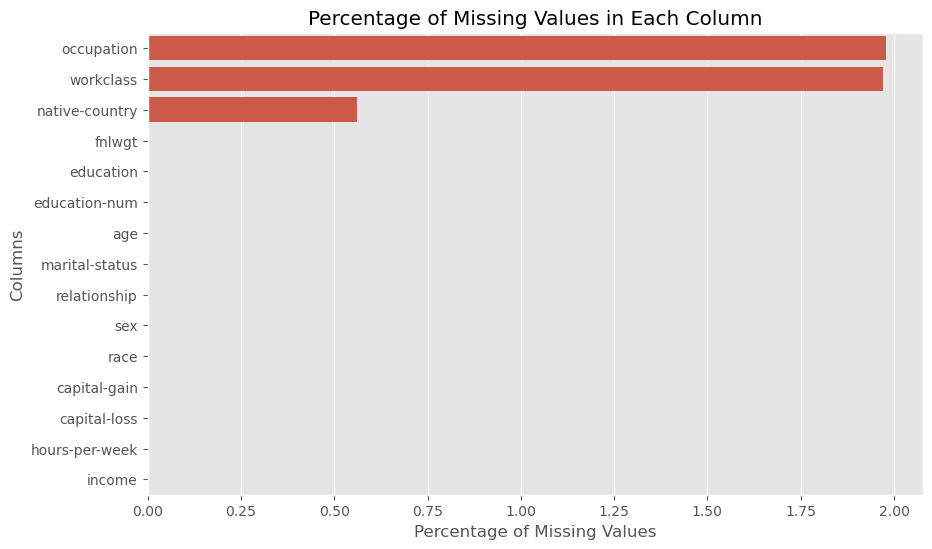

In [54]:
missing_values_percentage = data.isnull().mean() * 100

missing_values_percentage_sorted = missing_values_percentage.sort_values(ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_percentage_sorted, y=missing_values_percentage_sorted.index)
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.show()

**Comments:** Based on the summary table of missing values and their percentages in each column, we can discuss about
* The percentage of missing data in these three columns that we have mentioned above (`occupation`, `workclass`, and `native-country`) is relatively low, almost below $2\%$.
* These missing values can be handled without significantly affecting the dataset, either by filling in replacement values or by dropping rows with missing data in these columns.

All right !!! This dataset has missing data. Unfortunately, this dataset also has some unknown data that represent by `?`. Why do we know that? 

Now, let's do some tasks to recognize it.

As we discussed in part [3.3 Data Exploration](#c333), this dataset consists of two types of data. We will analyze the statistics for each column in each type.

* **Categorical Features (object) Statistics**

In [59]:
# taking all categorical columns (object) in dataset.
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [60]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [61]:
def categorical_stats(data, categorical_columns):
    for col in categorical_columns:
        print(f"\nStatistics for '{col}':")
        
        value_counts = data[col].value_counts()
        percentage = data[col].value_counts(normalize=True)*100
        
        stats_df = pd.DataFrame({'Count': value_counts, 'Percentage': percentage})
        print(stats_df)
        print("\n")

In [62]:
categorical_stats(data, categorical_columns)


Statistics for 'workclass':
                  Count  Percentage
workclass                          
Private           33906   70.816015
Self-emp-not-inc   3862    8.066167
Local-gov          3136    6.549844
State-gov          1981    4.137513
?                  1836    3.834667
Self-emp-inc       1695    3.540174
Federal-gov        1432    2.990873
Without-pay          21    0.043861
Never-worked         10    0.020886



Statistics for 'education':
              Count  Percentage
education                      
HS-grad       15784   32.316449
Some-college  10878   22.271815
Bachelors      8025   16.430531
Masters        2657    5.439990
Assoc-voc      2061    4.219729
11th           1812    3.709922
Assoc-acdm     1601    3.277917
10th           1389    2.843864
7th-8th         955    1.955284
Prof-school     834    1.707547
9th             756    1.547848
12th            657    1.345154
Doctorate       594    1.216166
5th-6th         509    1.042136
1st-4th         247    0.505712


**Comments:** Based on the categorical stastistical tables for each column, we can see that the value `?` appears in `workclass`, `occupation`, and `native-country` columns.
* This value is not a valid entry in these columns because it does not represent a specific job type, occupation or country. So, it indicates missing data.
* The percentage of this value is relatively low, with `workclass` at approximately $3.83\%$, `occupation` at $3.85\%$, and `native-country` at $1.2\%$. This low percentage suggests that addressing these missing values will not significantly affect the overall dataset.

**Solutions:** We will convert this unknown value `?` into the `NaN` value of categorical columns in the dataset.

In [64]:
def replace_unknown_value(data, categorical_columns):
    for col in categorical_columns:
        count_replacements = (data[col] == '?').sum()
        data.loc[data[col] == '?', col] = np.nan
        print(f"Replaced {count_replacements} '?' values with NaN in column '{col}'.")

In [65]:
replace_unknown_value(data, categorical_columns)

Replaced 1836 '?' values with NaN in column 'workclass'.
Replaced 0 '?' values with NaN in column 'education'.
Replaced 0 '?' values with NaN in column 'marital-status'.
Replaced 1843 '?' values with NaN in column 'occupation'.
Replaced 0 '?' values with NaN in column 'relationship'.
Replaced 0 '?' values with NaN in column 'race'.
Replaced 0 '?' values with NaN in column 'sex'.
Replaced 583 '?' values with NaN in column 'native-country'.
Replaced 0 '?' values with NaN in column 'income'.


In [66]:
def check_question_marks(data,categorical_columns):
    question_mark_counts = (data[categorical_columns] == '?').sum()
    return question_mark_counts

In [67]:
print("Checking again the remaining number '?' in each column:")
question_mark_counts = check_question_marks(data, categorical_columns)
question_mark_counts

Checking again the remaining number '?' in each column:


workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
income            0
dtype: int64

Horray !!! We have done to replace all unknown data in each categorical columns in the whole dataset. 

* **Numerical Data (int64) Statistics**

In [70]:
# Taking all the columns that have the type of numeric data
numerical_columns = data.select_dtypes(include=['int64']).columns

In [71]:
numerical_columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [72]:
data[numerical_columns].describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

After we had converted the value `?` into `NaN` value, we will calculate the percentage and the number of missing values in whole dataset to decide what the next actions are taken.

In [74]:
processed_missing_summary = summarize_missing_data(data)

In [75]:
processed_missing_summary

Missing values  Percentage
occupation                2809    5.751198
workclass                 2799    5.730724
native-country             857    1.754637
fnlwgt                       0    0.000000
education                    0    0.000000
education-num                0    0.000000
age                          0    0.000000
marital-status               0    0.000000
relationship                 0    0.000000
sex                          0    0.000000
race                         0    0.000000
capital-gain                 0    0.000000
capital-loss                 0    0.000000
hours-per-week               0    0.000000
income                       0    0.000000

**Comments:** 
* Columns with Missing Values: These columns represent a relatively small portion of the dataset but are significant enough to require careful consideration in handling missing values.
    * The `occupation` and `workclass` columns have similar percentages of missing data, around $5.7\%$. These two columns are closely related, as they both pertain to employment details. For example:
        * `workclass` may contain categories such as "Private," "Self-employed," "Government," and "Without-pay."
        * `occupation` may contain specific job titles like "Manager," "Clerk," "Sales," and "Technician."
 
        Typically, an individual's workclass is associated with specific types of occupations. For example:
        * People in the "Private" workclass might have occupations like "Clerk" or "Sales."
        * Those in the "Government" workclass might hold occupations like "Manager" or "Technician."
    * The `native-country` has a smaller percentage of missing values ($1.75\%$). 
            
* Columns without Missing Values:
    * The remaining columns contain no missing values, with $100\%$ data completeness.
    * This allows these columns to be directly used in analysis and modeling without requiring any imputation.

<span style = "background-color: yellow">**The dataset has missing data, so what actions should be taken and why?**</span>

* <ins>**Should the affected records be excluded from the dataset?**</ins>

Excluding records with missing values is an option, but it may not be ideal because:
* `occupation` and `workclass`: If we remove all rows with missing data in `occupation` and `workclass`, this would reduce the dataset size by approximately $5.7\%$. This approach is generally not ideal because:
    * Removing over $5\%$ of the data can lead to substantial information loss, particularly if the dataset is not very large to begin with or if the dropped rows contain valuable information in other columns.
    * The dropped rows might contain data that represents important patterns within the population. Removing them could make the dataset less representative of the overall data distribution.
    * Since `occupation` and `workclass` are naturally correlated (both providing employment-related information), deleting rows could weaken the relationship between these columns, potentially affecting analysis and modelling results.
* `native-country`:
    * With only $1.75\%$ of entries missing in `native-country`, dropping these rows would only reduce the dataset size by a small amount. While it would not be as drastic as dropping rows with missing values in `occupation` or `workclass`, there would still be some loss of data.
    * Although the percentage of missing data is small, native-country provides potentially valuable information about an individual’s background. This data might be relevant to analyses on demographic patterns, regional income trends, or employment tendencies related to country of origin.
    * Retaining these rows by filling in missing values allows us to keep other information in those rows (such as age, occupation, and income), which could be crucial for specific analyses. Dropping rows would mean losing all the information they contain, even though the missing values are limited to just one column.
    * By keeping as many rows as possible, we help maintain the diversity and representativeness of the dataset. Removing rows could unintentionally skew the dataset if those entries are disproportionately associated with specific groups or regions.


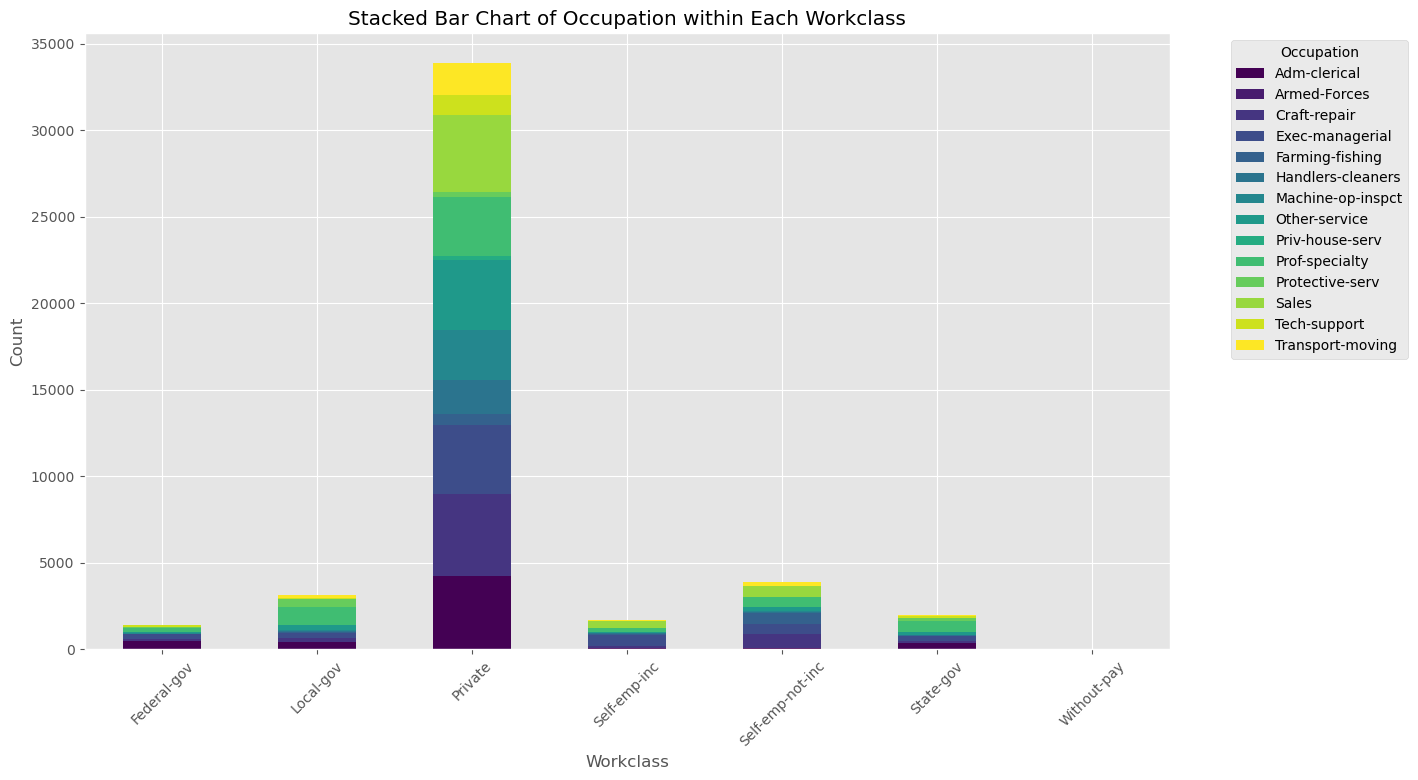

In [80]:
occupation_workclass_counts = data.groupby(['workclass', 'occupation']).size().unstack()

# Vẽ biểu đồ stacked bar
occupation_workclass_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="viridis")
plt.title("Stacked Bar Chart of Occupation within Each Workclass")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Occupation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* <ins>**Should the missing values be imputed? If so, which imputation methods will be applied (e.g., global constant, mean, etc.)?**</ins>

Imputing values is generally preferable in this case because it allows us to retain the full dataset, which is especially useful when the missing data percentage is relatively low (under $6\%$).

We have many ways to fill in replacement for missing data. 
* **Mean Imputation**: fills missing values with this mean(average) of the column. Because it is so simple and effective for numeric data that does not have many outliers, and it can be heavily affected by outliers, which may distort the distribution of the data, we need to use it for numeric data with a normal distribution and few or no outliers.
* **Median Imputation**: fills missing values with the median of the column. It is not affected by outliers, suitable for skewed data. However, it does not represent the "average" value in the data and may not always be appropriate if the distribution is normal. So, it is suitable for numeric data with outliers or skewed distributions.
* **Mode Imputation**: fills  missing values with the mode (most frequent value) of the column. This method works well for categorical data, such as job titles, categories, or countries, as it preserves the most common category. But, if a large portion of the data is missing, filling it with the mode can create an imbalance in the data, making one category overly represented.
* **PCA Imputation:** is useful for numerical data with complex interrelationships across multiple variables.
* **Global constant:** fills missing values with a constant value (e.g., "Unknown" for categorical data or 0 for numerical data). It is good for both categorical and numerical data when missing data represents a specific, meaningful case.

In this case, we have:
* `occupation`, `workclass`, and `native-country`: Since these columns are categorical and are given the relatively low percentage of missing values in each of these columns, using the mode (most frequent value) would be appropriate. Mode imputation is simple and does not introduce new categories, helping maintain data consistency. Imputing with the most common category within each column maintains the dataset's consistency and avoids bias introduced by randomly chosen values.

To generalize all cases, i will use `mode` imputation for categorical data and `mean` imputation for numeric data.

**1. Categorical Data (object)**

In [84]:
def mode_imputation_for_categorical_data(data, categorical_columns):
    for col in categorical_columns:
        if not data[col].empty:
            mode_value = data[col].mode().iloc[0] if not data[col].mode().empty else None
            if mode_value is not None:
                data[col] = data[col].fillna(mode_value)
                print(f"Filled missing values in column '{col}' with mode: {mode_value}")
            else:
                print(f"Not found mode value for categorical columns '{col}'.")

In [85]:
mode_imputation_for_categorical_data(data, categorical_columns)

Filled missing values in column 'workclass' with mode: Private
Filled missing values in column 'education' with mode: HS-grad
Filled missing values in column 'marital-status' with mode: Married-civ-spouse
Filled missing values in column 'occupation' with mode: Prof-specialty
Filled missing values in column 'relationship' with mode: Husband
Filled missing values in column 'race' with mode: White
Filled missing values in column 'sex' with mode: Male
Filled missing values in column 'native-country' with mode: United-States
Filled missing values in column 'income' with mode: <=50K


**2. Numeric Data (int64)**

In [87]:
def mean_imputation_for_numeric_columns(data, numeric_columns):
    for col in numeric_columns:
        if not data[col].empty:
            mean_value = data[col].mean()
            data[col] = data[col].fillna(mean_value)
            print(f"Filled missing values in column '{col}' with mean: {mean_value}")

In [88]:
mean_imputation_for_numeric_columns(data, numerical_columns)

Filled missing values in column 'age' with mean: 38.64358543876172
Filled missing values in column 'fnlwgt' with mean: 189664.13459727284
Filled missing values in column 'education-num' with mean: 10.078088530363212
Filled missing values in column 'capital-gain' with mean: 1079.0676262233324
Filled missing values in column 'capital-loss' with mean: 87.50231358257237
Filled missing values in column 'hours-per-week' with mean: 40.422382375824085


* **Summary**

In [90]:
processed_mode_missing_summary = summarize_missing_data(data)

In [91]:
processed_mode_missing_summary

Missing values  Percentage
age                          0         0.0
workclass                    0         0.0
fnlwgt                       0         0.0
education                    0         0.0
education-num                0         0.0
marital-status               0         0.0
occupation                   0         0.0
relationship                 0         0.0
race                         0         0.0
sex                          0         0.0
capital-gain                 0         0.0
capital-loss                 0         0.0
hours-per-week               0         0.0
native-country               0         0.0
income                       0         0.0

All right !!! We have done to process the missing data in this dataset. Now, we will move to process the duplicated data in dataset.

### **4.2. Identification of Duplicated Records**<a class = "anchor" id = "c342"></a>

**<font color = red>Question:</font> <font color = blue>Are there any duplicate records present in dataset? If duplicates exit, keep only one of them.</font>**

**<font color = green><ins>Answer</ins></font>**

In [96]:
def get_unique_values(data):
    output_data = {
        'Column Name': [],
        'Number of Unique Values': [],
        'Unique Values': [],
        'Data Types': []
    }
    for col in data.columns:
        unique_values = data[col].unique()
        num_unique = len(unique_values)

        output_data['Column Name'].append(col)
        output_data['Number of Unique Values'].append(num_unique)
        output_data['Unique Values'].append(unique_values if num_unique <= 10 else "-")
        output_data['Data Types'].append(data[col].dtype)
    output_dataframe = pd.DataFrame(output_data)
    return output_dataframe

In [97]:
data_unique = get_unique_values(data)
data_unique

Column Name  Number of Unique Values  \
0              age                       74   
1        workclass                        8   
2           fnlwgt                    28523   
3        education                       16   
4    education-num                       16   
5   marital-status                        7   
6       occupation                       14   
7     relationship                        6   
8             race                        5   
9              sex                        2   
10    capital-gain                      123   
11    capital-loss                       99   
12  hours-per-week                       96   
13  native-country                       41   
14          income                        2   

                                        Unique Values Data Types  
0                                                   -      int64  
1   [State-gov, Self-emp-not-inc, Private, Federal...     object  
2                                                   -      int64  
3                                                   -     object  
4                                                   -      int64  
5   [Never-married, Married-civ-spouse, Divorced, ...     object  
6                                                   -     object  
7   [Not-in-family, Husband, Wife, Own-child, Unma...     object  
8   [White, Black, Asian-Pac-Islander, Amer-Indian...     object  
9                                      [Male, Female]     object  
10                                                  -      int64  
11                                                  -      int64  
12                                                  -      int64  
13                                                  -     object  
14                                      [<=50K, >50K]     object

In [98]:
def plot_unique_values(df):
    """
    Vẽ biểu đồ cột thể hiện số lượng giá trị duy nhất của các cột categorical và numerical.

    Parameters:
    df (pd.DataFrame): DataFrame chứa dữ liệu cần phân tích.
    """
    # Phân loại các cột thành categorical và numerical
    categorical_cols = df.select_dtypes(exclude="number").nunique().sort_values()
    numerical_cols = df.select_dtypes(include="number").nunique().sort_values()

    # Tạo biểu đồ với 2 subplot cho categorical và numerical
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle("Unique values per Categorical and Numerical feature", fontsize=16, fontweight='bold')

    # Biểu đồ cột cho các cột categorical
    ax1.barh(categorical_cols.index, categorical_cols.values, color='#016CC9')
    ax1.set_title("Unique values per Categorical feature", fontsize=14)
    ax1.set_xlabel("Number of Unique Values")
    ax1.set_ylabel("Categorical Features")

    # Biểu đồ cột cho các cột numerical
    ax2.barh(numerical_cols.index, numerical_cols.values, color='#DEB078')
    ax2.set_title("Unique values per Numerical feature", fontsize=14)
    ax2.set_xlabel("Number of Unique Values")
    ax2.set_ylabel("Numerical Features")

    # Hiển thị biểu đồ
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Đặt layout để tiêu đề không bị chồng lên các subplots
    plt.show()

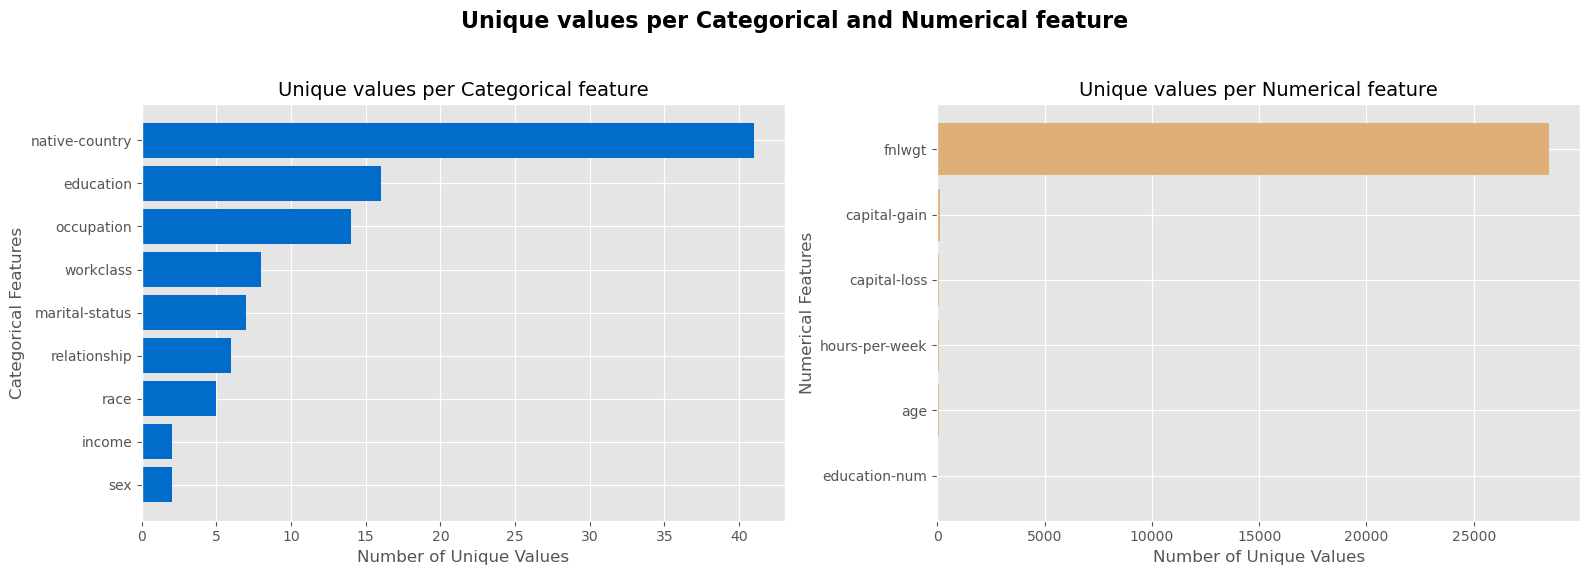

In [99]:
plot_unique_values(data)

In [100]:
# Checking for duplicate records
num_duplicates = data.duplicated().sum()

In [101]:
print(f"Number of duplicate records: {num_duplicates}")

Number of duplicate records: 53


As you can see, there are $53$ duplicate records present in dataset. So, we need to remove the duplicated records but keep only one of them.

In [103]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [104]:
duplicate_values(data)

Duplicate check...
There are 53 duplicated observations in the dataset.
53 duplicates were dropped!
No more duplicate rows!


In [105]:
last_duplicates = data.duplicated().sum()

In [106]:
print(f"Number of duplicated records: {last_duplicates}")

Number of duplicated records: 0


---

### **4.3. Data Visualization** <a class = "anchor" id = "c343"></a>

<span style = "background-color: yellow"><b>Purpose:</b></span> The purpose of data visualization is to transform complex data into visual formats, making patterns, trends, and insights easier to understand and interpret. It aids in decision-making, highlights key information, and enables quicker, more intuitive understanding of data.

#### **4.3.1. Target Features Visualization** <a class = "anchor" id = "c3431"></a>

**<font color = blue>Data distribution of `income`</font>**

In [112]:
def plot_income_distribution(data):
    income_counts = data['income'].value_counts()
    plt.figure(figsize=(14, 8))
    plt.bar(income_counts.index, income_counts.values, color=['skyblue', 'salmon'])

    plt.title("Income Distribution", fontsize = 18, fontweight = 'bold', color = 'darkgreen')
    plt.xlabel("Income", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})

    for i, value in enumerate(income_counts.values):
        plt.text(i, value + 100, str(value), ha='center', va = 'bottom', fontsize = 12)

    plt.tight_layout()
    plt.show()

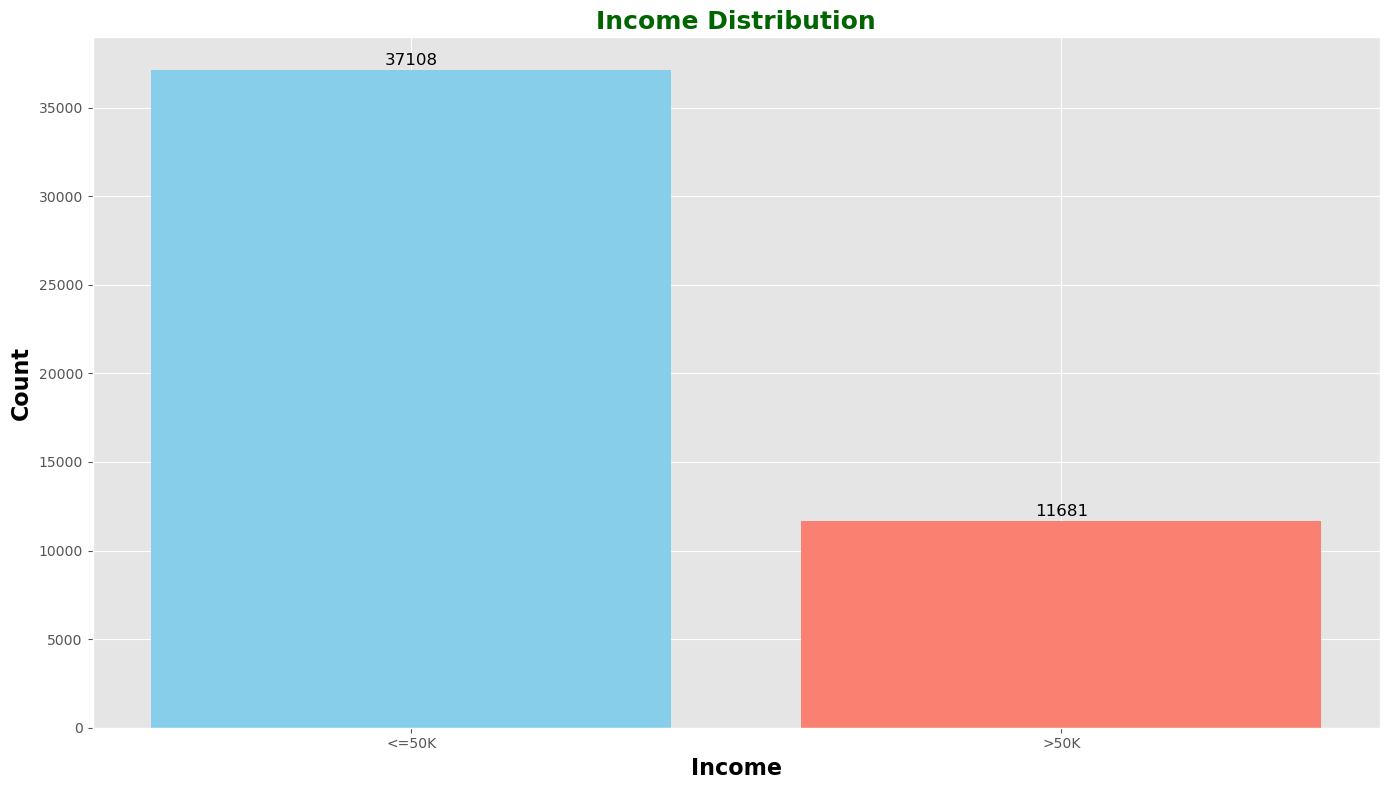

In [113]:
plot_income_distribution(data)

#### **4.3.2. Numeric Features Visualization** <a class = "anchor" id = "c3432"></a>

In [115]:
numerical_columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [116]:
data[numerical_columns].describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48789.000000  4.878900e+04   48789.000000  48789.000000  48789.000000   
mean      38.653139  1.896697e+05      10.078809   1080.239829     87.597368   
std       13.708426  1.056182e+05       2.570072   7455.980728    403.213066   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175550e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781400e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376080e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48789.000000  
mean        40.425895  
std         12.392856  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

**<font color = blue>1. Data distribution of `age`</font>**

In [118]:
def plot_age_distribution(data):
    plt.figure(figsize=(14, 8))

    # Define bins and histogram counts for each income group
    bins = np.linspace(data['age'].min(), data['age'].max(), 40)
    counts_50k_or_less, _ = np.histogram(data[data['income'] == '<=50K']['age'], bins=bins)
    counts_above_50k, _ = np.histogram(data[data['income'] == '>50K']['age'], bins=bins)
    
    # Define the width of the bars and the bin centers for grouping
    bar_width = 0.6  # Widening the bars
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    
    # Adjust bin positions for side-by-side bars
    positions_50k_or_less = bin_centers - bar_width / 2
    positions_above_50k = bin_centers + bar_width / 2

    # Plot bars for each income group
    plt.bar(positions_50k_or_less, counts_50k_or_less, width=bar_width, color='deepskyblue', edgecolor='black', label='<=50K')
    plt.bar(positions_above_50k, counts_above_50k, width=bar_width, color='coral', edgecolor='black', label='>50K')

    # Plot trend lines
    plt.plot(bin_centers, counts_50k_or_less, color='blue', marker='o', linestyle='-', label='<=50K Trend')
    plt.plot(bin_centers, counts_above_50k, color='red', marker='o', linestyle='-', label='>50K Trend')

    # Add text labels above each bar to show the count
    for pos, count in zip(positions_50k_or_less, counts_50k_or_less):
        plt.text(pos, count + 30, str(count), ha='center', va='bottom', fontsize=8, color='blue')
    for pos, count in zip(positions_above_50k, counts_above_50k):
        plt.text(pos, count + 30, str(count), ha='center', va='bottom', fontsize=8, color='red')

    # Titles and labels
    plt.title("Data Distribution of Age by Income", fontsize=16, color='darkgreen', weight='bold')
    plt.xlabel("Age", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.legend(title="Income")
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()

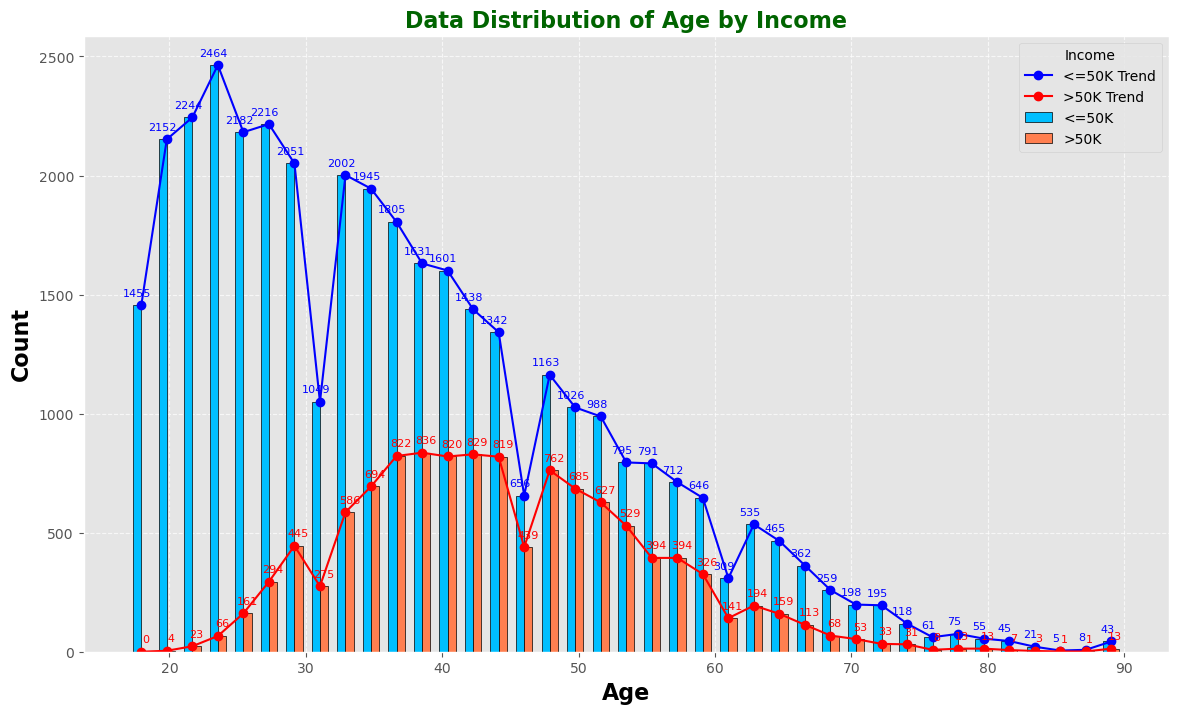

In [119]:
plot_age_distribution(data)

**<font color = blue>2. Data distribution of `fnlwgt`</font>**

In [121]:
def plot_fnlwgt_distribution(data):
    plt.figure(figsize=(14, 8))

    # Định nghĩa các bins cho 'fnlwgt'
    bins = np.linspace(data['fnlwgt'].min(), data['fnlwgt'].max(), 30)  # Điều chỉnh số lượng bins nếu cần

    # Dữ liệu cho từng nhóm thu nhập
    fnlwgt_50k_or_less = data[data['income'] == '<=50K']['fnlwgt']
    fnlwgt_above_50k = data[data['income'] == '>50K']['fnlwgt']

    # Vẽ biểu đồ histogram dạng xếp chồng (stacked)
    plt.hist([fnlwgt_50k_or_less, fnlwgt_above_50k], bins=bins, stacked=True,
             color=['deepskyblue', 'coral'], edgecolor='black', label=['<=50K', '>50K'], density=True)

    # Thêm tiêu đề và nhãn trục
    plt.title("Distribution of fnlwgt by Income", fontsize=18, color='darkgreen', weight='bold')
    plt.xlabel("fnlwgt", fontdict={'fontsize': 15, 'fontweight': 'bold'})
    plt.ylabel("Density", fontdict={'fontsize': 15, 'fontweight': 'bold'})

    # Thêm chú thích
    plt.legend(title="Income Group", fontsize=12, title_fontsize='13')

    # Hiển thị lưới trên trục y để dễ so sánh
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Hiển thị biểu đồ
    plt.show()

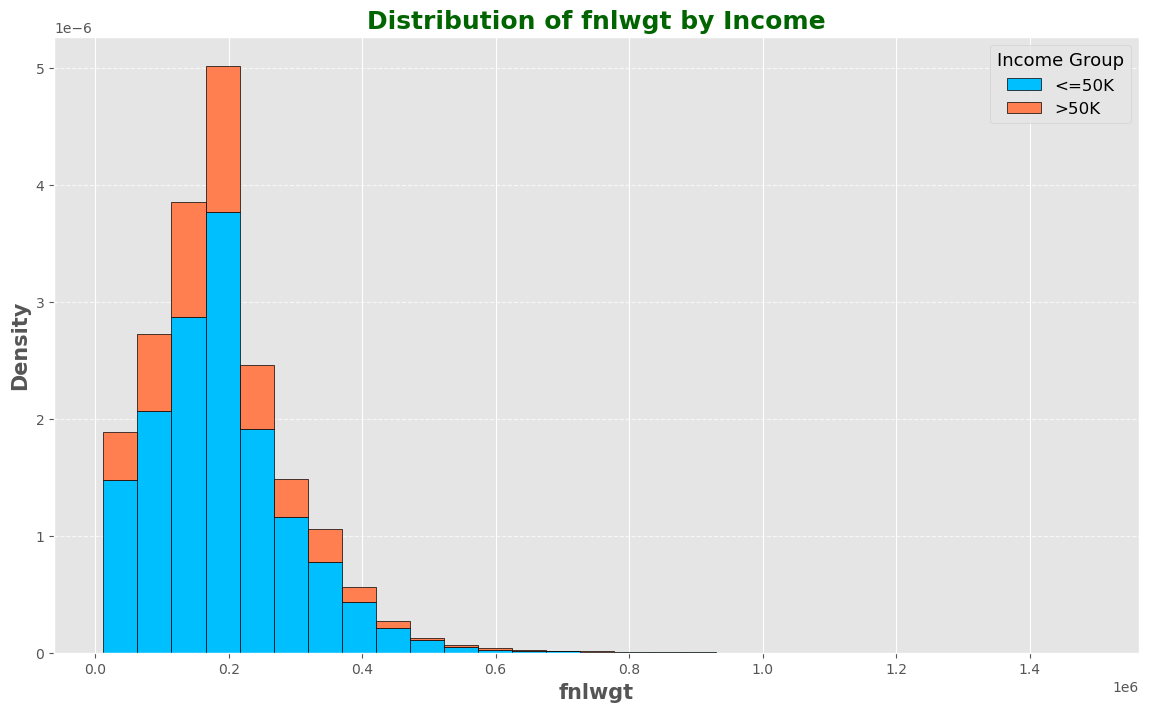

In [122]:
plot_fnlwgt_distribution(data)

**<font color = blue>3. Data distribution of `education-num`</font>**

In [124]:
def plot_education_num_distribution(data):
    plt.figure(figsize=(14, 8))

    # Định nghĩa các bins cho 'education-num' dựa trên các giá trị rời rạc
    bins = np.arange(data['education-num'].min(), data['education-num'].max() + 2)  # Tạo bins với các giá trị nguyên

    # Dữ liệu cho từng nhóm thu nhập
    edu_num_50k_or_less = data[data['income'] == '<=50K']['education-num']
    edu_num_above_50k = data[data['income'] == '>50K']['education-num']

    # Vẽ biểu đồ histogram dạng xếp chồng (stacked)
    plt.hist([edu_num_50k_or_less, edu_num_above_50k], bins=bins, stacked=True,
             color=['deepskyblue', 'coral'], edgecolor='black', label=['<=50K', '>50K'], density=True)

    # Thêm tiêu đề và nhãn trục
    plt.title("Distribution of Education Years by Income", fontsize=18, color='darkgreen', weight='bold')
    plt.xlabel("Years of Education", fontdict={'fontsize': 15, 'fontweight': 'bold'})
    plt.ylabel("Density", fontdict={'fontsize': 15, 'fontweight': 'bold'})

    # Thêm chú thích
    plt.legend(title="Income Group", fontsize=12, title_fontsize='13')

    # Hiển thị lưới trên trục y để dễ so sánh
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Hiển thị biểu đồ
    plt.show()

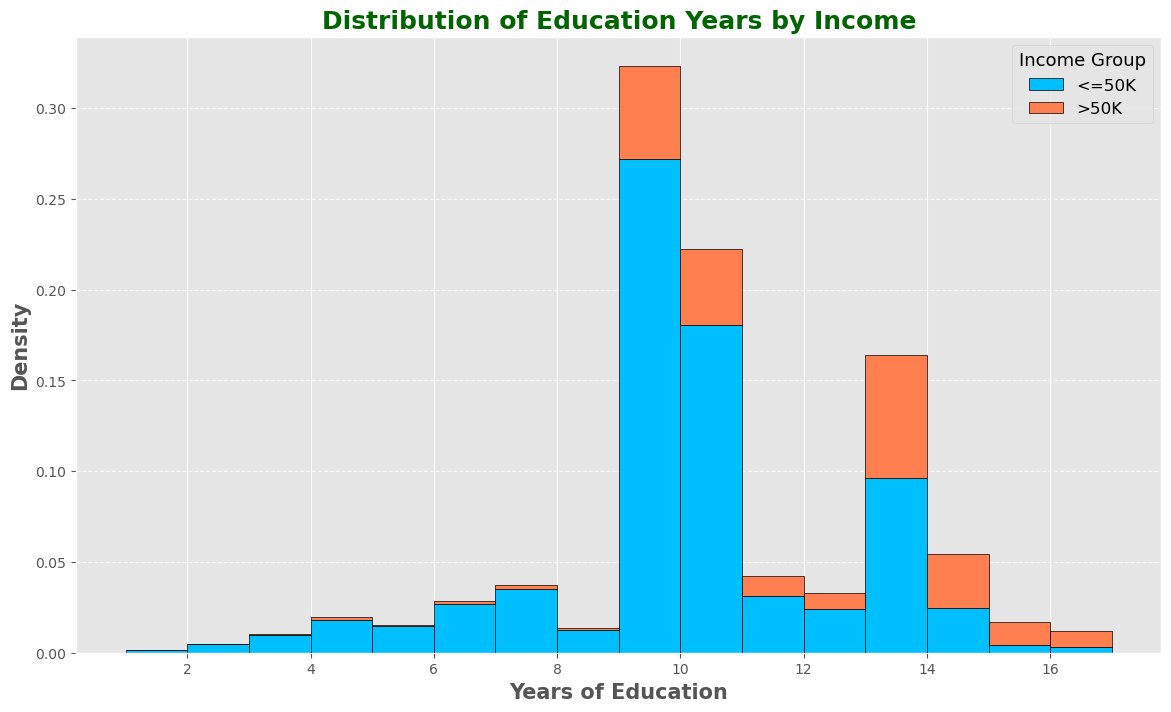

In [125]:
plot_education_num_distribution(data)

**<font color = blue>4. Data distribution of `capital-gain`</font>**

In [127]:
def plot_capital_gain_distribution(data):
    plt.figure(figsize=(14, 8))

    # Định nghĩa các bins cho `capital-gain`
    bins = np.linspace(data['capital-gain'].min(), data['capital-gain'].max(), 30)  # Điều chỉnh số lượng bins nếu cần

    # Dữ liệu cho từng nhóm thu nhập
    capital_gain_50k_or_less = data[data['income'] == '<=50K']['capital-gain']
    capital_gain_above_50k = data[data['income'] == '>50K']['capital-gain']

    # Vẽ biểu đồ histogram dạng xếp chồng (stacked)
    plt.hist([capital_gain_50k_or_less, capital_gain_above_50k], bins=bins, stacked=True,
             color=['deepskyblue', 'coral'], edgecolor='black', label=['<=50K', '>50K'], density=True)

    # Thêm tiêu đề và nhãn trục
    plt.title("Data Distribution of Capital Gain by Income", fontsize=18, color='darkgreen', weight='bold')
    plt.xlabel("Capital Gain", fontdict={'fontsize': 15, 'fontweight': 'bold'})
    plt.ylabel("Density", fontdict={'fontsize': 15, 'fontweight': 'bold'})

    # Thêm chú thích
    plt.legend(title="Income Group", fontsize=12, title_fontsize='13')

    # Hiển thị lưới trên trục y để dễ so sánh
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Hiển thị biểu đồ
    plt.show()

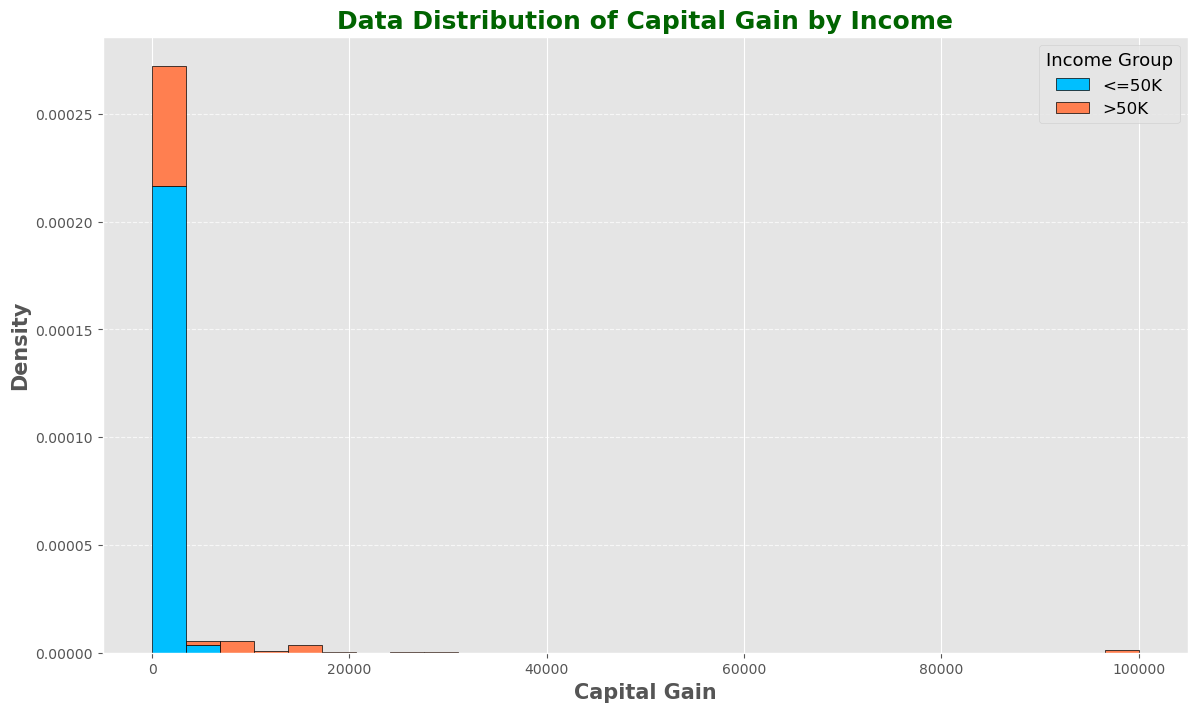

In [128]:
plot_capital_gain_distribution(data)

**<font color = blue>5. Data distribution of `capital-loss`</font>**

In [130]:
def plot_capital_loss_distribution(data):
    plt.figure(figsize=(14, 8))

    # Định nghĩa các bins cho `capital-gain`
    bins = np.linspace(data['capital-loss'].min(), data['capital-loss'].max(), 30)  # Điều chỉnh số lượng bins nếu cần

    # Dữ liệu cho từng nhóm thu nhập
    capital_gain_50k_or_less = data[data['income'] == '<=50K']['capital-loss']
    capital_gain_above_50k = data[data['income'] == '>50K']['capital-loss']

    # Vẽ biểu đồ histogram dạng xếp chồng (stacked)
    plt.hist([capital_gain_50k_or_less, capital_gain_above_50k], bins=bins, stacked=True,
             color=['deepskyblue', 'coral'], edgecolor='black', label=['<=50K', '>50K'], density=True)

    # Thêm tiêu đề và nhãn trục
    plt.title("Data Distribution of Capital Loss by Income", fontsize=18, color='darkgreen', weight='bold')
    plt.xlabel("Capital Loss", fontdict={'fontsize': 15, 'fontweight': 'bold'})
    plt.ylabel("Density", fontdict={'fontsize': 15, 'fontweight': 'bold'})

    # Thêm chú thích
    plt.legend(title="Income Group", fontsize=12, title_fontsize='13')

    # Hiển thị lưới trên trục y để dễ so sánh
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Hiển thị biểu đồ
    plt.show()

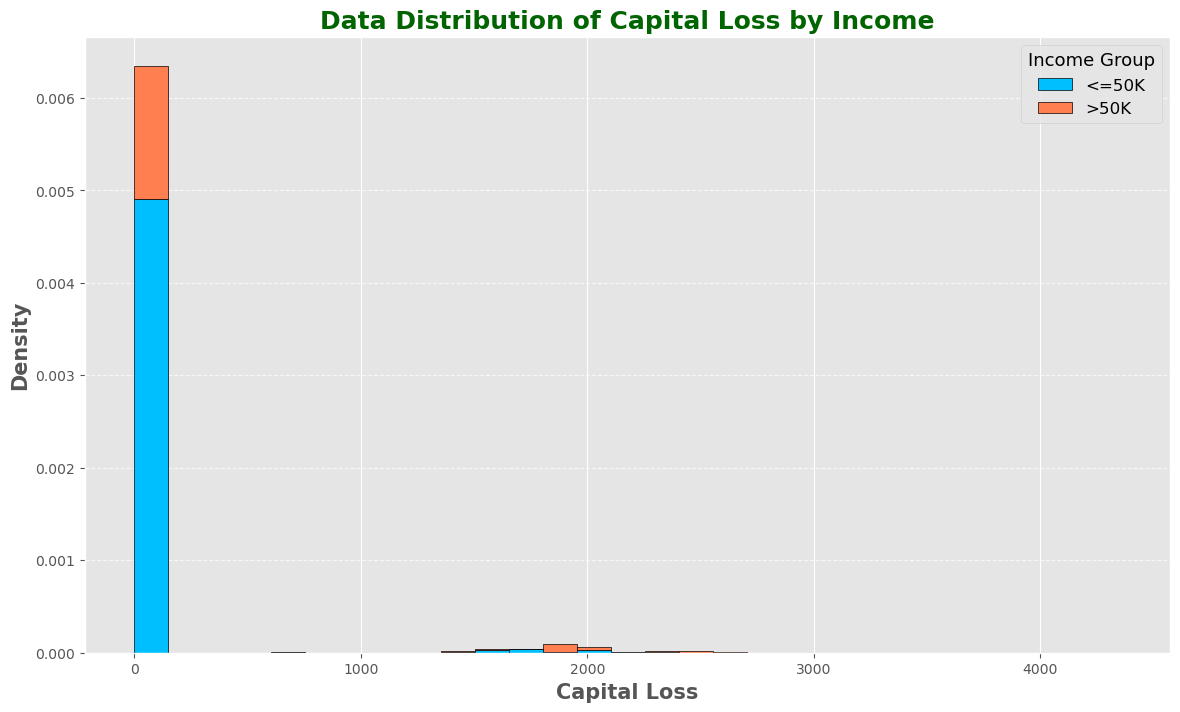

In [131]:
plot_capital_loss_distribution(data)

**<font color = blue>6. Data distribution of `hours-per-week`</font>**

In [133]:
def plot_hours_per_week_distribution(data):
    plt.figure(figsize=(14, 8))

    # Định nghĩa các bins cho `capital-gain`
    bins = np.linspace(data['hours-per-week'].min(), data['hours-per-week'].max(), 30)  # Điều chỉnh số lượng bins nếu cần

    # Dữ liệu cho từng nhóm thu nhập
    hours_per_week_50k_or_less = data[data['income'] == '<=50K']['hours-per-week']
    hours_per_week_above_50k = data[data['income'] == '>50K']['hours-per-week']

    # Vẽ biểu đồ histogram dạng xếp chồng (stacked)
    plt.hist([hours_per_week_50k_or_less, hours_per_week_above_50k], bins=bins, stacked=True,
             color=['deepskyblue', 'coral'], edgecolor='black', label=['<=50K', '>50K'], density=True)

    # Thêm tiêu đề và nhãn trục
    plt.title("Data Distribution of hours per week by Income", fontsize=18, color='darkgreen', weight='bold')
    plt.xlabel("Hours per week", fontdict={'fontsize': 15, 'fontweight': 'bold'})
    plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight': 'bold'})

    # Thêm chú thích
    plt.legend(title="Income Group", fontsize=12, title_fontsize='13')

    # Hiển thị lưới trên trục y để dễ so sánh
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Hiển thị biểu đồ
    plt.show()

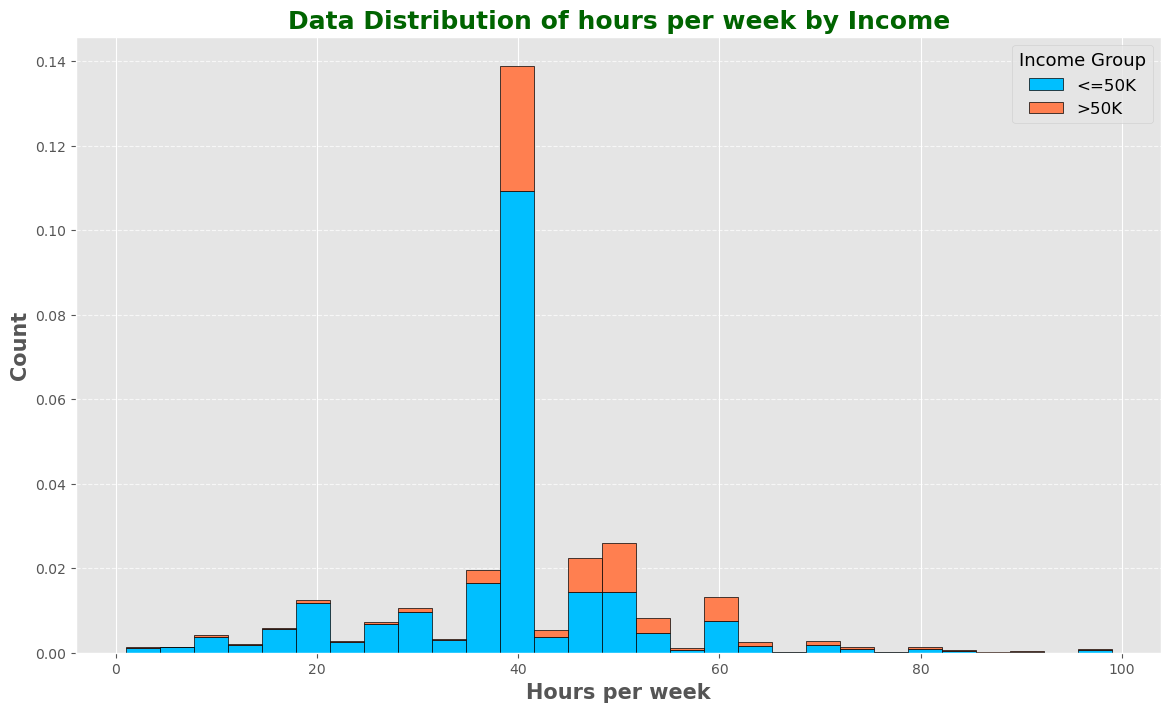

In [134]:
plot_hours_per_week_distribution(data)

#### **4.3.3. Categorical Features Visualization** <a class = "anchor" id = "c3433"></a>

In [136]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [137]:
categorical_stats(data, categorical_columns)


Statistics for 'workclass':
                  Count  Percentage
workclass                          
Private           36654   75.127590
Self-emp-not-inc   3861    7.913669
Local-gov          3136    6.427678
State-gov          1981    4.060341
Self-emp-inc       1694    3.472094
Federal-gov        1432    2.935088
Without-pay          21    0.043042
Never-worked         10    0.020496



Statistics for 'education':
              Count  Percentage
education                      
HS-grad       15770   32.322860
Some-college  10862   22.263215
Bachelors      8013   16.423784
Masters        2656    5.443850
Assoc-voc      2060    4.222263
11th           1812    3.713952
Assoc-acdm     1601    3.281477
10th           1389    2.846953
7th-8th         954    1.955359
Prof-school     834    1.709402
9th             756    1.549530
12th            655    1.342516
Doctorate       594    1.217488
5th-6th         507    1.039169
1st-4th         245    0.502162
Preschool        81    0.166021



S

**<font color = blue>1. Data distribution of `workclass`</font>**

* `workclass`

In [140]:
def plot_workclass_distribution(data):
    plt.figure(figsize=(14, 8))
    
    ax = sns.countplot(data=data, y='workclass', order=data['workclass'].value_counts().index)

    for p in ax.patches:
        count = int(p.get_width())
        if count > 0:
            ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2,  # Vị trí văn bản
                    f'{count}', va='center', fontsize=12, color='black')
    
    plt.title("Workclass Distribution", fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Workclass", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    sns.despine(left=True, bottom=True)
    
    plt.show()

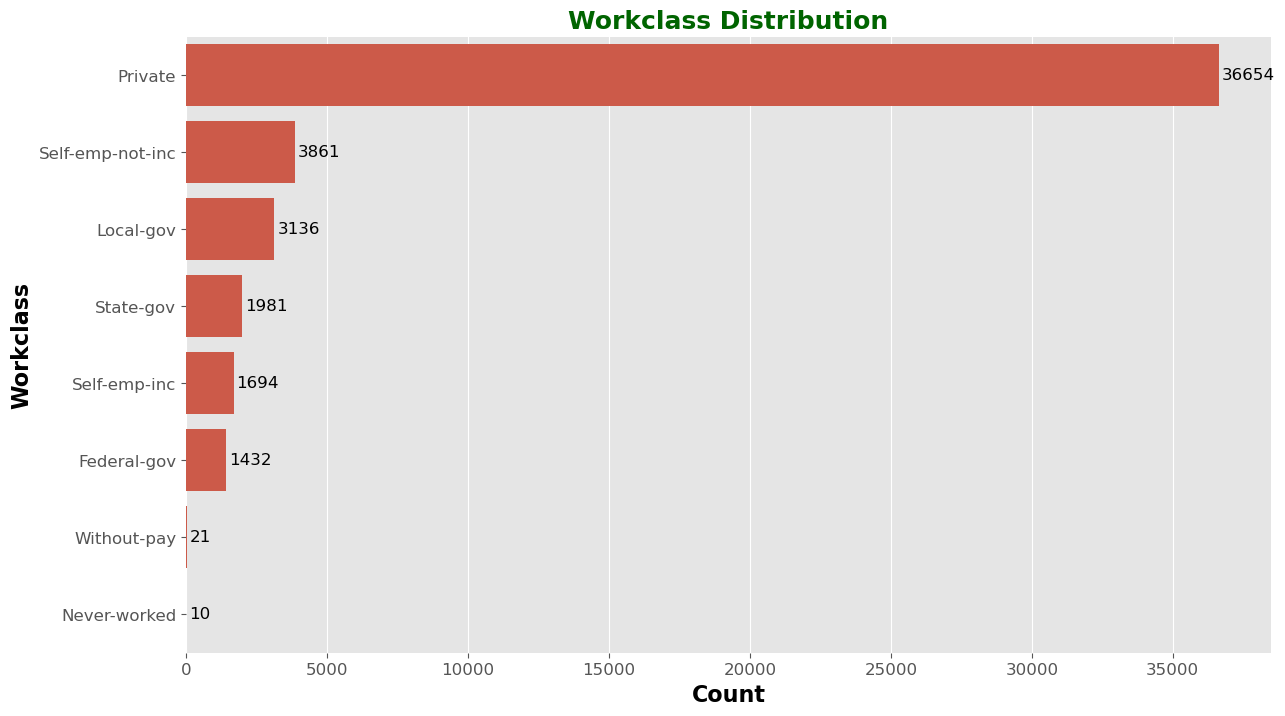

In [141]:
plot_workclass_distribution(data)

* `workclass` vs `income`

In [143]:
def plot_workclass_by_income(data):
    plt.figure(figsize=(14, 8))
    
    ax = sns.countplot(data=data, y='workclass', hue='income', palette='viridis', order=data['workclass'].value_counts().index)

    for p in ax.patches:
        count = int(p.get_width())
        if count > 0:
            ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2,  # Đặt vị trí của văn bản
                    f'{count}', va='center', fontsize=10, color='black')
    
    plt.title("Workclass Distribution by Income", fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Workclass", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.legend(title="Income", labels=['<=50K', '>50K'], fontsize=12, title_fontsize='13', loc='lower right')
    sns.despine(left=True, bottom=True)  
    
    plt.show()

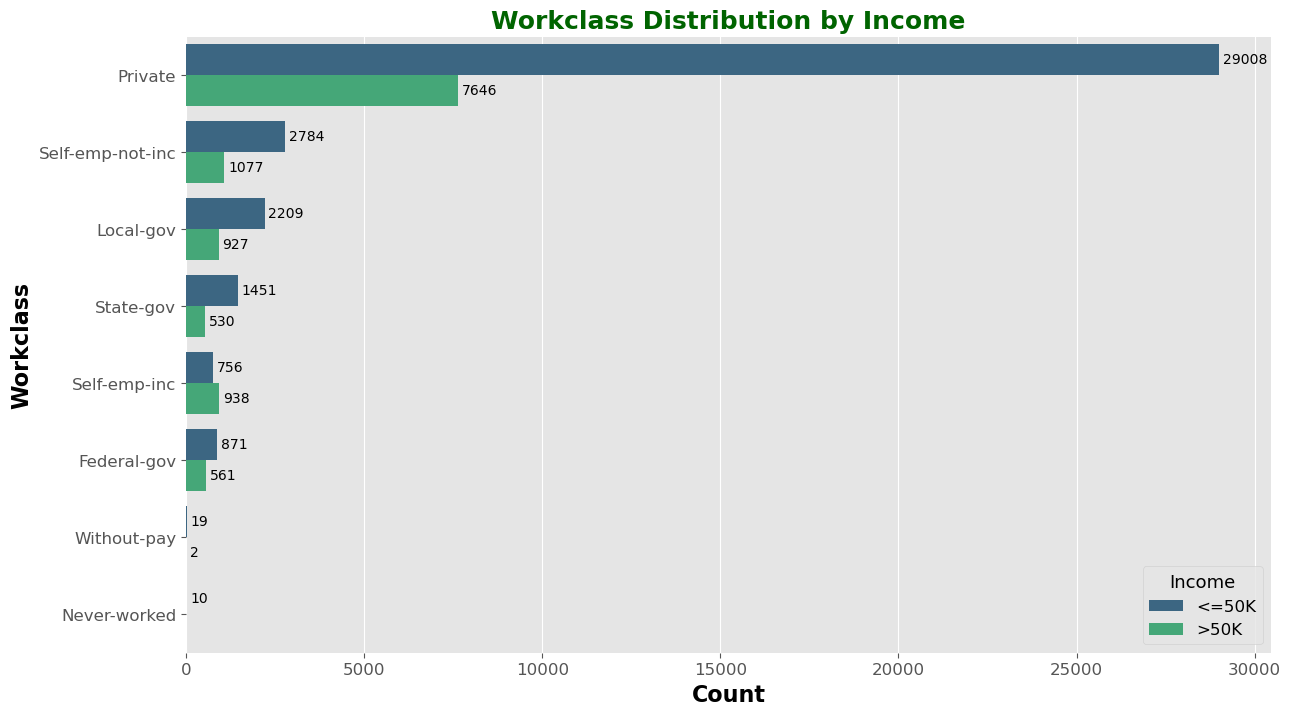

In [144]:
plot_workclass_by_income(data)

**<font color = blue>2. Data distribution of `education`</font>**

* `education`

In [147]:
def plot_education_distribution(data):
    plt.figure(figsize=(14, 8))
    
    ax = sns.countplot(data=data, y='education', order=data['education'].value_counts().index)

    for p in ax.patches:
        count = int(p.get_width())
        ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2,  # Vị trí văn bản
                f'{count}', va='center', fontsize=12, color='black')
    
    plt.title("Education Levels Distribution", fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Education Levels", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    sns.despine(left=True, bottom=True)
    
    plt.show()

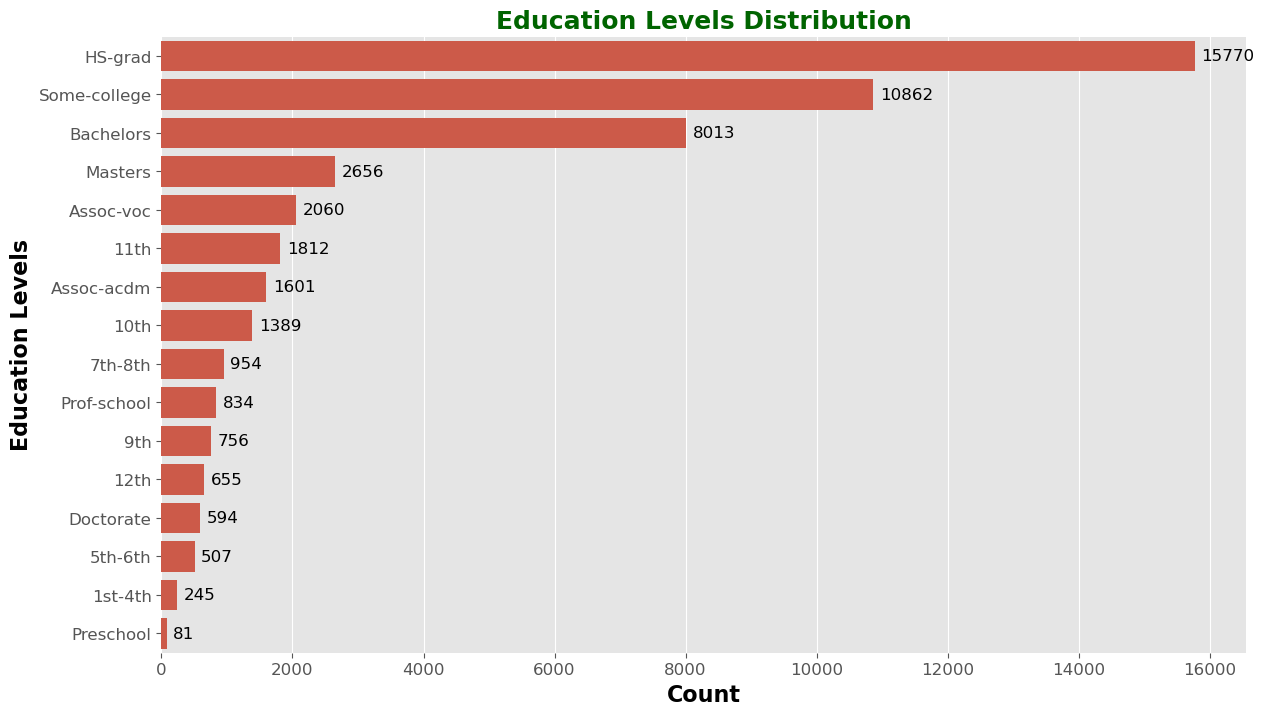

In [148]:
plot_education_distribution(data)

* `education` vs. `income`

In [150]:
def plot_education_levels_by_income(data):
    plt.figure(figsize=(14, 8))
    
    ax = sns.countplot(data=data, y='education', hue='income', palette='viridis', order=data['education'].value_counts().index)

    for p in ax.patches:
        count = int(p.get_width())
        if count > 0:
            ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2,  # Đặt vị trí của văn bản
                f'{count}', va='center', fontsize=10, color='black')
    
    plt.title("Education Levels Distribution by Income", fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Education Levels", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.legend(title="Income", labels=['<=50K', '>50K'], fontsize=12, title_fontsize='13', loc='lower right')
    sns.despine(left=True, bottom=True)  # Remove top and right spines for a cleaner look
    
    plt.show()

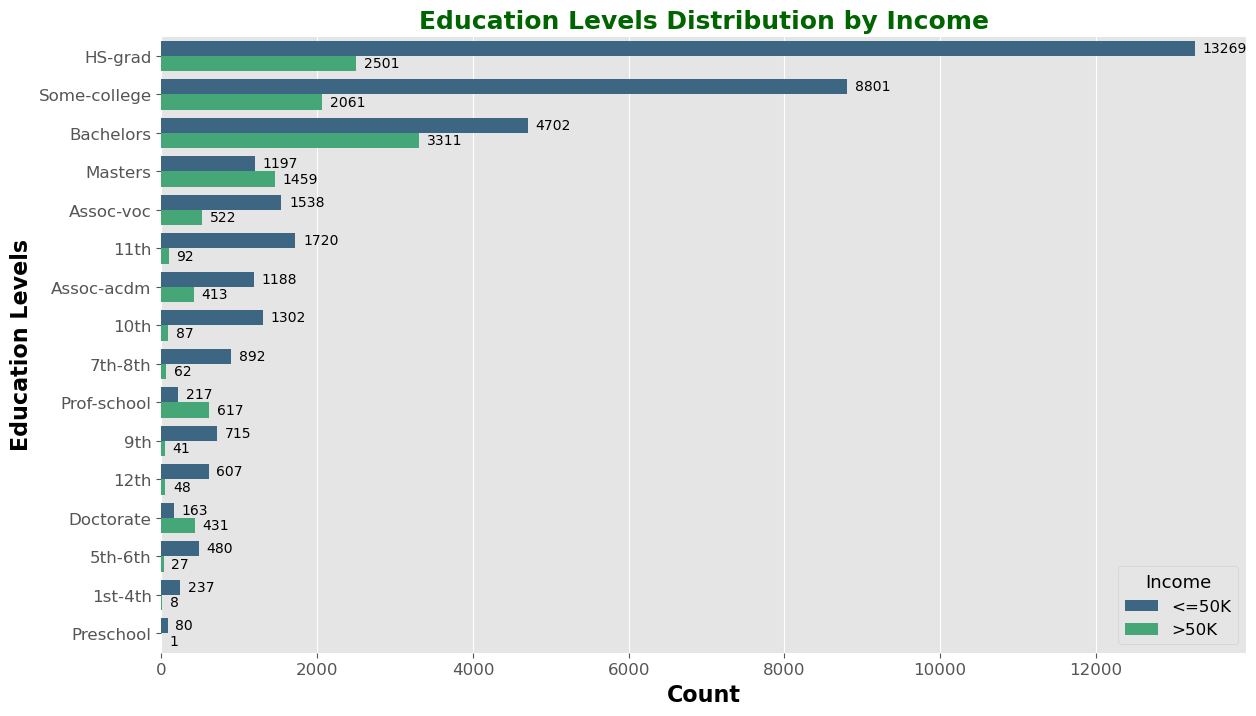

In [151]:
plot_education_levels_by_income(data)

**<font color = blue>3. Data distribution of `marital-status`</font>**

* `marital-status`

In [154]:
def plot_marital_status_distribution(data):
    plt.figure(figsize=(14, 8))
    
    ax = sns.countplot(data=data, y='marital-status', order=data['marital-status'].value_counts().index)

    for p in ax.patches:
        count = int(p.get_width())
        if count > 0:
            ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2, 
                    f'{count}', va='center', fontsize=12, color='black')
    
    plt.title("Marỉal Status Distribution", fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Marital Status", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    sns.despine(left=True, bottom=True)
    
    plt.show()

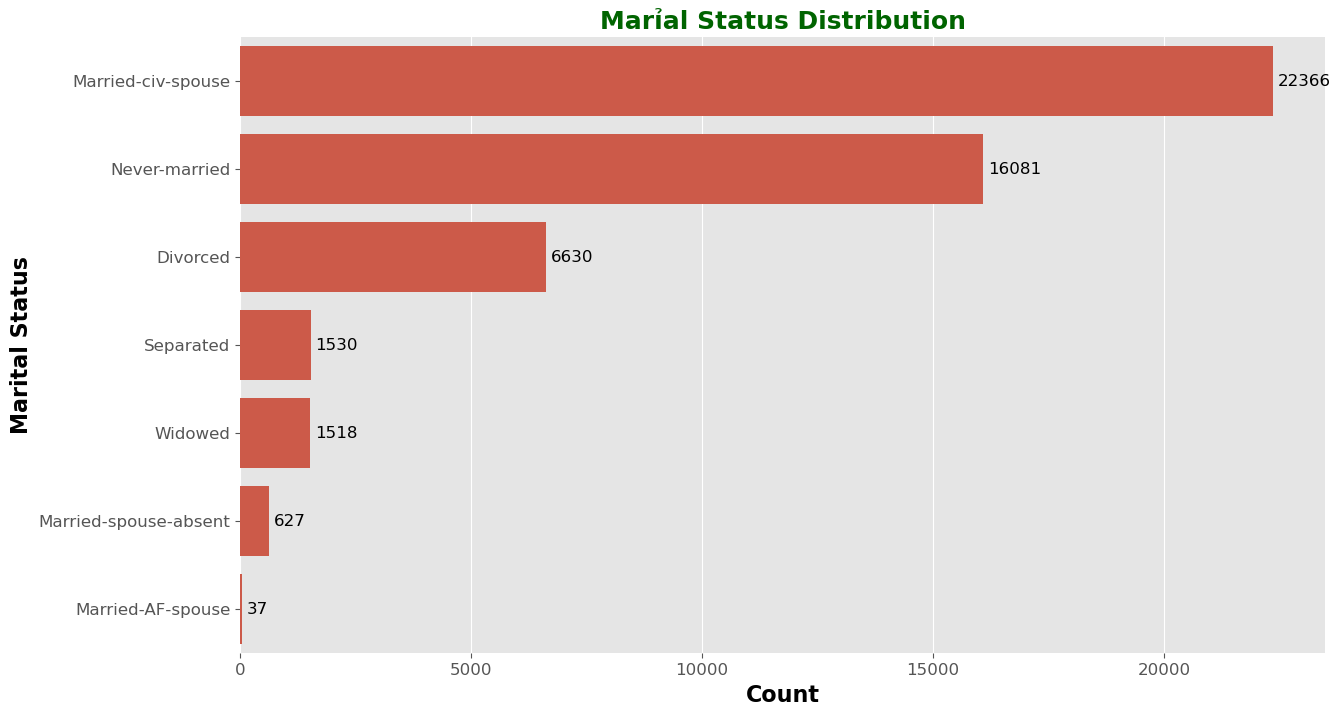

In [155]:
plot_marital_status_distribution(data)

* `marital-status` vs. `income`

In [157]:
def plot_marital_status_by_income(data):
    plt.figure(figsize=(14, 8))
    
    ax = sns.countplot(data=data, y='marital-status', hue='income', palette='viridis', order=data['marital-status'].value_counts().index)

    for p in ax.patches:
        count = int(p.get_width())
        if count > 0:
            ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2,  # Đặt vị trí của văn bản
                f'{count}', va='center', fontsize=10, color='black')
    
    plt.title("Marital Status Distribution by Income", fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Marital Status", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.legend(title="Income", labels=['<=50K', '>50K'], fontsize=12, title_fontsize='13', loc='lower right')
    sns.despine(left=True, bottom=True)  # Remove top and right spines for a cleaner look
    
    plt.show()

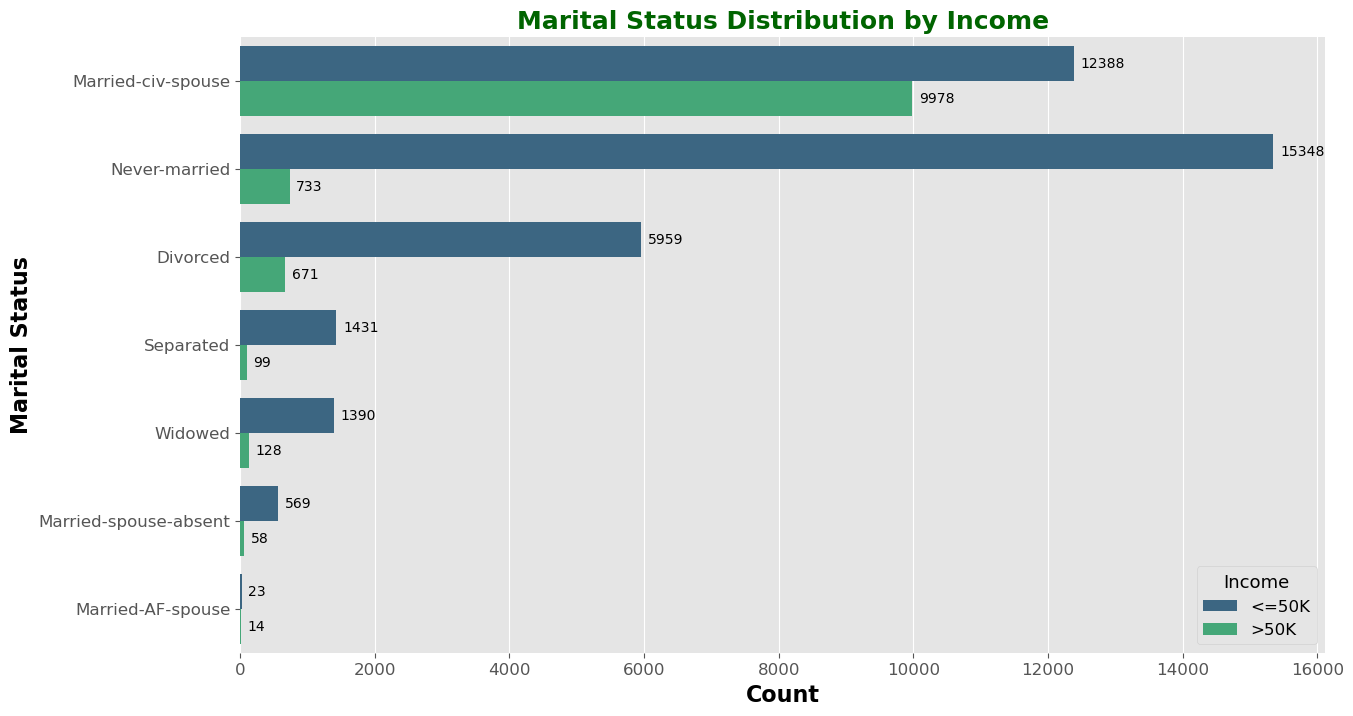

In [158]:
plot_marital_status_by_income(data)

* `marital-status` vs. `age`

In [160]:
def plot_marital_status_by_age(data):
    # Get unique marital status categories
    marital_statuses = data['marital-status'].unique()
    
    # Create a colormap with as many colors as there are marital statuses
    colors = plt.cm.tab10(range(len(marital_statuses)))  # Using 'tab10' for 10 distinct colors

    plt.figure(figsize=(14, 8))
    
    # Plot a histogram for each marital status category with a unique color
    for status, color in zip(marital_statuses, colors):
        age_data = data[data['marital-status'] == status]['age']
        plt.hist(age_data, bins=80, alpha=0.7, label=status, color=color, edgecolor='black')
    
    # Add labels and title
    plt.title("Distribution of Age by Marital Status", fontsize=16, color='darkgreen', fontweight='bold')
    plt.xlabel("Age", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    
    # Add legend with unique marital status categories
    plt.legend(title="Marital Status", fontsize=12, title_fontsize=12)
    
    plt.show()

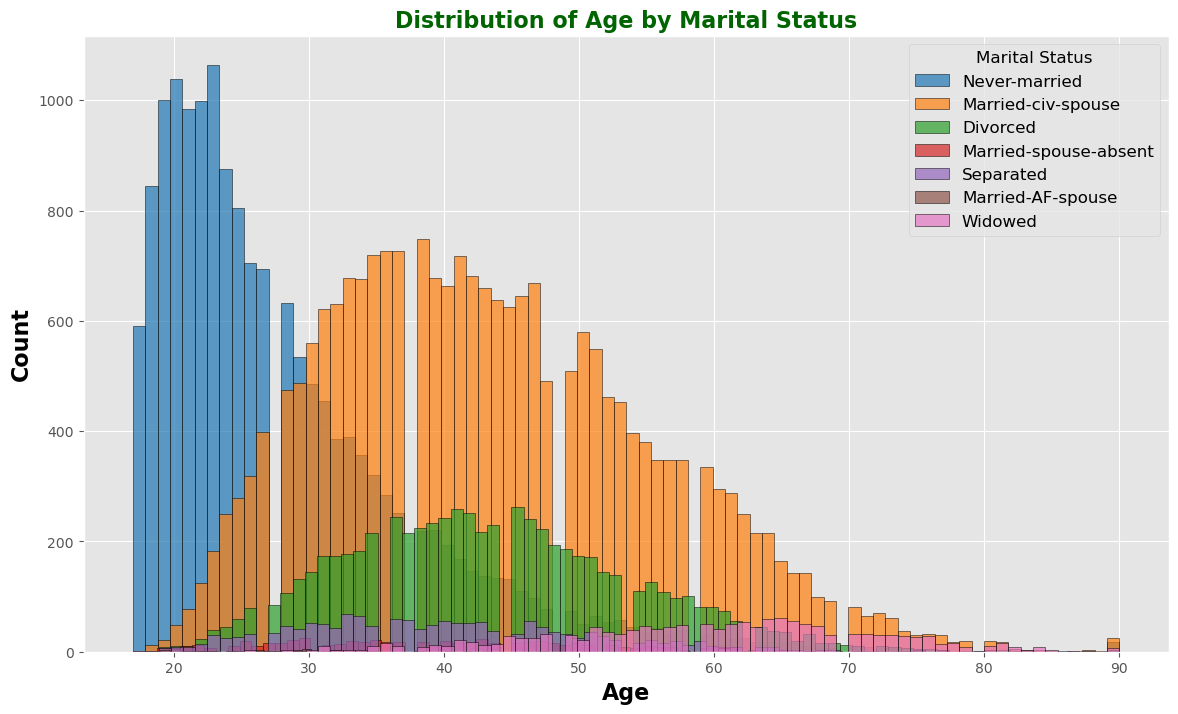

In [161]:
plot_marital_status_by_age(data)

**<font color = blue>4. Data distribution of `occupation`</font>**

* `occupation`

In [164]:
def plot_occupation_distribution(data):
    plt.figure(figsize=(14, 8))
    
    ax = sns.countplot(data=data, y='occupation', order=data['occupation'].value_counts().index)

    for p in ax.patches:
        count = int(p.get_width())
        if count > 0:
            ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2, 
                    f'{count}', va='center', fontsize=12, color='black')
    
    plt.title("Occupation Distribution", fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Occupation", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    sns.despine(left=True, bottom=True)
    
    plt.show()

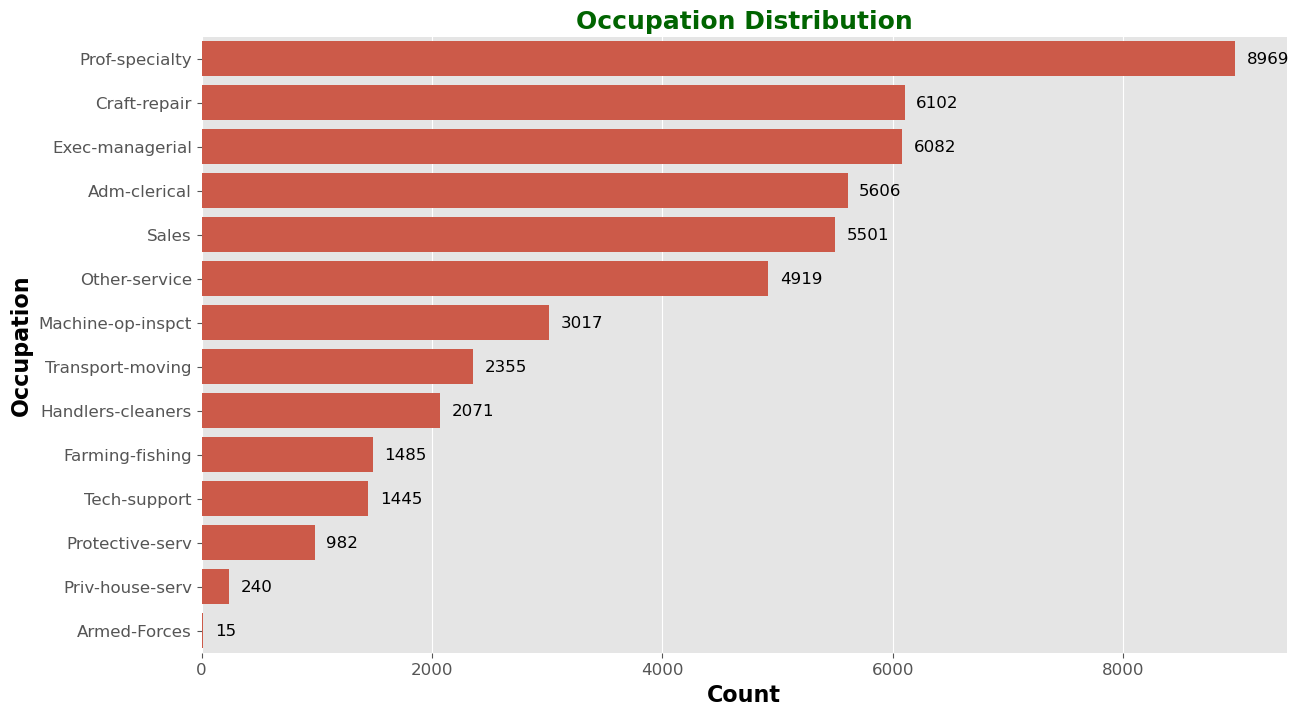

In [165]:
plot_occupation_distribution(data)

* `occupation` vs. `income`

In [167]:
def plot_occupation_by_income(data):
    plt.figure(figsize=(14, 8))
    
    ax = sns.countplot(data=data, y='occupation', hue='income', palette='viridis', order=data['occupation'].value_counts().index)

    for p in ax.patches:
        count = int(p.get_width())
        if count > 0:
            ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2,  # Đặt vị trí của văn bản
                f'{count}', va='center', fontsize=10, color='black')
    
    plt.title("Occupation Distribution by Income", fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Occupation", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.legend(title="Income", labels=['<=50K', '>50K'], fontsize=12, title_fontsize='13', loc='lower right')
    sns.despine(left=True, bottom=True)  # Remove top and right spines for a cleaner look
    
    plt.show()

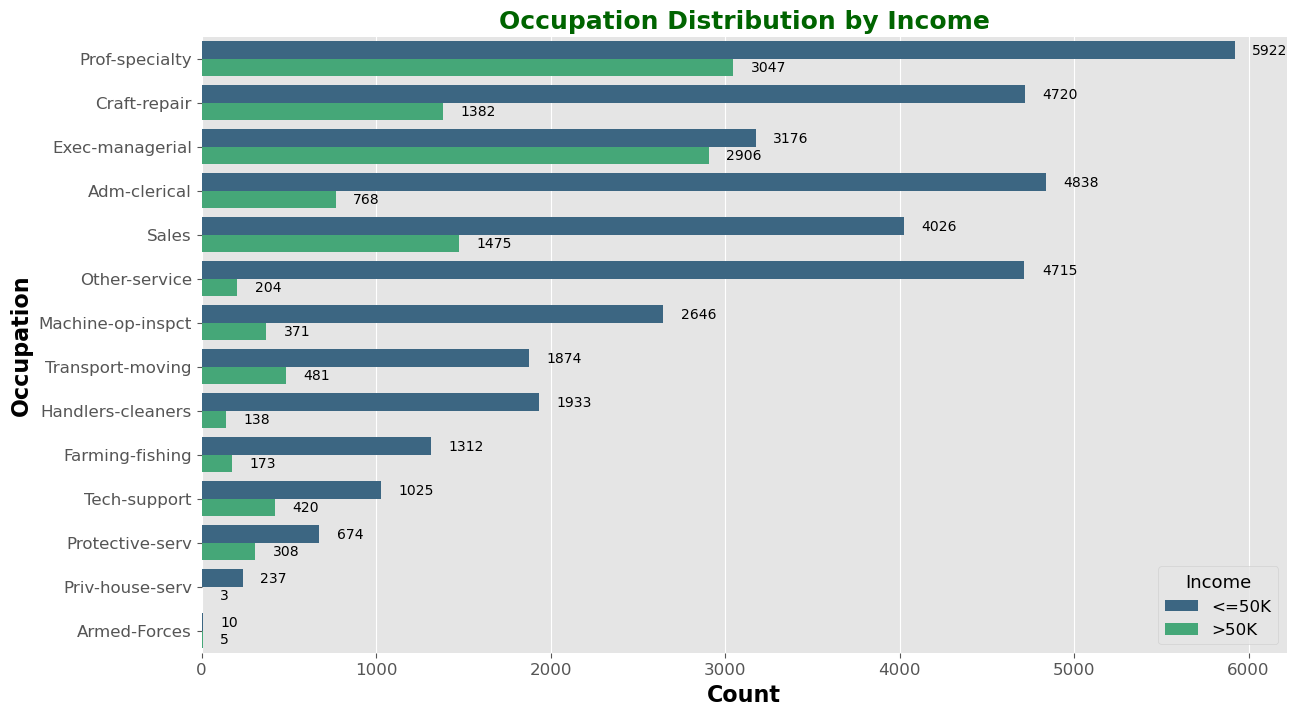

In [168]:
plot_occupation_by_income(data)

* `occupation` vs. `workclass`

In [53]:
def plot_workclass_vs_occupation(data):
    # Create a pivot table to count occurrences of each combination of workclass and occupation
    workclass_occupation_counts = data.pivot_table(index='workclass', columns='occupation', aggfunc='size', fill_value=0)

    # Plotting the stacked bar chart
    workclass_occupation_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

    # Adding title and labels
    plt.title("Distribution of Occupation by Workclass", fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel("Workclass", fontsize=14, fontweight='bold')
    plt.ylabel("Count", fontsize=14, fontweight='bold')
    
    # Adding legend with unique occupations
    plt.legend(title="Occupation", bbox_to_anchor=(1.0, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

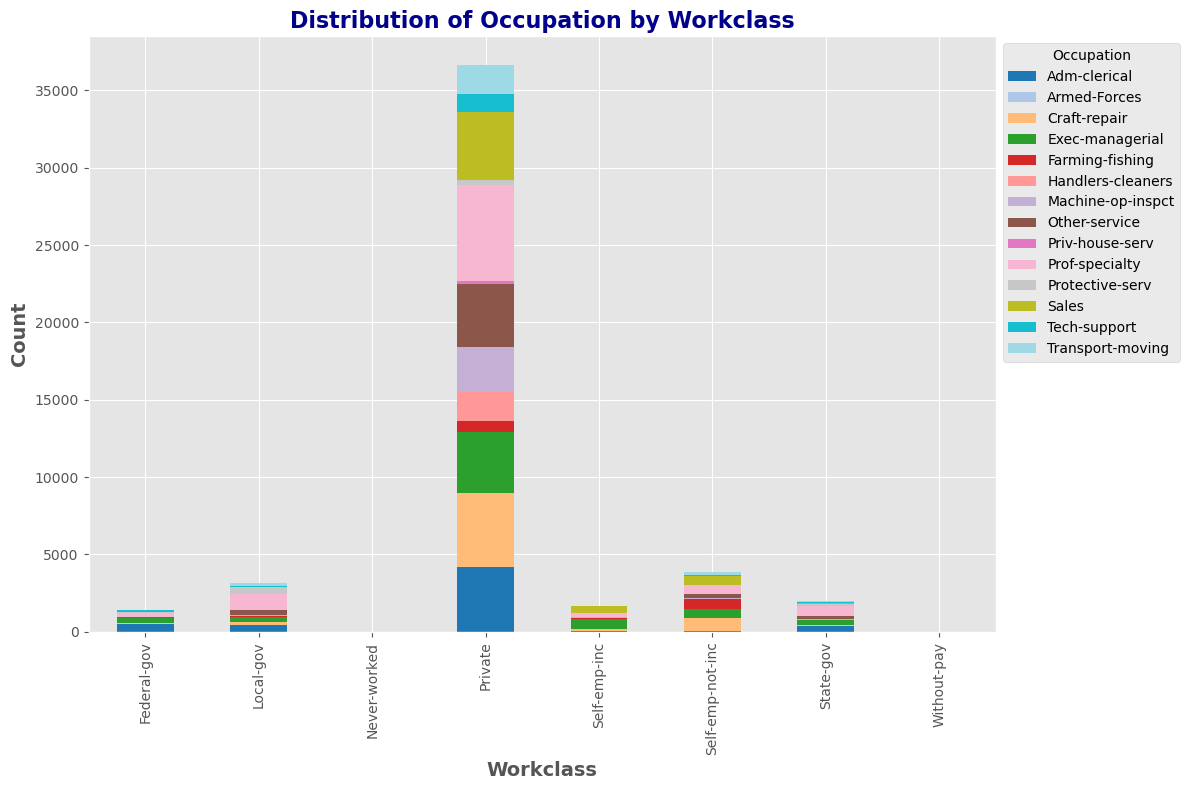

In [171]:
plot_workclass_vs_occupation(data)

* `occupation` vs. `age`

In [173]:
def plot_occupation_vs_age(data):
    # Sắp xếp các nghề nghiệp theo số lượng giảm dần để đảm bảo trật tự giống với order
    occupation_order = data['occupation'].value_counts().index
    
    # Tạo một dictionary để lưu dữ liệu tuổi theo từng nghề nghiệp
    age_by_occupation = {occupation: data[data['occupation'] == occupation]['age'] for occupation in occupation_order}
    
    # Tạo figure và plot
    plt.figure(figsize=(12, 8))
    plt.boxplot(age_by_occupation.values(), vert=False, patch_artist=True)
    
    # Cài đặt các nhãn trục
    plt.yticks(range(1, len(occupation_order) + 1), occupation_order, fontsize=12)
    plt.xlabel("Age", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Occupation",fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.title("Age Distribution by Occupation", fontsize=16, fontweight='bold', color='darkgreen')
    
    # Thêm màu sắc cho từng hộp
    colors = plt.cm.viridis(range(len(occupation_order)))
    for patch, color in zip(plt.gca().artists, colors):
        patch.set_facecolor(color)
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

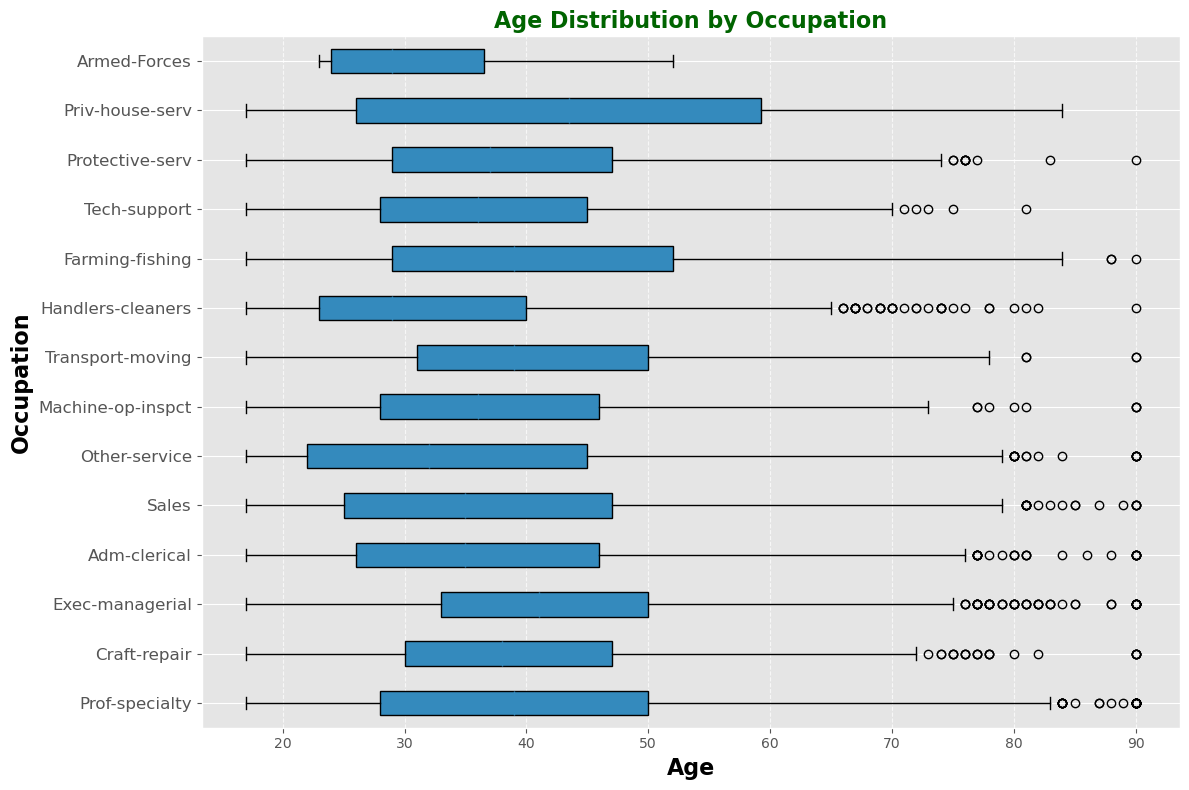

In [174]:
plot_occupation_vs_age(data)

* `occupation` vs. `sex`

In [176]:
def plot_occupation_by_sex(data):
    plt.figure(figsize=(14, 8))
    
    ax = sns.countplot(data=data, y='occupation', hue='sex', palette='viridis', order=data['occupation'].value_counts().index)

    for p in ax.patches:
        count = int(p.get_width())
        if count > 0:
            ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2,  # Đặt vị trí của văn bản
                f'{count}', va='center', fontsize=10, color='black')
    
    plt.title("Occupation Distribution by Sex", fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Occupation", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.legend(title="Income", labels=['Male', 'Female'], fontsize=12, title_fontsize='13', loc='lower right')
    sns.despine(left=True, bottom=True)  # Remove top and right spines for a cleaner look
    
    plt.show()

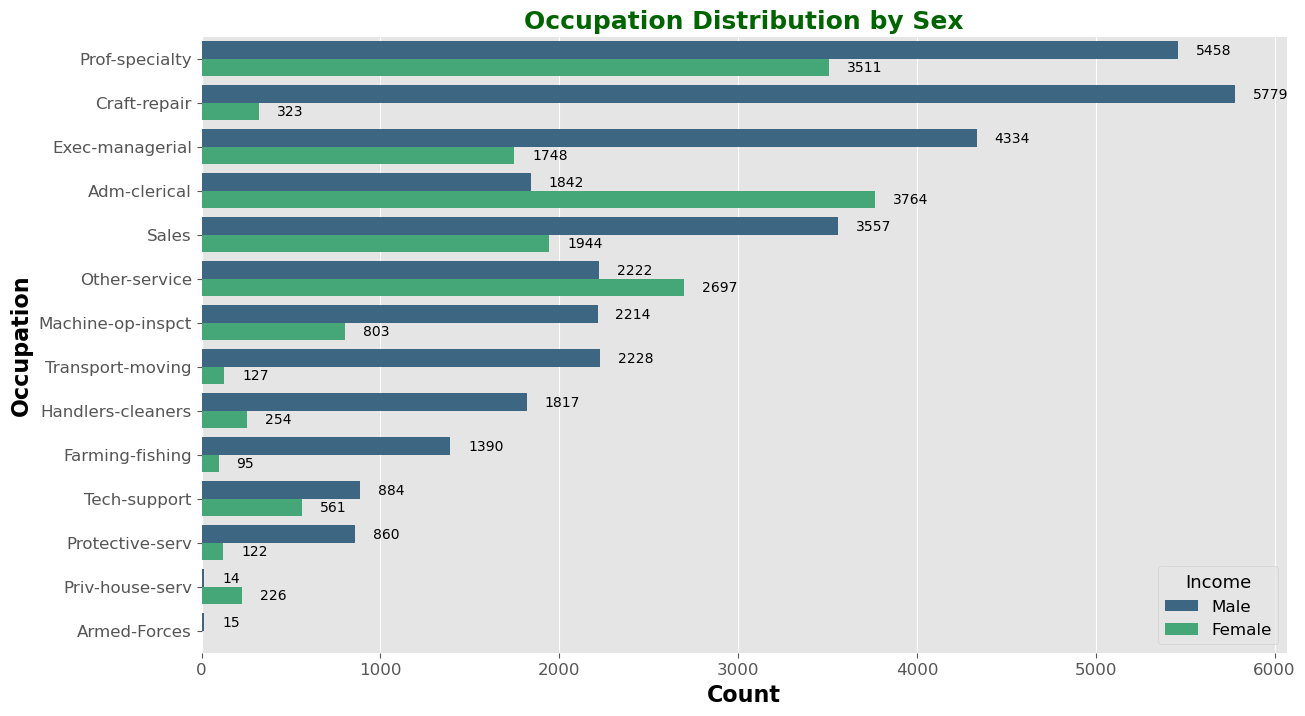

In [177]:
plot_occupation_by_sex(data)

* `occupation` vs. `education`

In [179]:
def plot_education_vs_occupation(data):
    # Tạo bảng pivot để đếm số lượng mỗi occupation trong mỗi education
    pivot_table = data.pivot_table(index='education', columns='occupation', aggfunc='size', fill_value=0)
    
    # Thiết lập figure và heatmap bằng Matplotlib
    plt.figure(figsize=(14, 8))
    
    # Vẽ heatmap với Seaborn style color map và tinh chỉnh
    heatmap = plt.imshow(pivot_table, cmap='viridis', aspect='auto')
    
    # Thêm chú thích cho từng ô trong heatmap với màu chữ phù hợp
    for i in range(len(pivot_table.index)):
        for j in range(len(pivot_table.columns)):
            plt.text(
                j, i, pivot_table.iloc[i, j],
                ha='center', va='center',
                color='black' if pivot_table.iloc[i, j] > pivot_table.values.max() / 2 else 'white',
                fontsize=8
            )

    # Cài đặt các nhãn cho trục
    plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns, rotation=90, fontsize=10, ha='center')
    plt.yticks(ticks=np.arange(len(pivot_table.index)), labels=pivot_table.index, fontsize=10)
    
    # Thêm tiêu đề và thanh màu (color bar) được điều chỉnh
    plt.title("Distribution of Occupation by Education", fontsize=16, fontweight='bold', color='darkgreen')
    cbar = plt.colorbar(heatmap, label="Count")
    cbar.ax.tick_params(labelsize=10)

    # Bật lưới nhẹ cho heatmap để làm cho các ô nhìn rõ ràng hơn
    plt.grid(visible=False)

    plt.tight_layout()
    plt.show()

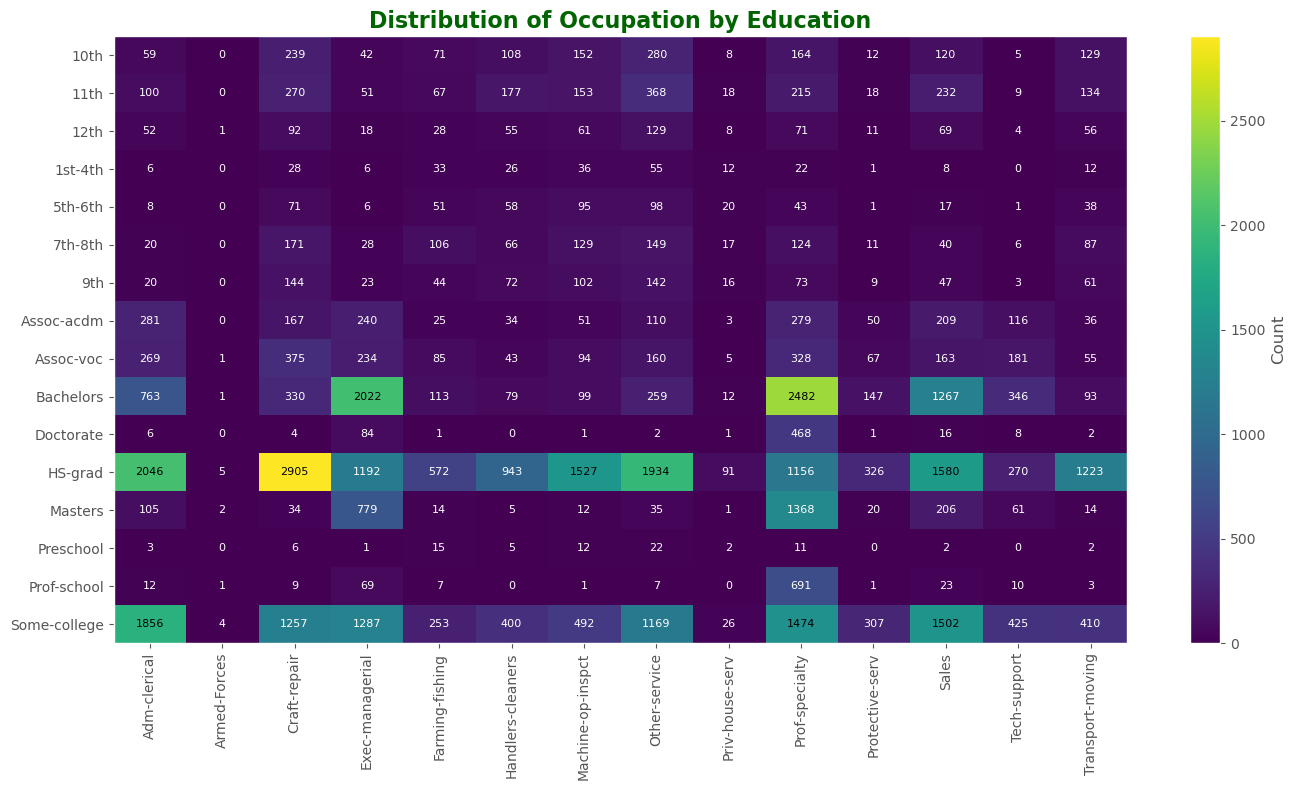

In [180]:
plot_education_vs_occupation(data)

**<font color = blue>5. Data distribution of `relationship`</font>**

* `relationship`

In [183]:
def plot_relationship_distribution(data):
    plt.figure(figsize=(14, 8))
    
    ax = sns.countplot(data=data, y='relationship', order=data['relationship'].value_counts().index)

    for p in ax.patches:
        count = int(p.get_width())
        if count > 0:
            ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2, 
                    f'{count}', va='center', fontsize=12, color='black')
    
    plt.title("Relationship Distribution", fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Relationship", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    sns.despine(left=True, bottom=True)
    
    plt.show()

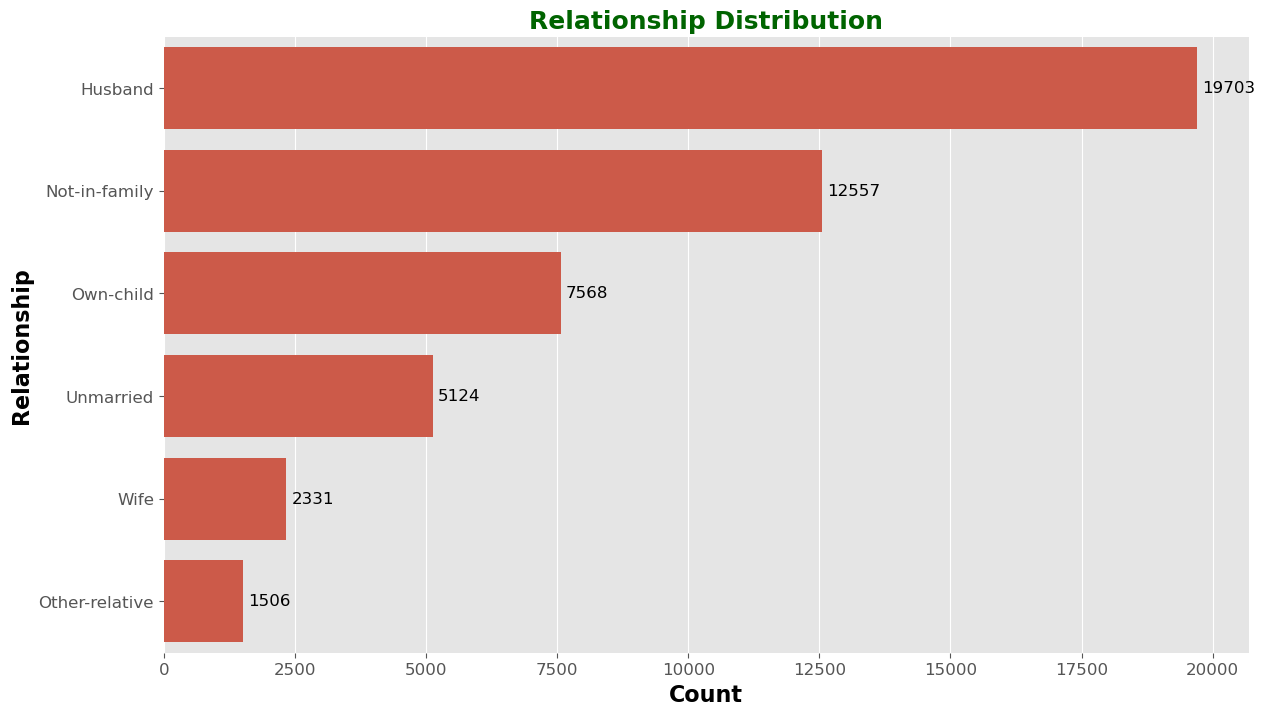

In [184]:
plot_relationship_distribution(data)

* `relationship` vs. `income`

In [186]:
def plot_relationship_by_income(data):
    plt.figure(figsize=(14, 8))
    
    ax = sns.countplot(data=data, y='relationship', hue='income', palette='viridis', order=data['relationship'].value_counts().index)

    for p in ax.patches:
        count = int(p.get_width())
        if count > 0:
            ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2,  # Đặt vị trí của văn bản
                f'{count}', va='center', fontsize=10, color='black')
    
    plt.title("Relationship Distribution by Income", fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Relationship", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.legend(title="Income", labels=['<=50K', '>50K'], fontsize=12, title_fontsize='13', loc='lower right')
    sns.despine(left=True, bottom=True)  # Remove top and right spines for a cleaner look
    
    plt.show()

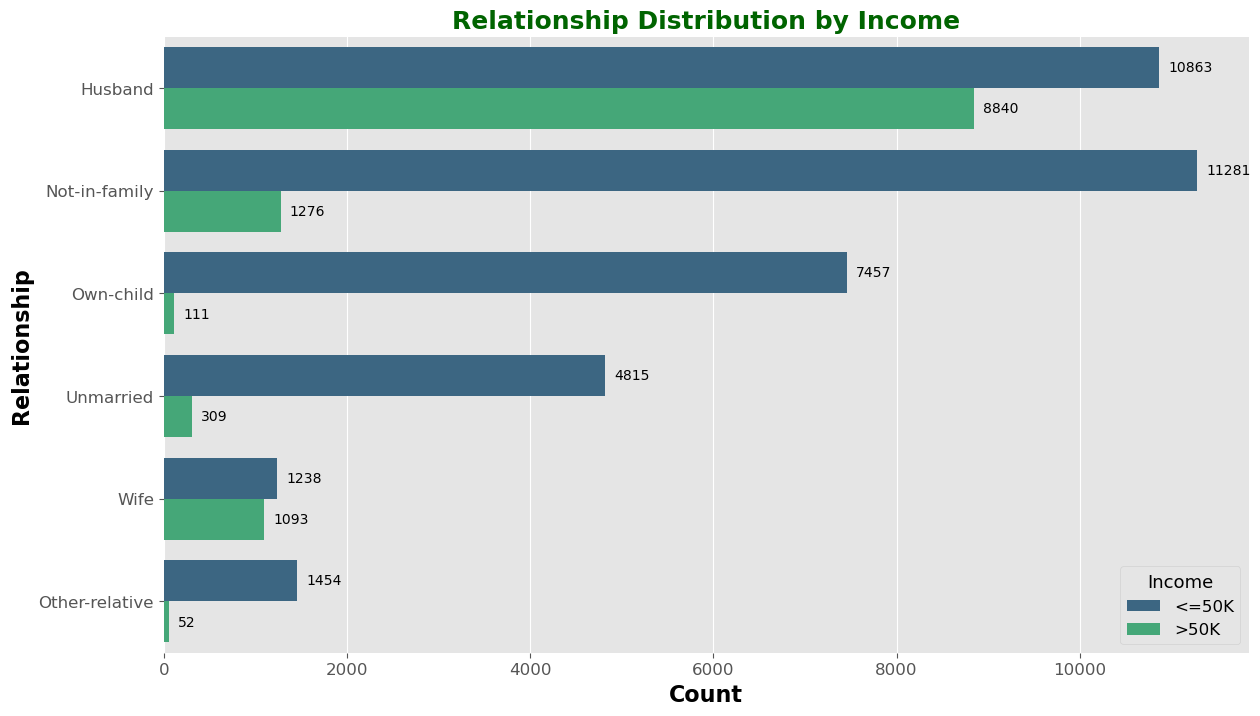

In [187]:
plot_relationship_by_income(data)

**<font color = blue>6. Data distribution of `race`</font>**

* `race`

In [190]:
def plot_race_distribution(data):
    plt.figure(figsize=(14, 8))
    
    ax = sns.countplot(data=data, y='race', order=data['race'].value_counts().index)

    for p in ax.patches:
        count = int(p.get_width())
        if count > 0:
            ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2, 
                    f'{count}', va='center', fontsize=12, color='black')
    
    plt.title("Race Distribution", fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Race", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    sns.despine(left=True, bottom=True)
    
    plt.show()

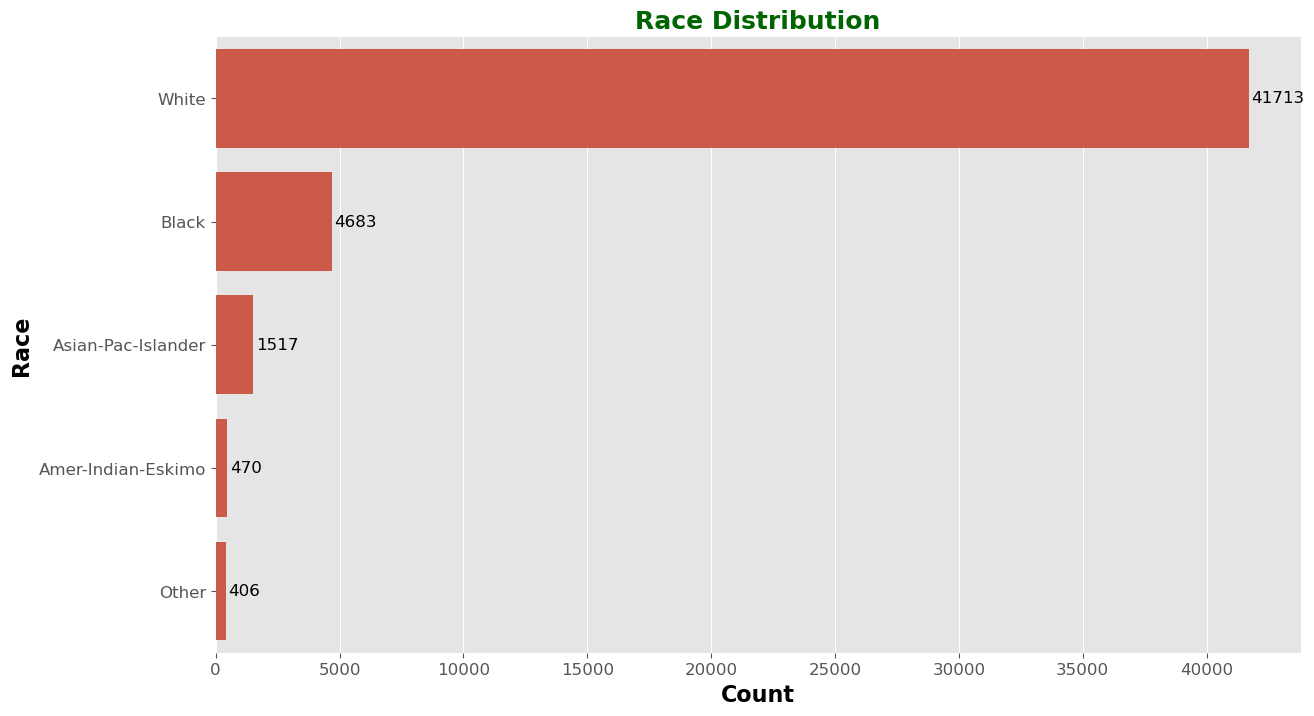

In [191]:
plot_race_distribution(data)

* `race` vs. `income`

In [193]:
def plot_race_by_income(data):
    plt.figure(figsize=(14, 8))
    
    ax = sns.countplot(data=data, y='race', hue='income', palette='viridis', order=data['race'].value_counts().index)

    for p in ax.patches:
        count = int(p.get_width())
        if count > 0:
            ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2,  # Đặt vị trí của văn bản
                f'{count}', va='center', fontsize=10, color='black')
    
    plt.title("Race Distribution by Income", fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Race", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.legend(title="Income", labels=['<=50K', '>50K'], fontsize=12, title_fontsize='13', loc='lower right')
    sns.despine(left=True, bottom=True)  # Remove top and right spines for a cleaner look
    
    plt.show()

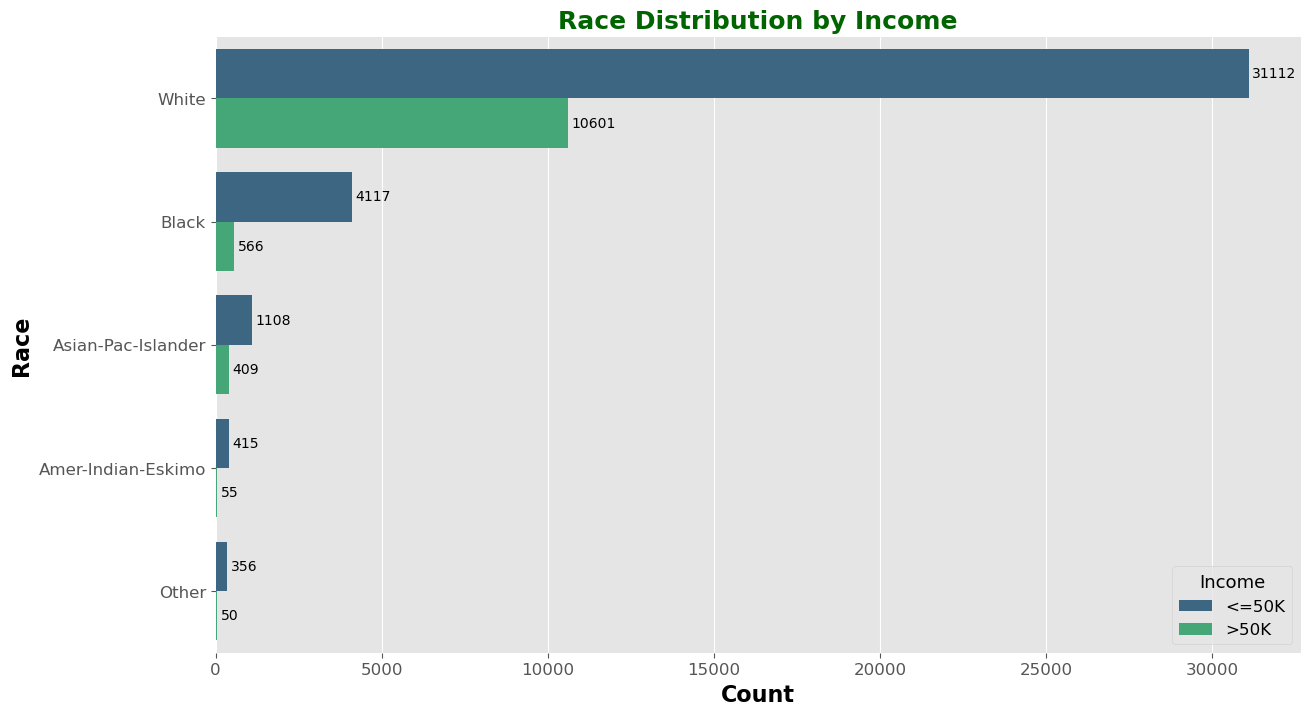

In [194]:
plot_race_by_income(data)

<font color = blue><b>7. Data distribution of `sex`</b></font>

* `sex`

In [197]:
def plot_sex_distribution(data):
    sex_counts = data['sex'].value_counts()
    
    plt.figure(figsize=(8, 8))
    plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'],
            wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})
    
    plt.title("Distribution of Sex", fontsize=18, fontweight='bold', color='darkgreen')
    plt.show()

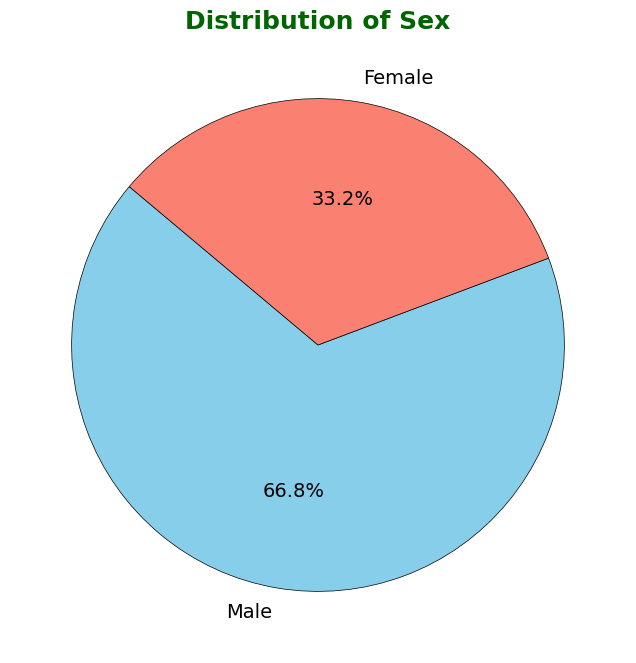

In [198]:
plot_sex_distribution(data)

* `sex` vs. `income`

In [200]:
def plot_sex_by_income(data):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=data, x='sex', hue='income', palette=['skyblue', 'salmon'], edgecolor='black', dodge=True)
    
    # Add title and labels
    plt.title("Distribution of Sex by Income", fontsize=16, color='darkgreen', fontweight='bold')
    plt.xlabel("Sex", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.legend(title="Income")
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black')
    plt.show()

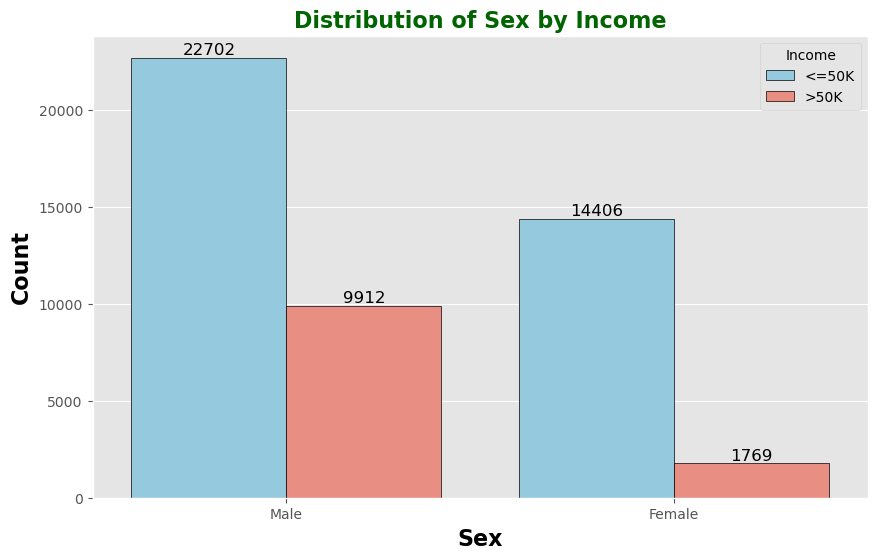

In [201]:
plot_sex_by_income(data)

**<font color = blue>8. Data distribution of `native-country`</font>**

* `native-country`

In [204]:
def plot_top_native_countries(data, top=30):
    top_countries = data['native-country'].value_counts().nlargest(top)
    plt.figure(figsize=(14, 8))
    plt.bar(top_countries.index, top_countries.values, color='skyblue')

    plt.title("Top 20 Native Country", fontsize=18, fontweight='bold',color='darkgreen')
    plt.xlabel("Count", fontdict={'fontsize':16, 'color':'black', 'fontweight':'bold'})
    plt.ylabel("Native Country", fontdict={'fontsize':16, 'color':'black', 'fontweight':'bold'})

    plt.xticks(rotation=45, ha='right', fontsize=12)

    for i, value in enumerate(top_countries.values):
        plt.text(i, value + 100, str(value), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

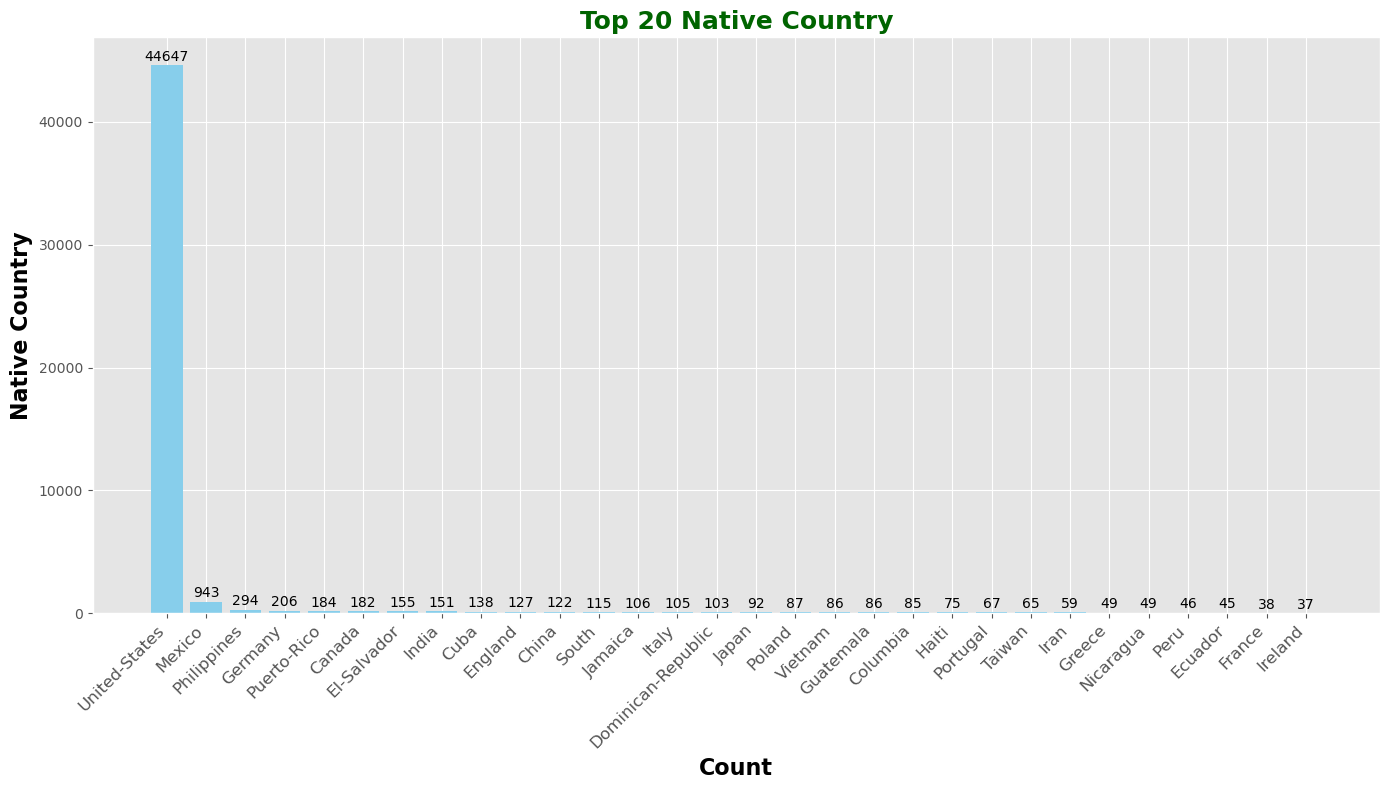

In [205]:
plot_top_native_countries(data)

In [206]:
def plot_native_country_by_income(data, top = 20):
    top_countries = data['native-country'].value_counts().nlargest(top).index

    top_data = data[data['native-country'].isin(top_countries)]
    income_counts = top_data.groupby(['native-country', 'income']).size().unstack(fill_value=0)

    plt.figure(figsize=(14, 8))
    income_counts.loc[top_countries].plot(kind = 'bar', stacked = True, color = ['skyblue', 'salmon'], edgecolor = 'black', width = 0.7, ax = plt.gca())

    plt.title("Top {} Native Countries by Income".format(top), fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel("Native Country", fontsize=16, fontweight='bold')
    plt.ylabel("Count", fontsize=16, fontweight='bold')

    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Thêm số lượng cụ thể trên mỗi phần của cột
    for i, country in enumerate(top_countries):
        cumulative_count = 0  # Đặt giá trị tích lũy ban đầu cho mỗi quốc gia
        for income, count in income_counts.loc[country].items():
            cumulative_count += count
            plt.text(i, cumulative_count - count / 2, str(count), ha='center', va='center', 
                     color='white' if count > 50 else 'black', fontsize=10)

    plt.tight_layout()
    plt.show()

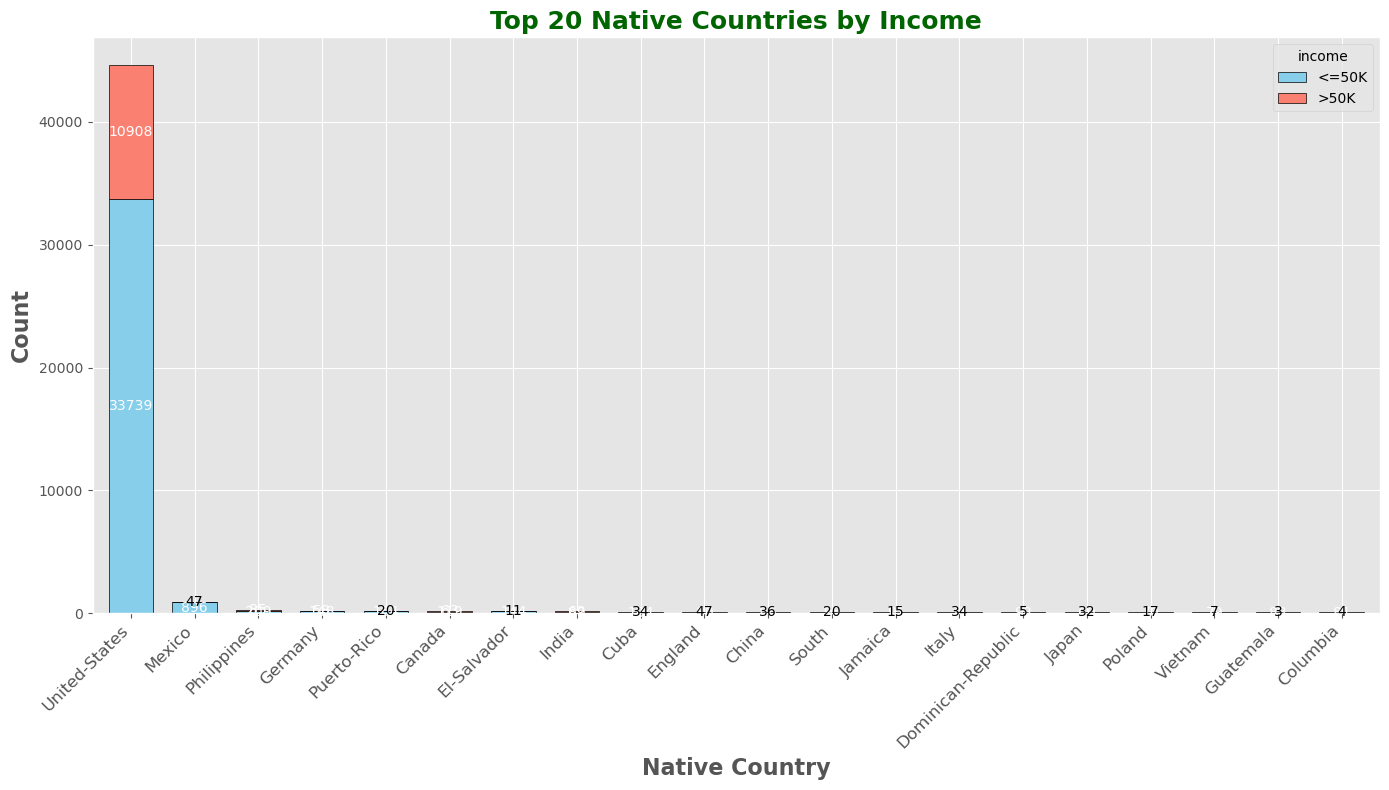

In [207]:
plot_native_country_by_income(data)

---

### **4.4. Additional Data Cleaning Methods** <a class = "anchor" id = "c344"></a>

**<font color = red><ins>Question:</ins></font> <font color = blue>Are there any futher steps, methods that can be implemented to make data to be more cleaner?</font>**

**<font color = green><ins>Answer</ins></font>**

Of course, there are many futher steps, methods that can be implemented to make data to be more cleaner.

#### **4.4.1. Whitespace Processing** <a class = "anchor" id = "c3441"></a>

In [214]:
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [215]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [216]:
columns_with_whitespace = [col for col in data.columns if col != col.strip()]

In [217]:
if columns_with_whitespace:
    print("The name of columns have whitespace:", columns_with_whitespace)
else:
    print("No any columns with whitespace")

No any columns with whitespace


In [218]:
whitespace_check = pd.DataFrame(False, index=data.index, columns=data.columns)
for col in data.columns:
    for idx in data.index:
        value = data.at[idx, col]
        if isinstance(value, str) and value != value.strip():
            whitespace_check.at[idx, col] = True

has_whitespace = whitespace_check.any(axis=1)
data_with_whitespace = data[has_whitespace]

In [219]:
data_with_whitespace

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []

In [220]:
for col in data.columns:
    if data[col].dtype == "object": 
        for idx in data.index:
            value = data.at[idx, col]
            if isinstance(value, str):
                data.at[idx, col] = value.strip()

In [221]:
data.shape

(48789, 15)

#### **4.4.2. Feature Engineering with Domain Knowledge** <a class = "anchor" id = "c3442"></a>

In [223]:
def value_counts_percentage(data, column_name):
    value_count = data[column_name].value_counts()
    value_count_norm = data[column_name].value_counts(normalize = True)

    value_count = value_count.rename_axis(column_name).reset_index(name = 'counts')
    value_count_norm = value_count_norm.rename_axis(column_name).reset_index(name='percentage')

    data_result = pd.concat([value_count[column_name], value_count['counts'], value_count_norm['percentage']], axis = 1)

    return data_result

* **Target Features**

In [225]:
value_counts_percentage(data, 'income')

income  counts  percentage
0  <=50K   37108    0.760581
1   >50K   11681    0.239419

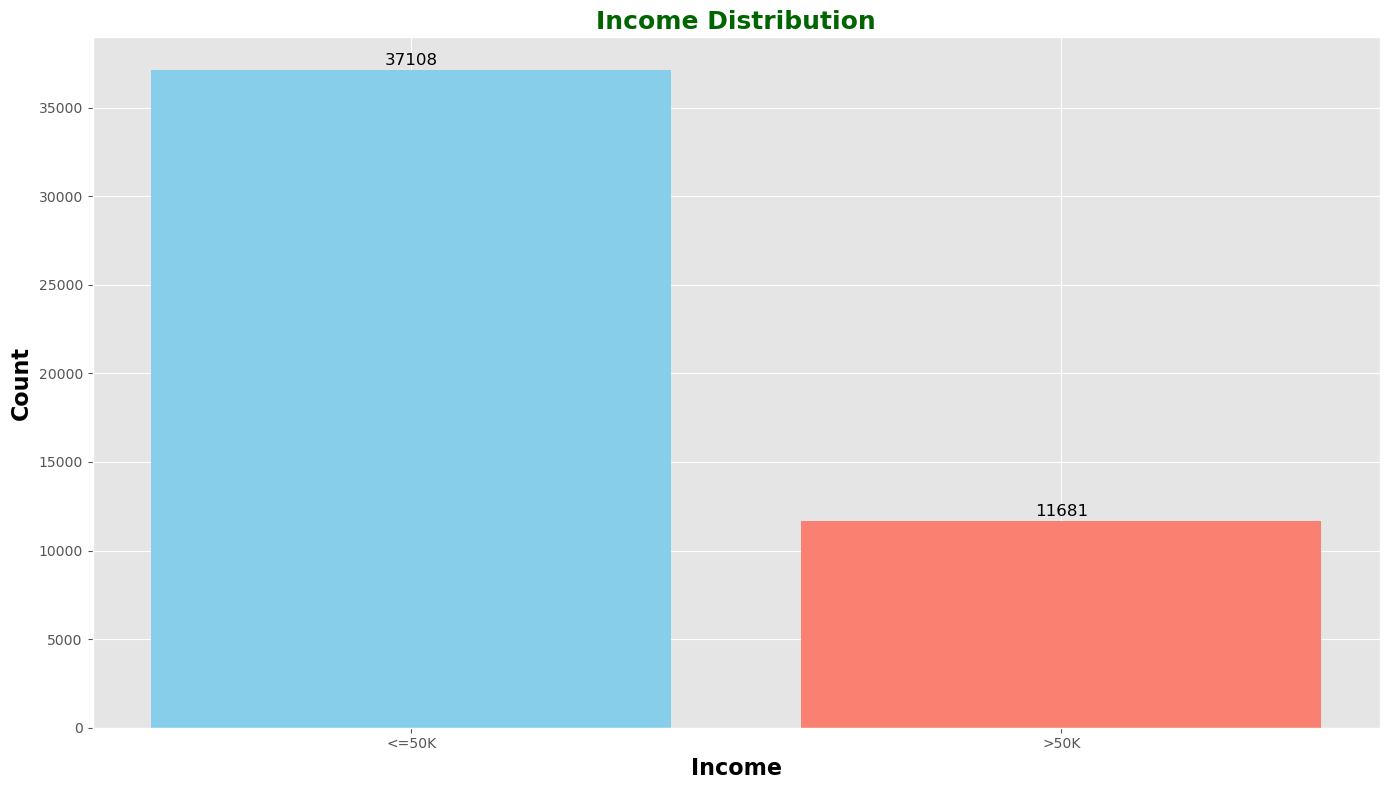

In [226]:
plot_income_distribution(data)

**Comments**

There are significantly more individuals in the `<=50K` income group, while `>50K` group has considerably fewer individuals.

The imbalance between the two income group is evident, highlighting a noticeable disparity in the dataset.

* **Categorical Features**

**`workclass`**

In [230]:
value_counts_percentage(data, 'workclass')

workclass  counts  percentage
0           Private   36654    0.751276
1  Self-emp-not-inc    3861    0.079137
2         Local-gov    3136    0.064277
3         State-gov    1981    0.040603
4      Self-emp-inc    1694    0.034721
5       Federal-gov    1432    0.029351
6       Without-pay      21    0.000430
7      Never-worked      10    0.000205

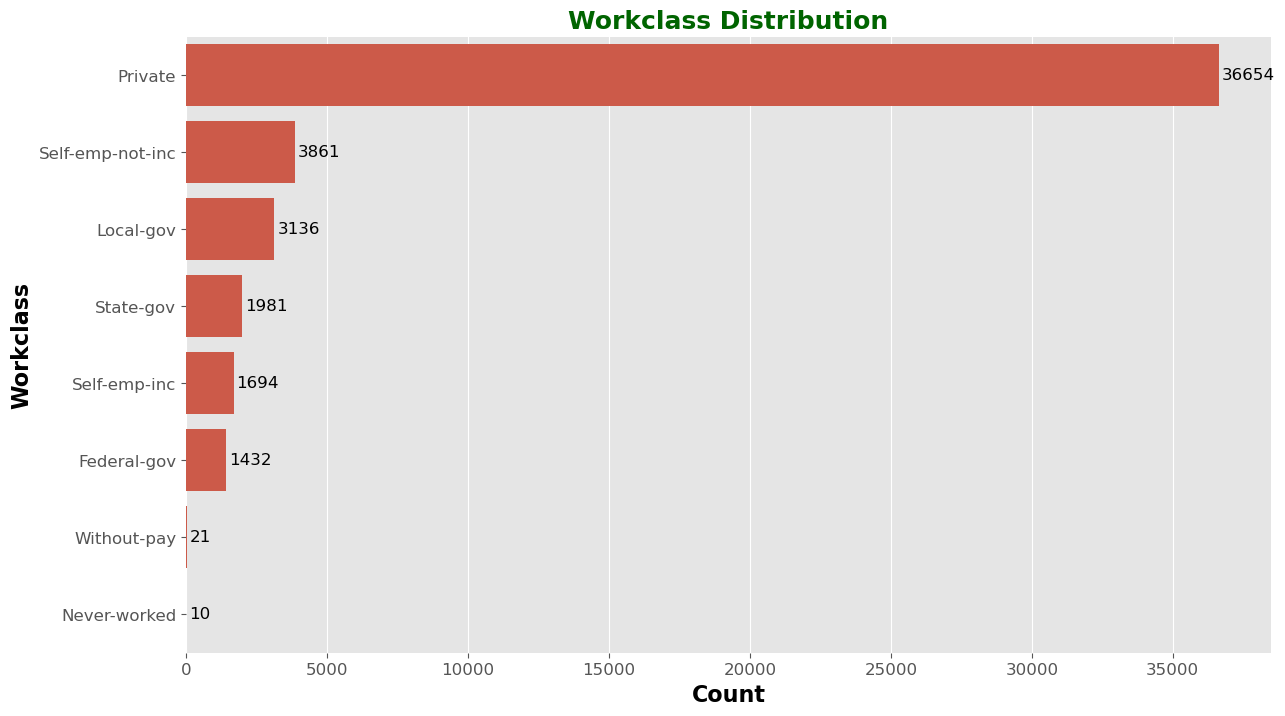

In [231]:
plot_workclass_distribution(data)

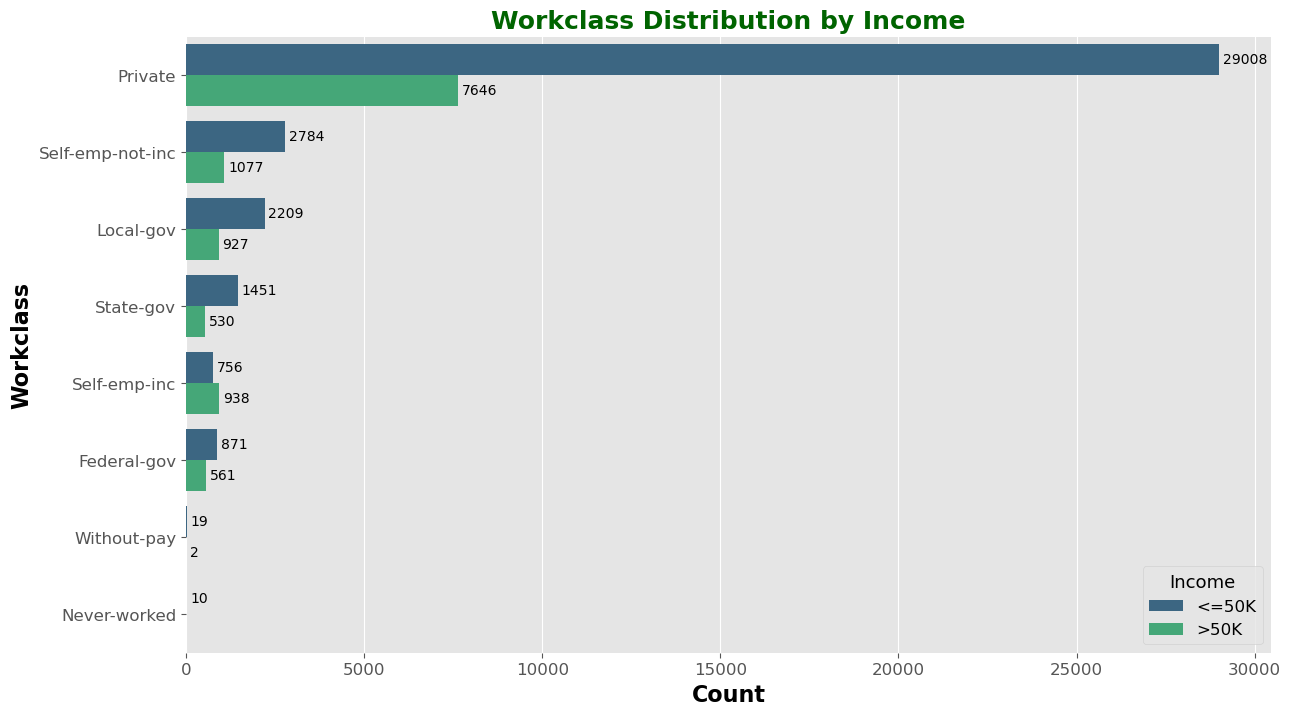

In [232]:
plot_workclass_by_income(data)

**Comments**

The private sector is the largest category within work classes, contributing notably to the income distribution gap.

Among self-employed individuals, those with incorporated businesses tend to have higher incomes than those without incorporation.

For government positions at the local, state, and federal levels, most employees fall into the low-income category; however, a substantial number are also in the high-income bracket.

Those working without pay and individuals who have never worked are predominantly found in the low-income category

To simplify the categorization by grouping  similar types of work classes into broader categories, we will transform these categories:
* `Self-emp-not-inc` and `Self-emp-inc` into `Self-employed`because all of both are related to self-employment, where individuals run their own businesses. By grouping these under a single label Self-employed, it simplifies the data by combining both incorporated and non-incorporated self-employed individuals into one category. This grouping is meaningful because both types represent individuals who are not traditional employees but rather business owners or freelancers, which may share similar economic or social characteristics.
* `Local-gov`, `State-gov`, and `Federal-gov` into a single category `Government-employees`, that simplifies the analysis by treating all government workers as a single group, regardless of their specific level of government. This grouping is logical because employees in government positions often have similar job security, benefits, and work structures, regardless of the level of government.

In [235]:
self_employed = ['Self-emp-not-inc', 'Self-emp-inc']
government_employees = ['Local-gov', 'State-gov', 'Federal-gov']

for idx in data.index:
    if data.at[idx, 'workclass'] in self_employed:
        data.at[idx, 'workclass'] = 'Self-employed'
    elif data.at[idx, 'workclass'] in government_employees:
        data.at[idx, 'workclass'] = 'Government-employees'

In [236]:
value_counts_percentage(data, 'workclass')

workclass  counts  percentage
0               Private   36654    0.751276
1  Government-employees    6549    0.134231
2         Self-employed    5555    0.113858
3           Without-pay      21    0.000430
4          Never-worked      10    0.000205

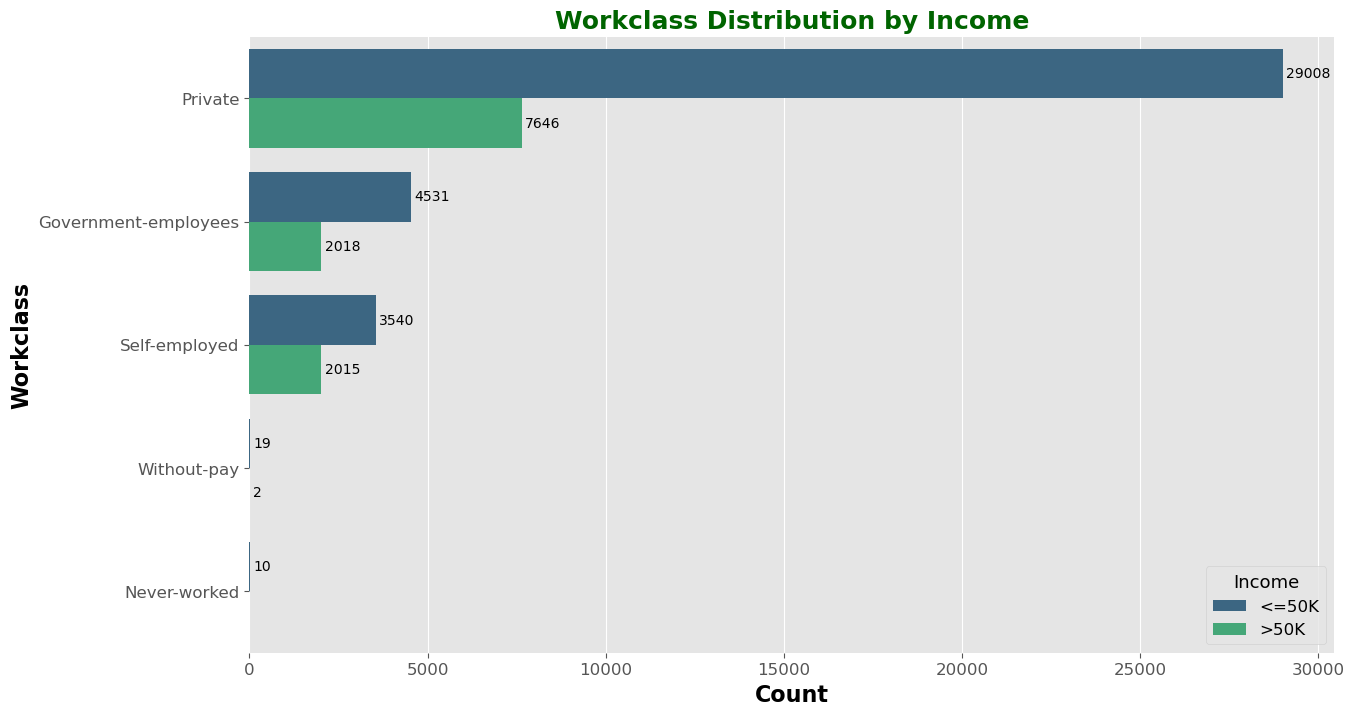

In [237]:
plot_workclass_by_income(data)

**`education`**

In [239]:
value_counts_percentage(data, 'education')

education  counts  percentage
0        HS-grad   15770    0.323229
1   Some-college   10862    0.222632
2      Bachelors    8013    0.164238
3        Masters    2656    0.054439
4      Assoc-voc    2060    0.042223
5           11th    1812    0.037140
6     Assoc-acdm    1601    0.032815
7           10th    1389    0.028470
8        7th-8th     954    0.019554
9    Prof-school     834    0.017094
10           9th     756    0.015495
11          12th     655    0.013425
12     Doctorate     594    0.012175
13       5th-6th     507    0.010392
14       1st-4th     245    0.005022
15     Preschool      81    0.001660

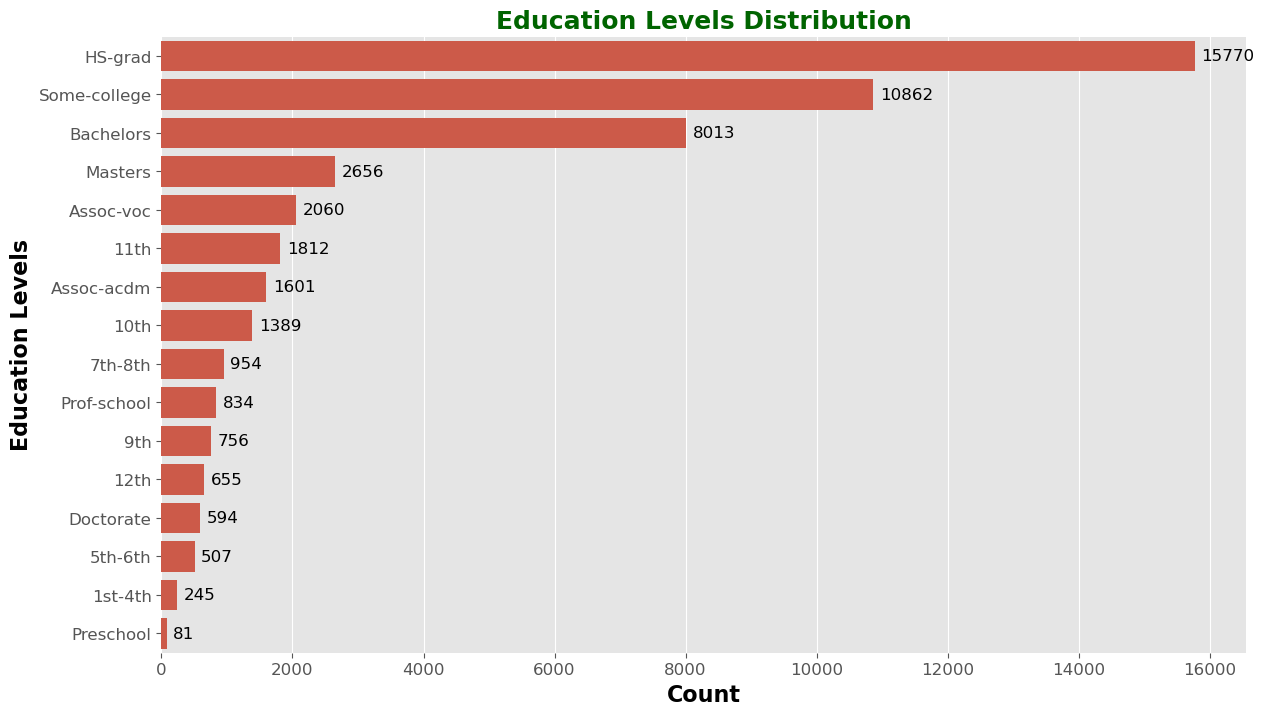

In [240]:
plot_education_distribution(data)

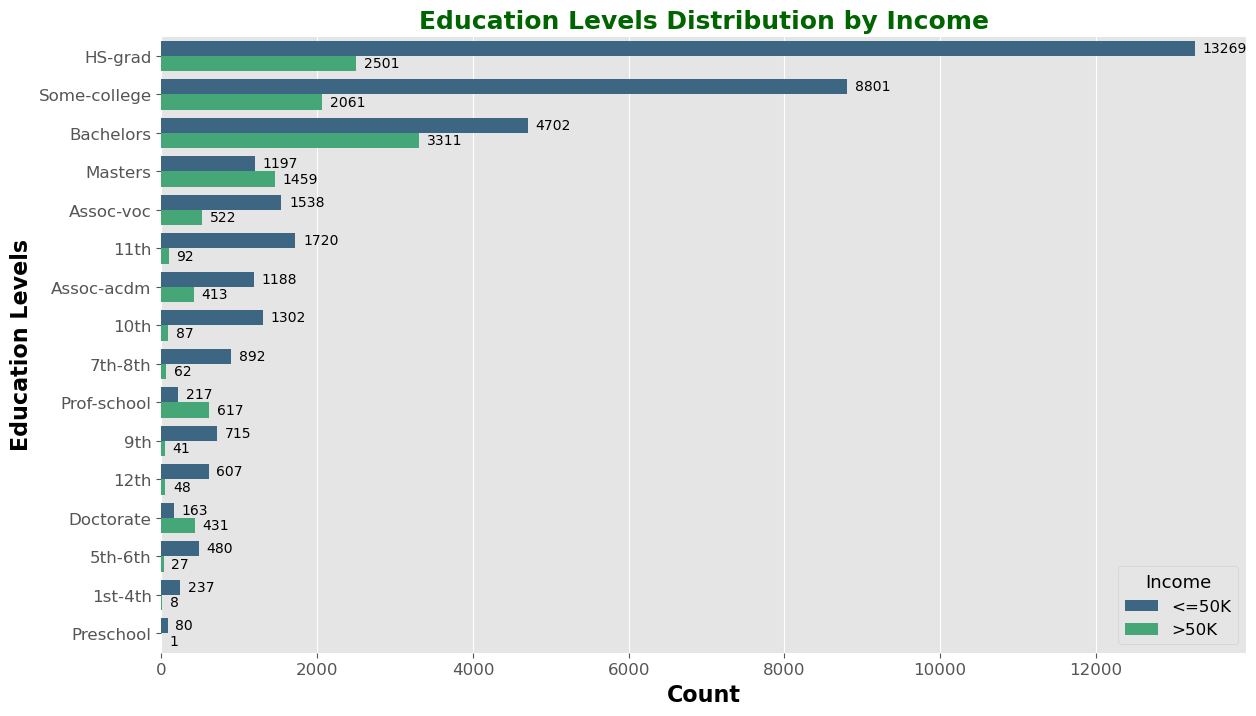

In [241]:
plot_education_levels_by_income(data)

**`marital-status`**

In [243]:
value_counts_percentage(data, 'marital-status')

marital-status  counts  percentage
0     Married-civ-spouse   22366    0.458423
1          Never-married   16081    0.329603
2               Divorced    6630    0.135891
3              Separated    1530    0.031360
4                Widowed    1518    0.031114
5  Married-spouse-absent     627    0.012851
6      Married-AF-spouse      37    0.000758

* **Widowed:** Individuals who have lost their spouse and have not remarried.
* **Divorced:** Individuals who have legally ended their marriage.
* **Separated**: Individuals who are still legally married but are living separately from their spouse
* **Never-married:** Individuals who have never been married.
* **Married-civ-spouse:** Individuals who are married and living with their spouse (civilian spouse).
* **Married-spouse-absent:** Individuals who are married but not currently living with their spouse.
* **Married-AF-spouse:** Individuals married to someone in the Armed Forces, likely living separately due to military service.vice.

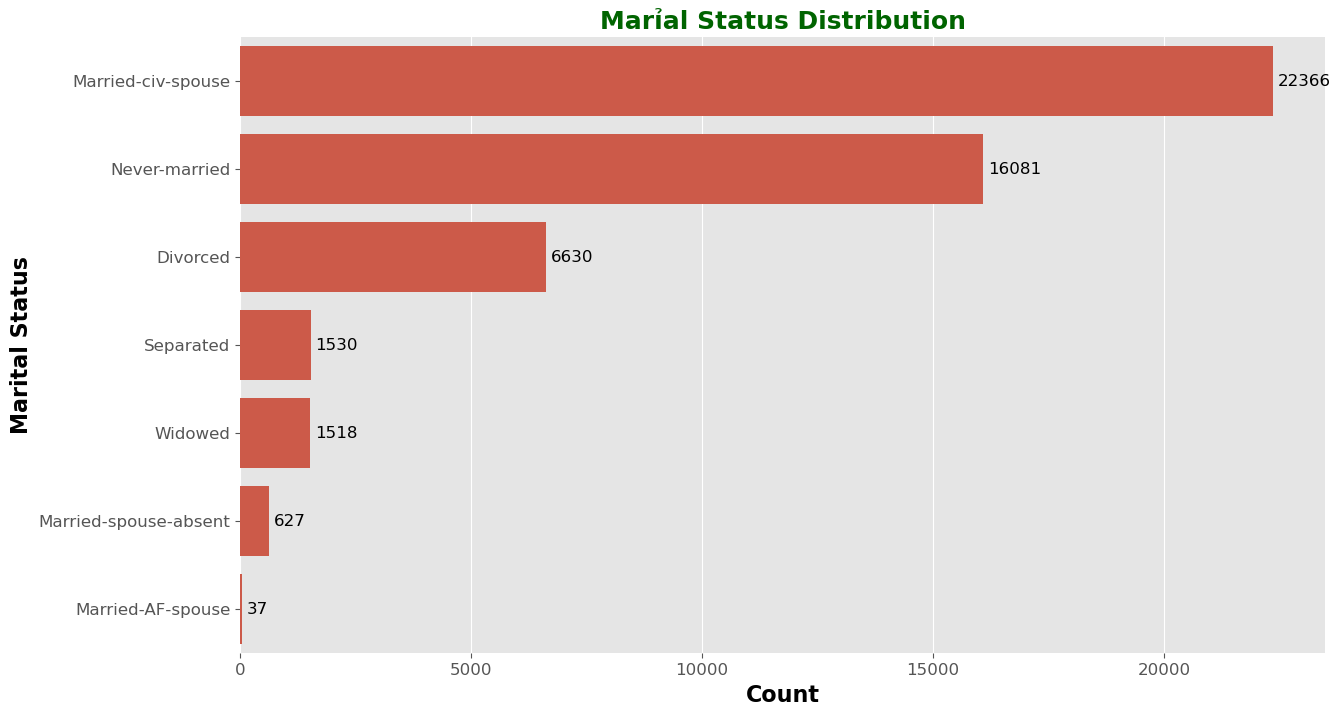

In [245]:
plot_marital_status_distribution(data)

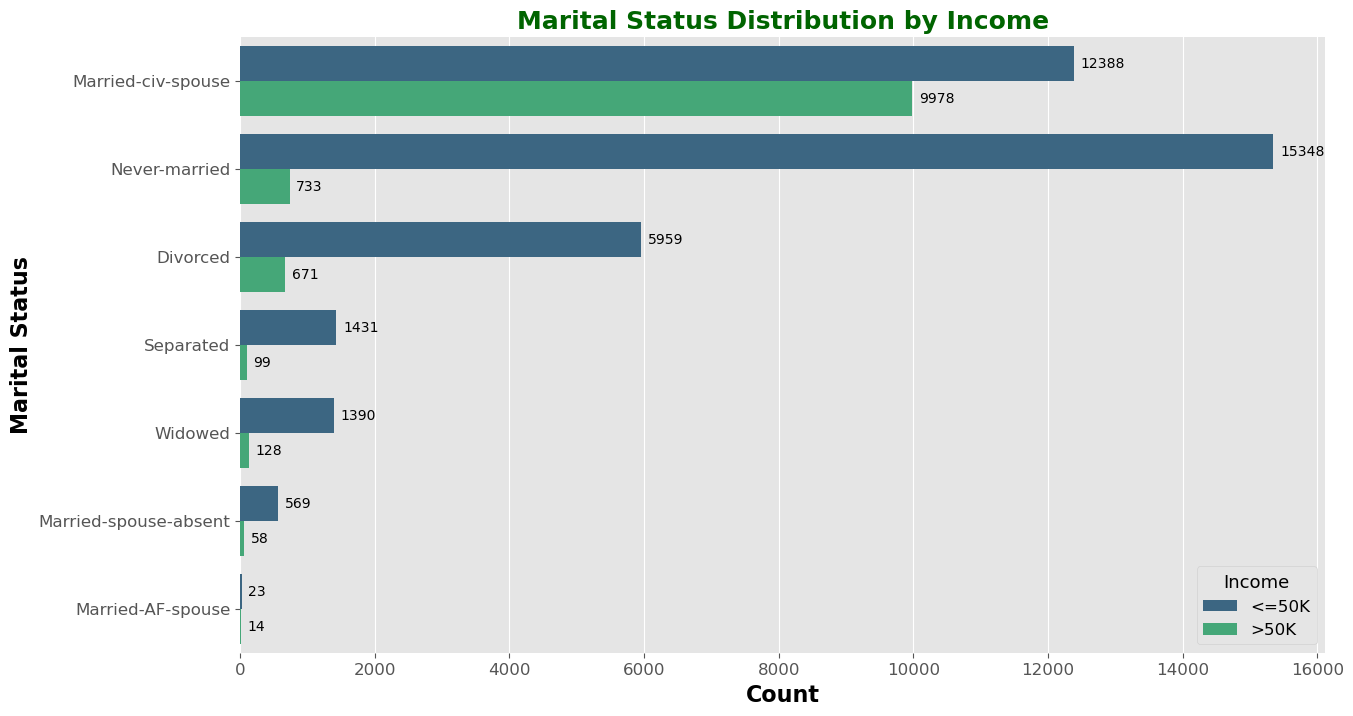

In [246]:
plot_marital_status_by_income(data)

**Comments**

To streamline analysis and enhance model performance, we merged similar marital status categories. This reduces the number of unique categories, making the data easier to manage and the results clearer to interpret.

In [248]:
married = ['Married-civ-spouse', 'Married-AF-spouse']
widowed = ['Divorced', 'Widowed']
single = ['Never-married']
separated = ['Married-spouse-absent', 'Separated']

for idx in data.index:
    current_status = data.at[idx, 'marital-status']
    if current_status in married:
        data.at[idx, 'marital-status'] = 'Married'
    elif current_status in widowed:
        data.at[idx, 'marital-status'] = 'Widowed'
    elif current_status in single:
        data.at[idx, 'marital-status'] = 'Single'
    elif current_status in separated:
        data.at[idx, 'marital-status'] = 'Separated'

In [249]:
value_counts_percentage(data, 'marital-status')

marital-status  counts  percentage
0        Married   22403    0.459181
1         Single   16081    0.329603
2        Widowed    8148    0.167005
3      Separated    2157    0.044211

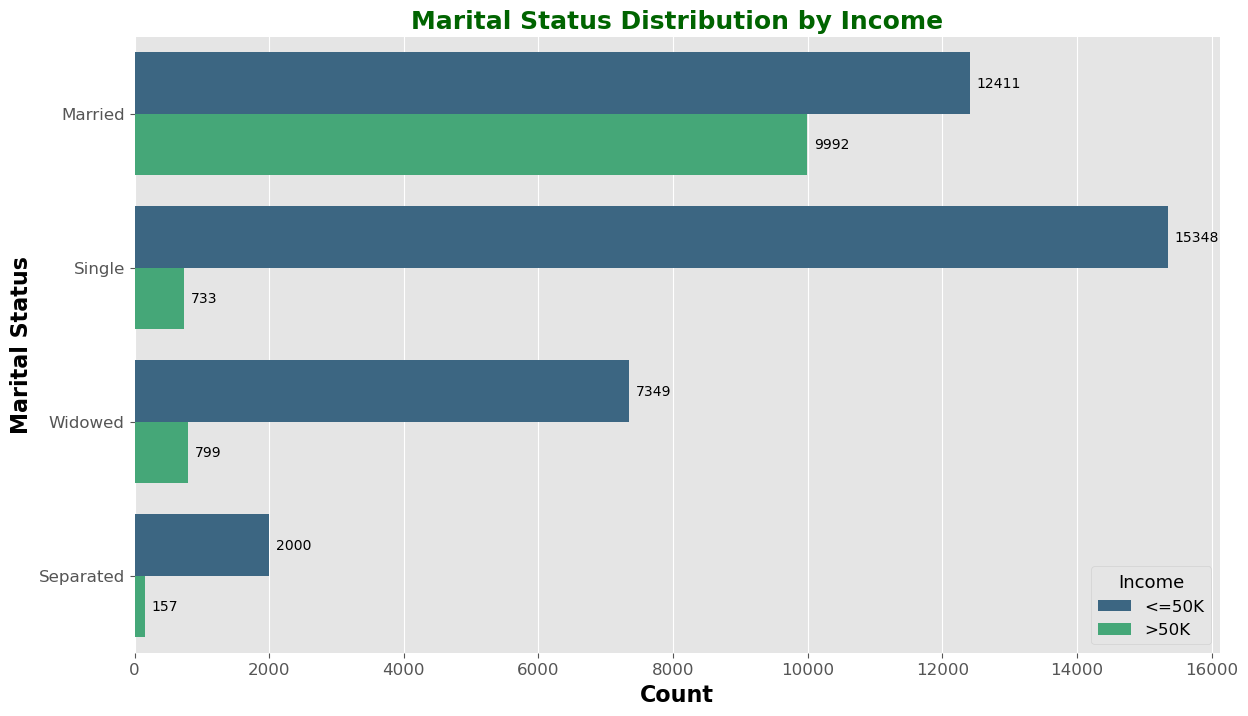

In [250]:
plot_marital_status_by_income(data)

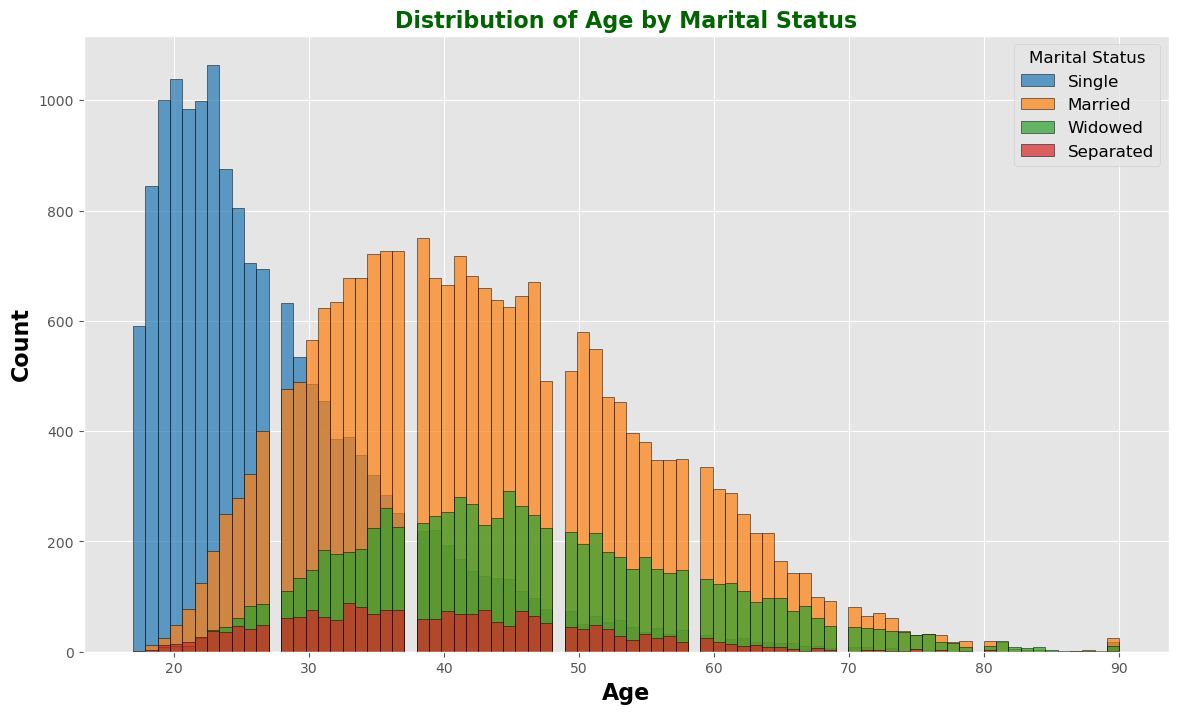

In [251]:
plot_marital_status_by_age(data)

**Comments**

* **Marriage Rates by Age:** Marriage rates are low among young adults, increase significantly in middle age, and gradually decline in older age. This trend reflects the current reality that young people today tend to focus on education and career development during the early stages of life, while marriage and family-building are more common in middle age. Among older adults, the marriage rate declines as many have lost their spouse due to health and age-related reasons.

* **Trend of Remaining Unmarried:** Higher rates of remaining unmarried among younger adults indicate that career- and education-focused lifestyles are becoming more prevalent in modern society. Young people are increasingly prioritizing education, personal growth, and career advancement before considering marriage. This reflects a broader social trend where personal goals are pursued before making a marital commitment.

* **Loss of Spouse and Separations:** Widowhood is more common among older adults, while separations are more concentrated in the middle-aged group. This suggests that loss of a spouse due to health issues is frequently observed in older age groups. In contrast, middle-aged adults may face increased life pressures and midlife crises, which can contribute to marital issues and lead to higher separation rates.

Overall, this chart clearly illustrates changes in marital status across age groups, aligning with current social trends: young people are career-focused, middle-aged individuals prioritize family, and older adults face the loss of a spouse. This trend reflects the evolving cultural and lifestyle shifts in modern society.

**`race`**

In [254]:
value_counts_percentage(data, 'race')

race  counts  percentage
0               White   41713    0.854967
1               Black    4683    0.095985
2  Asian-Pac-Islander    1517    0.031093
3  Amer-Indian-Eskimo     470    0.009633
4               Other     406    0.008322

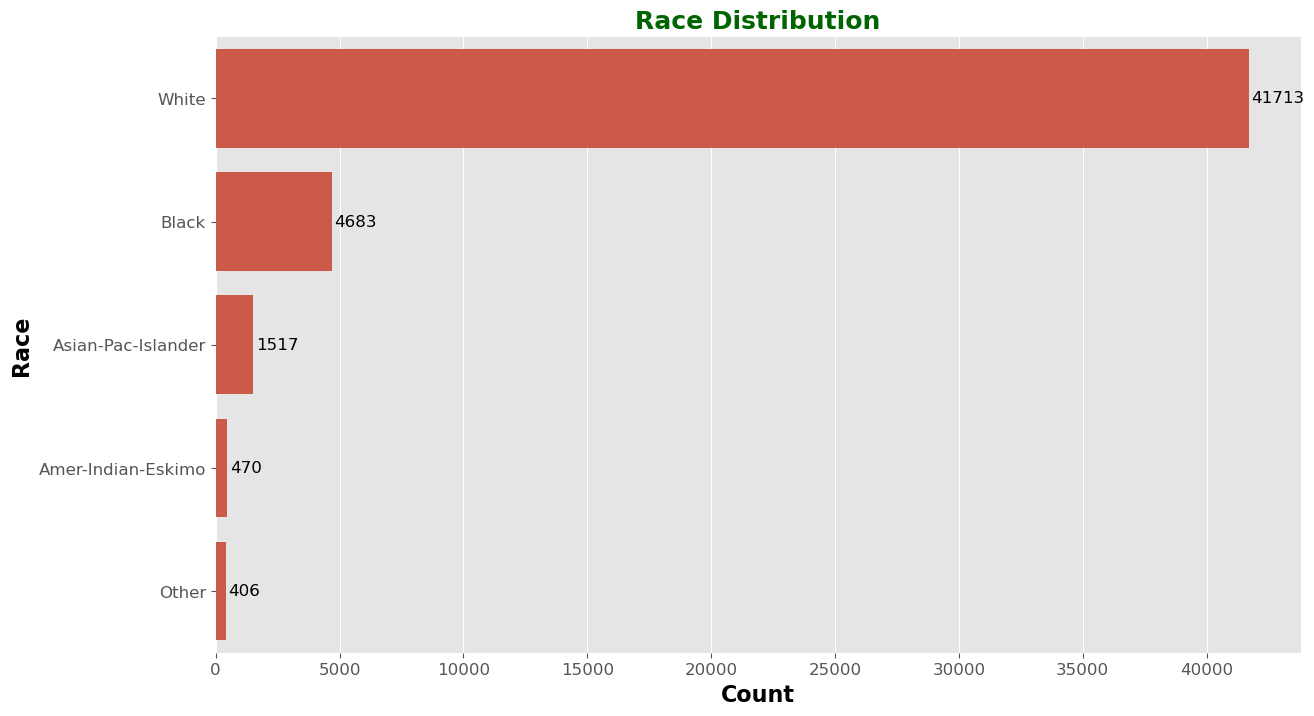

In [255]:
plot_race_distribution(data)

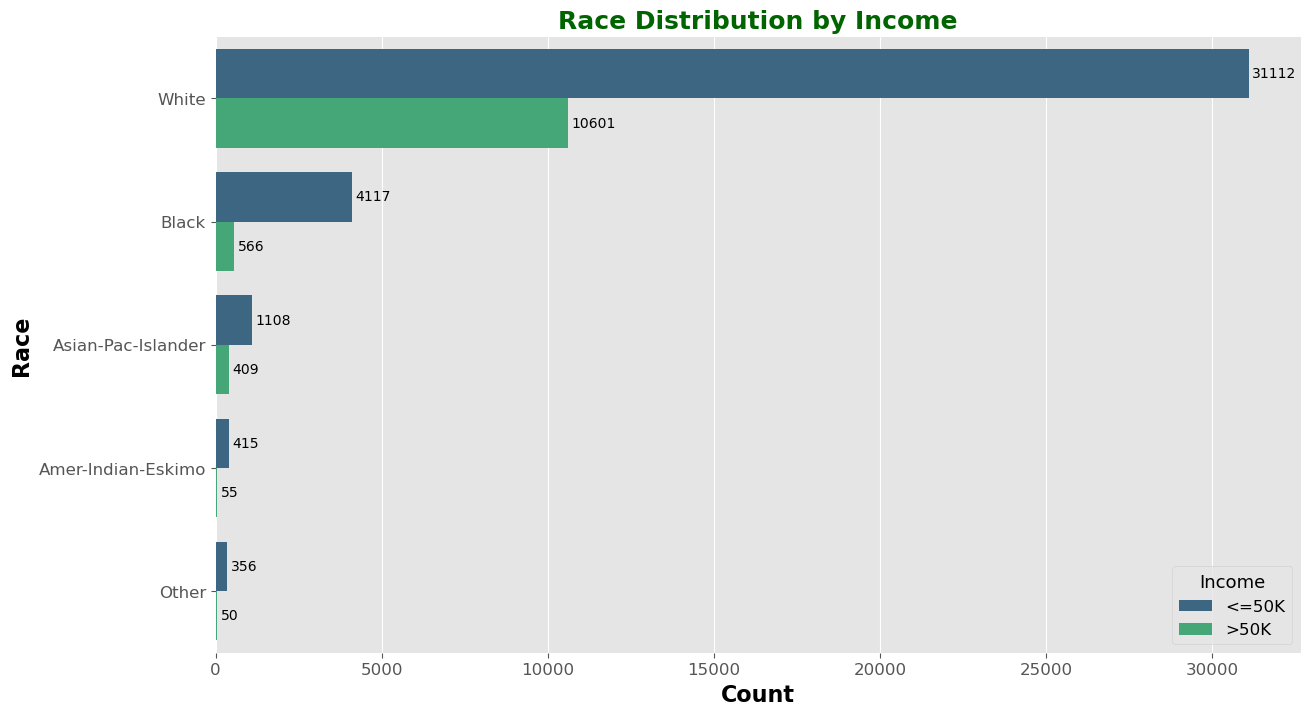

In [256]:
plot_race_by_income(data)

**Comments**

In the `race` column, categories with a low number of observations can be combined under an "Others" category.

In [258]:
others = ['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
for idx in data.index:
    if data.at[idx, 'race'] in others:
        data.at[idx, 'race'] = 'Others'

In [259]:
value_counts_percentage(data, 'race')

race  counts  percentage
0   White   41713    0.854967
1   Black    4683    0.095985
2  Others    2393    0.049048

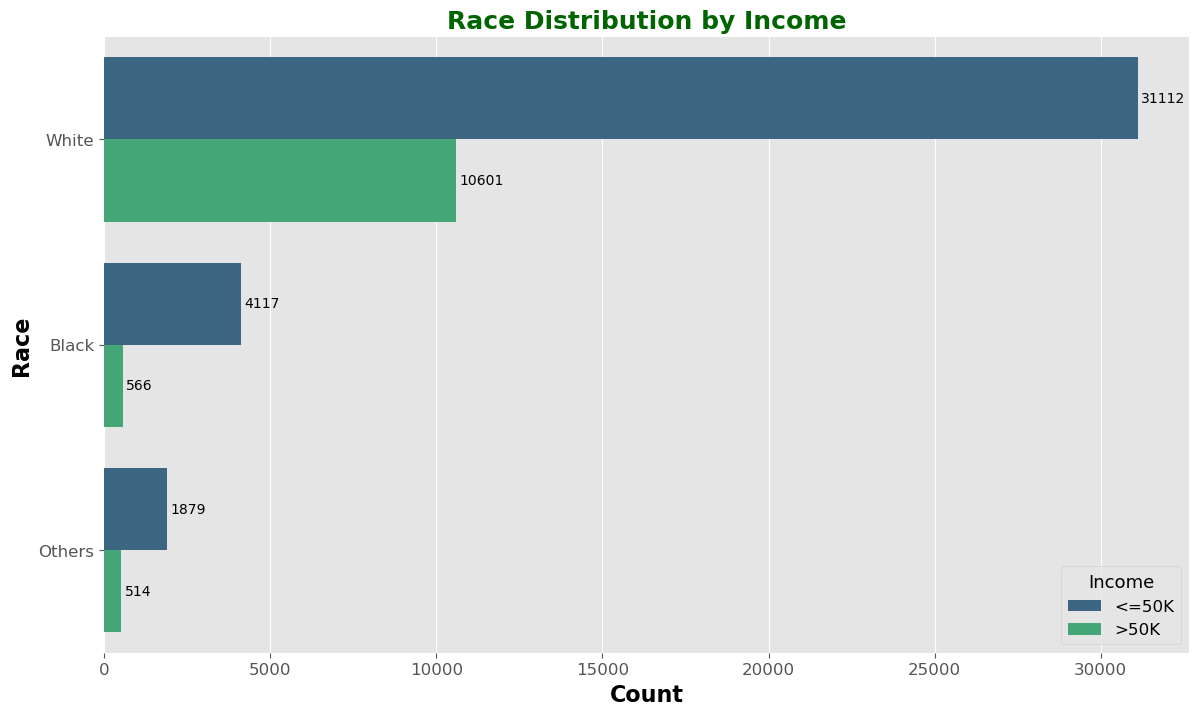

In [260]:
plot_race_by_income(data)

**`native-country`**

In [262]:
value_counts_percentage(data, 'native-country')

native-country  counts  percentage
0                United-States   44647    0.915104
1                       Mexico     943    0.019328
2                  Philippines     294    0.006026
3                      Germany     206    0.004222
4                  Puerto-Rico     184    0.003771
5                       Canada     182    0.003730
6                  El-Salvador     155    0.003177
7                        India     151    0.003095
8                         Cuba     138    0.002829
9                      England     127    0.002603
10                       China     122    0.002501
11                       South     115    0.002357
12                     Jamaica     106    0.002173
13                       Italy     105    0.002152
14          Dominican-Republic     103    0.002111
15                       Japan      92    0.001886
16                      Poland      87    0.001783
17                     Vietnam      86    0.001763
18                   Guatemala      86    0.001763
19                    Columbia      85    0.001742
20                       Haiti      75    0.001537
21                    Portugal      67    0.001373
22                      Taiwan      65    0.001332
23                        Iran      59    0.001209
24                      Greece      49    0.001004
25                   Nicaragua      49    0.001004
26                        Peru      46    0.000943
27                     Ecuador      45    0.000922
28                      France      38    0.000779
29                     Ireland      37    0.000758
30                    Thailand      30    0.000615
31                        Hong      30    0.000615
32                    Cambodia      28    0.000574
33             Trinadad&Tobago      27    0.000553
34  Outlying-US(Guam-USVI-etc)      23    0.000471
35                        Laos      23    0.000471
36                  Yugoslavia      23    0.000471
37                    Scotland      21    0.000430
38                    Honduras      20    0.000410
39                     Hungary      19    0.000389
40          Holand-Netherlands       1    0.000020

In [263]:
for idx in data.index:
    if data.at[idx, 'native-country'] == 'USA':
        data.at[idx, 'native-country'] = 'United-States'

native_country_values = data['native-country'].values

native_country_values = np.where(
    native_country_values == 'United-States', 'United-States', 
    np.where(native_country_values == 'Mexico', 'Mexico', 'Others')
)

data['native-country'] = native_country_values

In [264]:
value_counts_percentage(data, 'native-country')

native-country  counts  percentage
0  United-States   44647    0.915104
1         Others    3199    0.065568
2         Mexico     943    0.019328

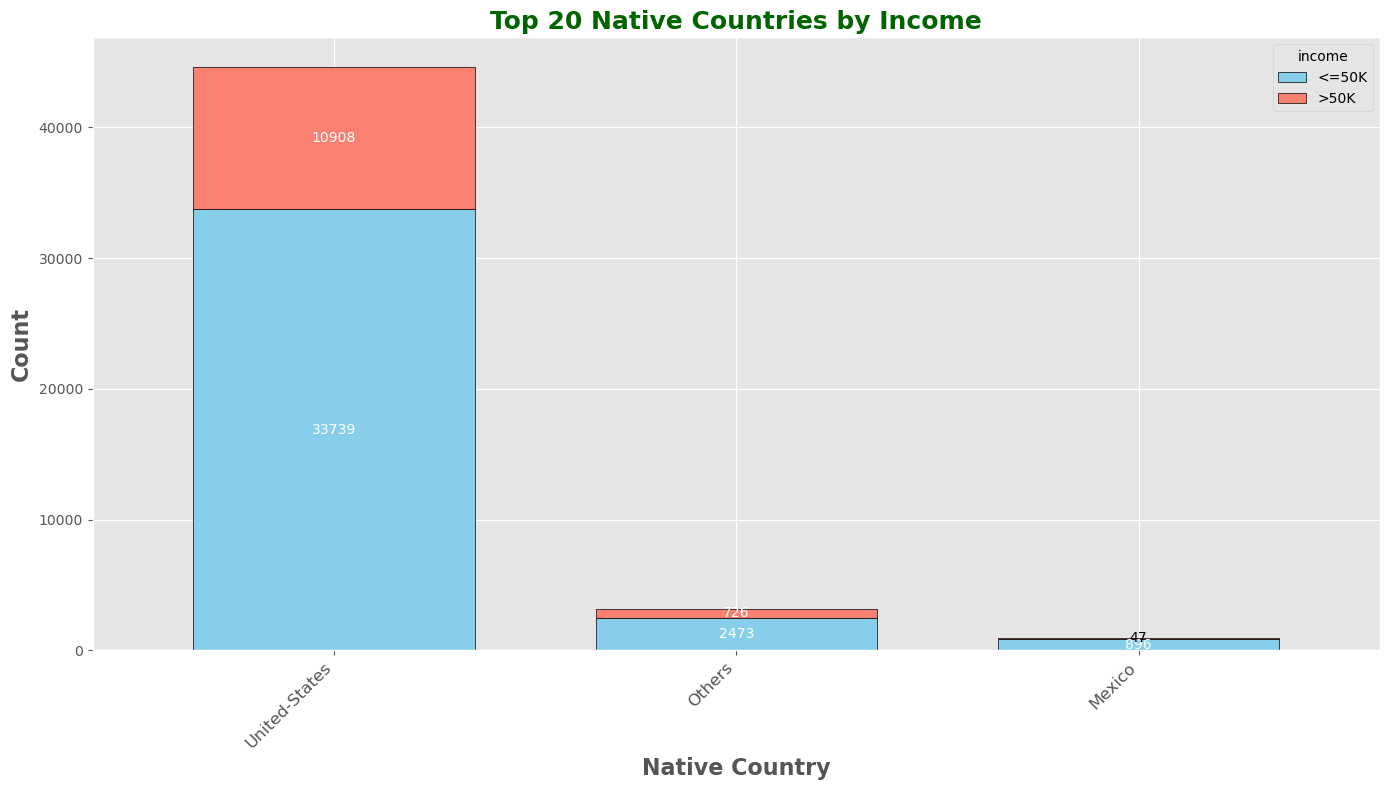

In [265]:
plot_native_country_by_income(data)

**`occupation`**

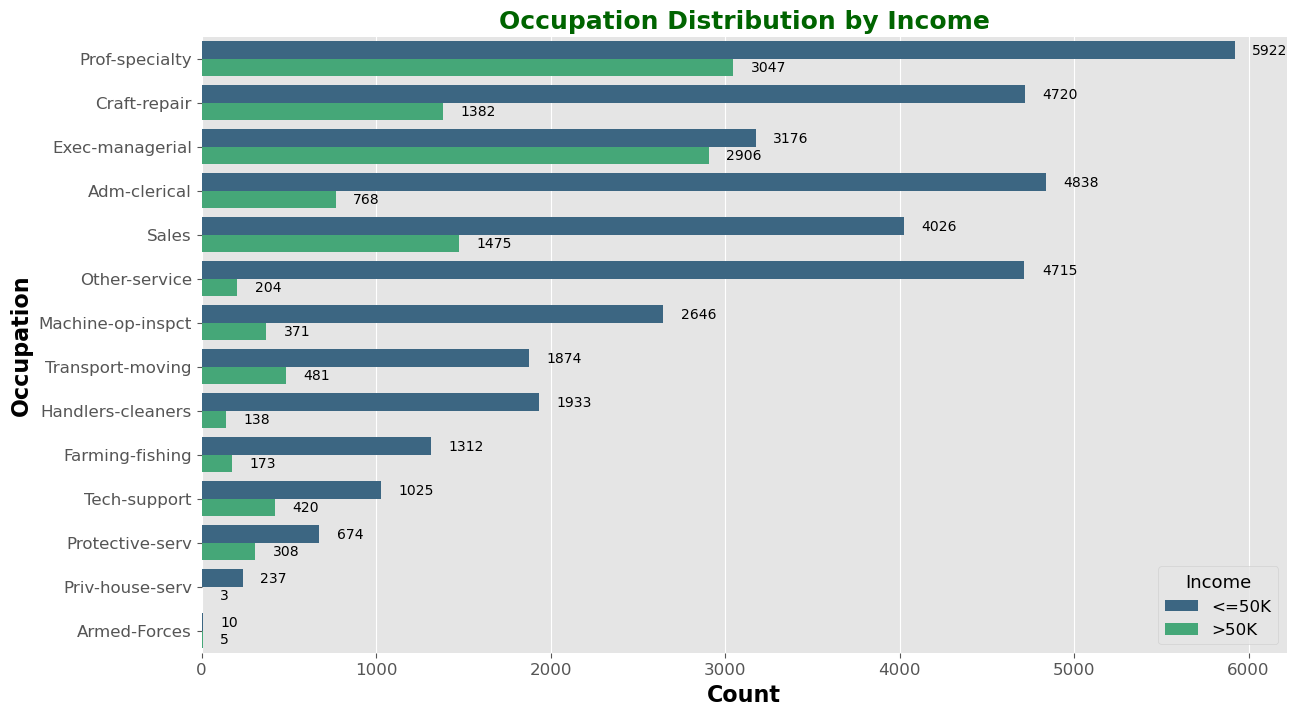

In [267]:
plot_occupation_by_income(data)

**Income and Occupation:** Higher-income levels are generally associated with professional and managerial roles, while service and manual labor roles tend to provide lower incomes. This reflects the typical economic hierarchy where jobs that require specialized skills, education, or leadership responsibilities often offer higher pay.

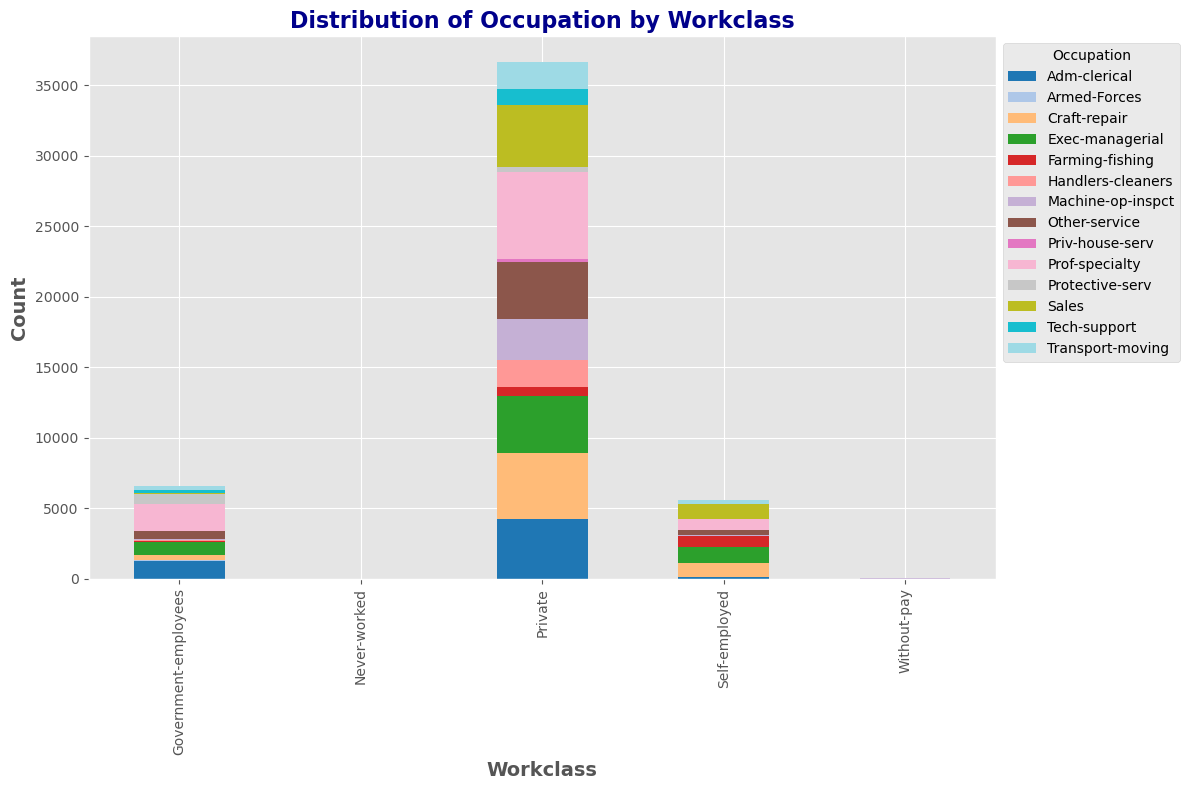

In [269]:
plot_workclass_vs_occupation(data)

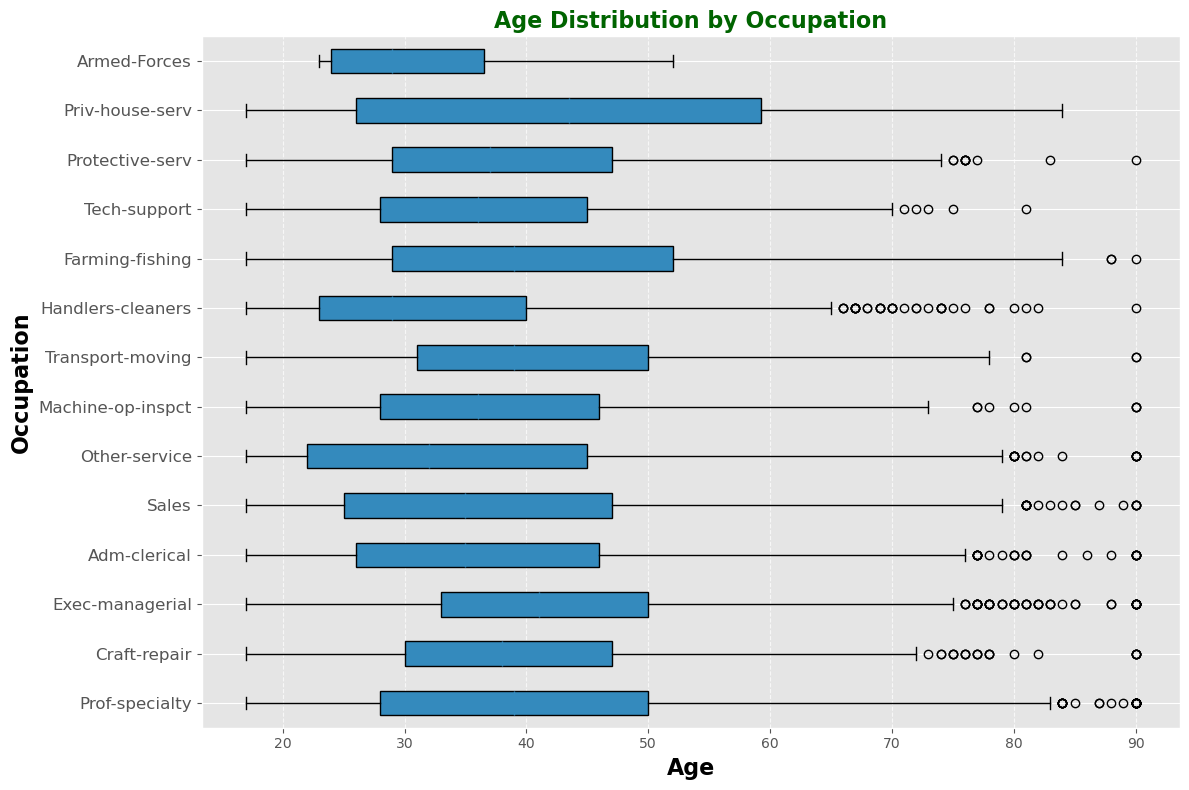

In [270]:
plot_occupation_vs_age(data)

**Age and Occupation:** Older individuals are more frequently found in roles with higher responsibilities, while younger individuals often hold entry-level or physically demanding positions. This is likely due to the experience and skills accumulated over time, allowing older workers to advance to roles with greater authority and decision-making power.

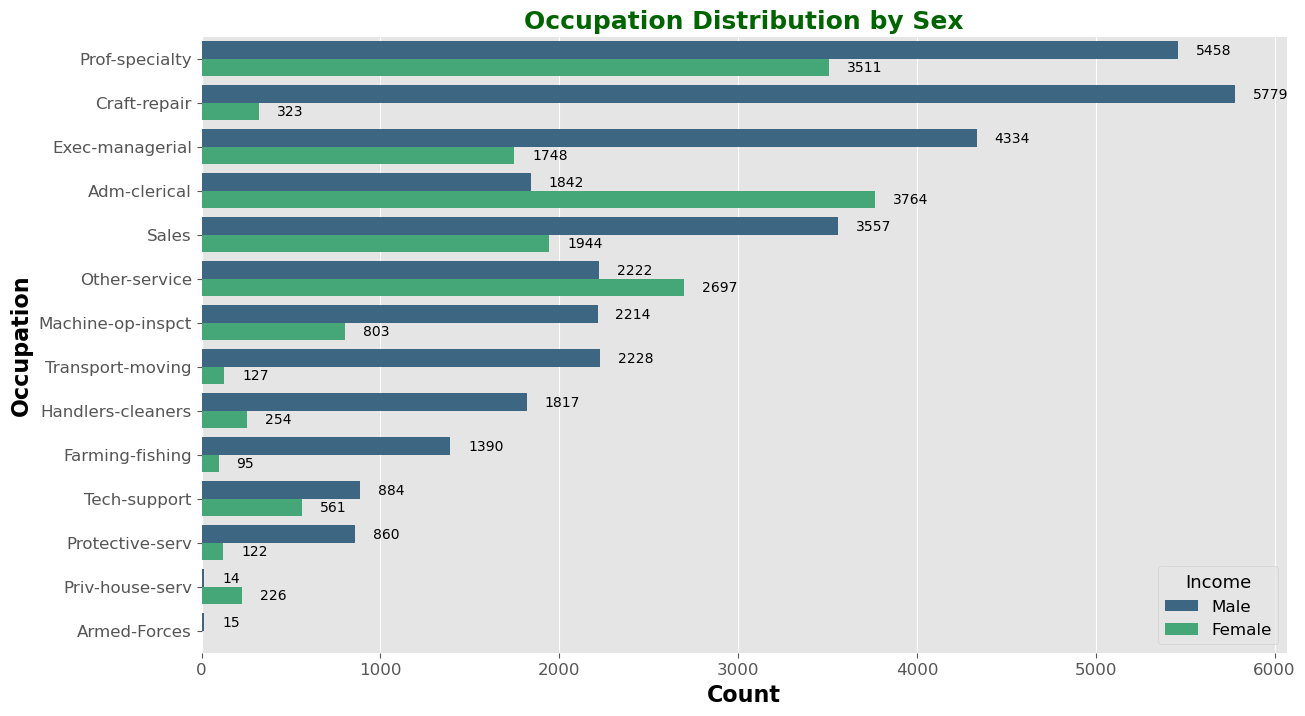

In [272]:
plot_occupation_by_sex(data)

**Gender and Occupation:** There are notable gender disparities across occupations. Men are more likely to be found in technical and managerial positions, while women are more prevalent in clerical and service roles. This division can be attributed to historical, cultural, and sometimes structural factors within the labor market, although efforts to address gender equality in the workplace are ongoing.

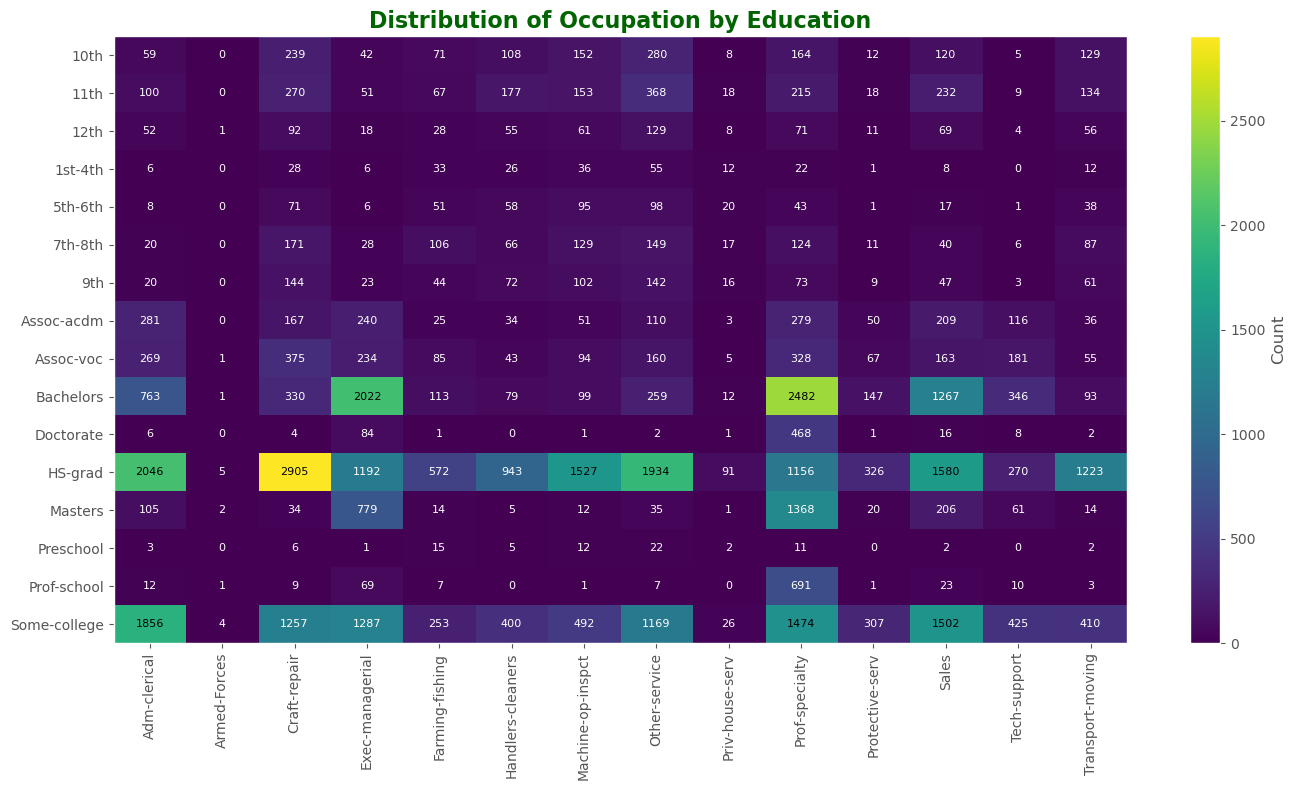

In [274]:
plot_education_vs_occupation(data)

**Education and Occupation:** Higher educational attainment is closely linked to higher-level occupations, as many professional and managerial roles require advanced knowledge and qualifications. In contrast, service and manual labor positions typically require lower levels of education, making them more accessible to individuals with limited formal education. This relationship underscores the importance of education in career progression and income potential.

* **Numeric Features**

In [277]:
data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48789.000000  4.878900e+04   48789.000000  48789.000000  48789.000000   
mean      38.653139  1.896697e+05      10.078809   1080.239829     87.597368   
std       13.708426  1.056182e+05       2.570072   7455.980728    403.213066   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175550e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781400e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376080e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48789.000000  
mean        40.425895  
std         12.392856  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [278]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [279]:
skew_feats = data[numerical_columns].skew().sort_values(ascending = False)
skewness= pd.DataFrame({'Skew': skew_feats})
skewness

Skew
capital-gain    11.888142
capital-loss     4.566984
fnlwgt           1.439669
age              0.556564
hours-per-week   0.239647
education-num   -0.314228

**`age`**

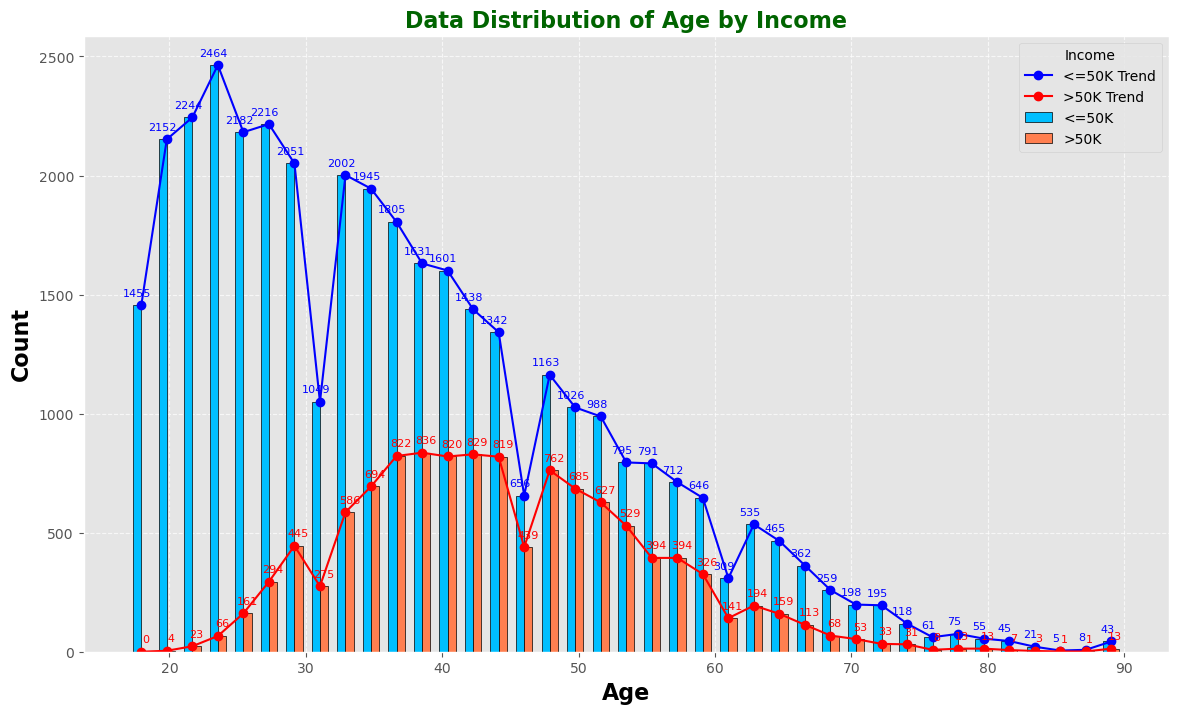

In [281]:
plot_age_distribution(data)

**Comments**
* **Age Distribution:** The `age` distribution is right-skewed, with most individuals clustered between $20$ and $50$ years old, gradually decreasing as age increases, which is a slight positive skew with a value of $0.556564$. Because the distribution of age is mildly skewed to the right but still fairly close to a normal distribution, we do not need to process the outliers.

**`fnlwgt`**

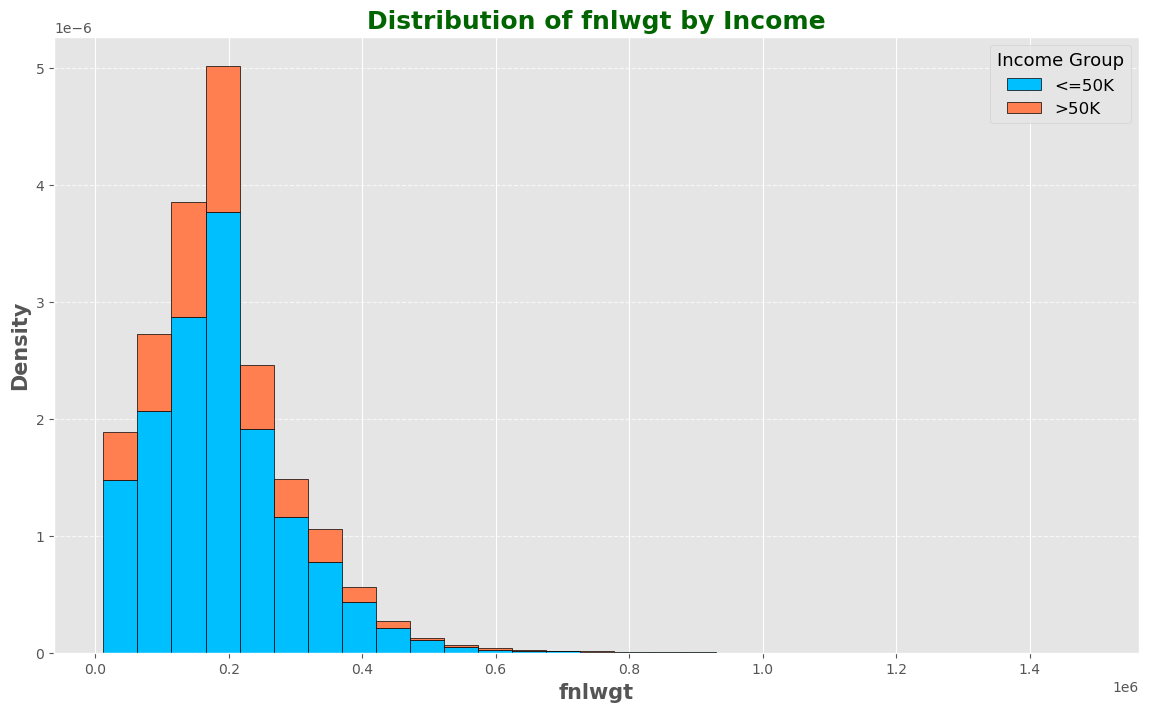

In [284]:
plot_fnlwgt_distribution(data)

**Comments**

The `fnlwgt` distribution has a positive skew of 1.439669, indicating that this feature is also right-skewed, though not as severely as `capital-gain` and `capital-loss`.

In [286]:
data['fnlwgt'] = np.log1p(data['fnlwgt'])

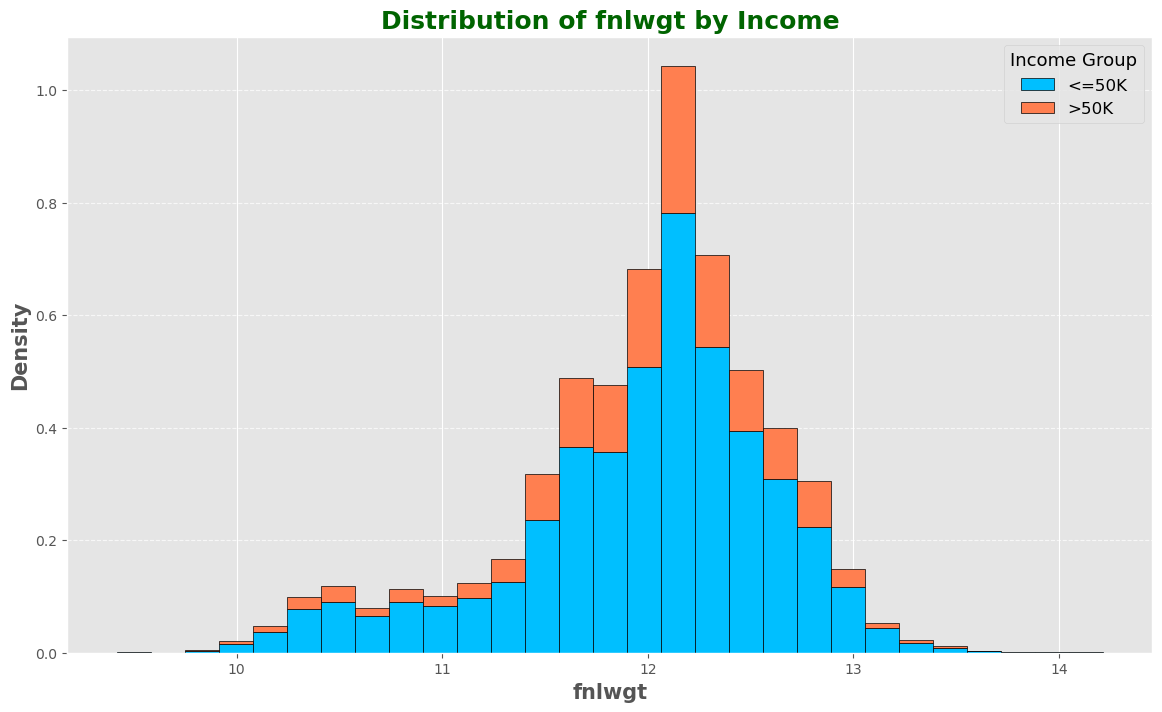

In [287]:
plot_fnlwgt_distribution(data)

**`capital-loss`**

In [289]:
value_counts_percentage(data, 'capital-loss')

capital-loss  counts  percentage
0              0   46507    0.953227
1           1902     304    0.006231
2           1977     253    0.005186
3           1887     233    0.004776
4           2415      72    0.001476
..           ...     ...         ...
94          2201       1    0.000020
95          1870       1    0.000020
96          1911       1    0.000020
97          2465       1    0.000020
98          1421       1    0.000020

[99 rows x 3 columns]

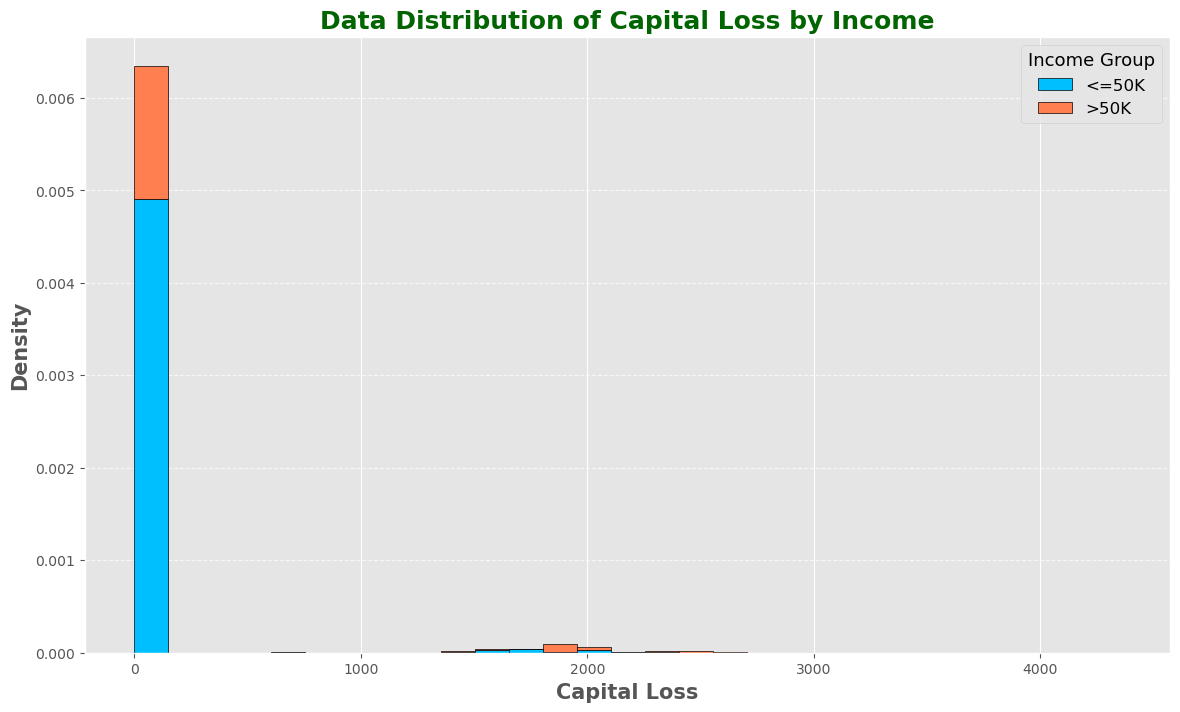

In [290]:
plot_capital_loss_distribution(data)

**Comments**
* `capital-loss`: Also has high positive skew ($4.566984$), indicating that this feature is right-skewed, with many low values and some high values.

**`capital-gain`**

In [293]:
value_counts_percentage(data, 'capital-gain')

capital-gain  counts  percentage
0               0   44754    0.917297
1           15024     513    0.010515
2            7688     410    0.008404
3            7298     364    0.007461
4           99999     244    0.005001
..            ...     ...         ...
118          1639       1    0.000020
119          2387       1    0.000020
120          7262       1    0.000020
121          1731       1    0.000020
122          6612       1    0.000020

[123 rows x 3 columns]

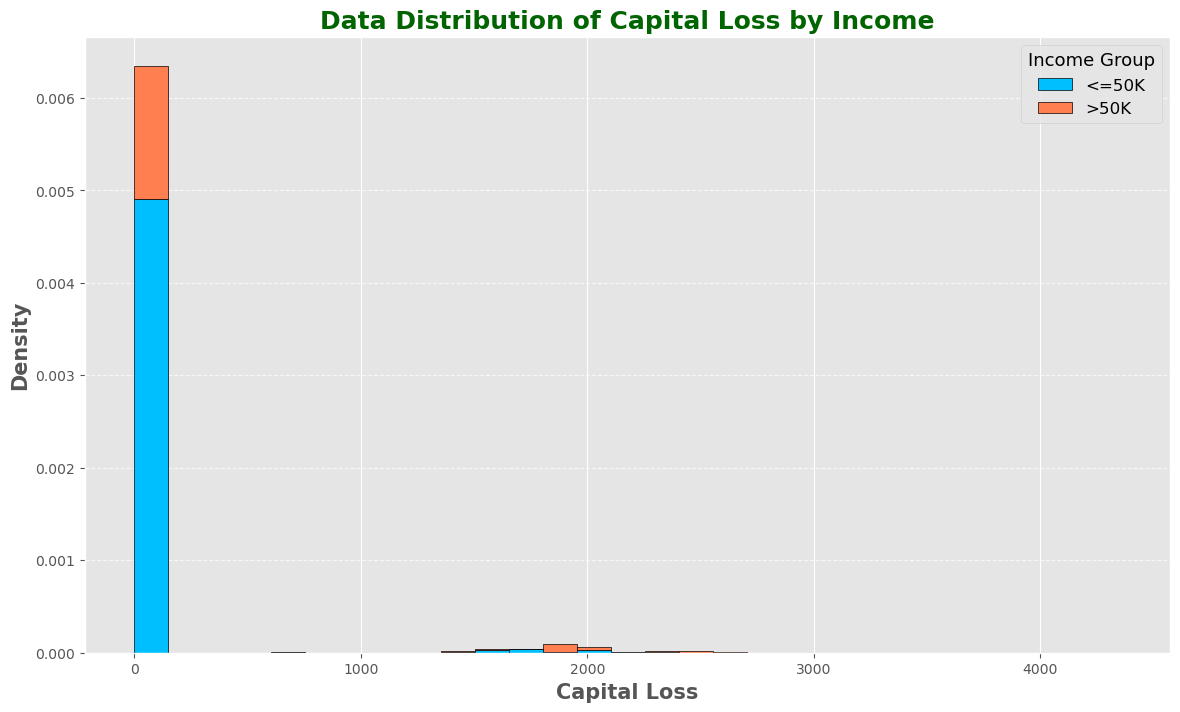

In [294]:
plot_capital_loss_distribution(data)

plot_capital_gain_distribution(data)

**Comments**
* `capital-gain`: Very high skewness, with a value of $11.888142$. This indicates that the distribution of this feature is heavily skewed to the right, with many low values and a few extremely high values. To adjust this distribution, you might consider applying a log or square root transformation to capital-gain.

**Solution**
* Creating a new feature called `capital_diff` by calculating the difference between `capital.loss` (profit from selling an asset) and `capital.gain` (loss from selling an asset).
* This difference is then classified as either 'Low' or 'High' based on specific ranges, converted to a categorical data type, and the original capital.gain and capital.loss columns are removed from the dataset.
* Differences falling between $-5000$ and $5000$ are labeled as 'Low', while those between $5000$ and $100000$ are labeled as 'High'.
* This transformation aims to simplify the dataset by merging information from `capital.gain` and `capital.loss` into a single categorical feature, categorizing the total profit/loss as either low or high.

**Note**
* `capital-gain`: The profit earned when an asset is sold for more than its purchase price.
* `capital-loss`: The loss incurred when an asset is sold for less than its purchase price.
* So, the difference between the two gives the net effect—whether it ended up with an overall profit or loss from the transactions.s.

In [299]:
data['capital-diff'] = data['capital-gain'] - data['capital-loss']
data['capital-diff'] = pd.cut(data['capital-diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
data['capital-diff'] = data['capital-diff'].astype('object')
data.drop(['capital-gain'], axis = 1, inplace = True)
data.drop(['capital-loss'], axis = 1, inplace = True)

In [300]:
value_counts_percentage(data, 'capital-diff')

capital-diff  counts  percentage
0          Low   46338    0.949763
1         High    2451    0.050237

In [301]:
def plot_capital_diff_by_income(data):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=data, x='capital-diff', hue='income', palette=['skyblue', 'salmon'], edgecolor='black', dodge=True)
    
    # Add title and labels
    plt.title("Distribution of Capital Diff by Income", fontsize=16, color='darkgreen', fontweight='bold')
    plt.xlabel("Capital Diff", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.ylabel("Count", fontdict={'fontsize': 16, 'color': 'black', 'fontweight': 'bold'})
    plt.legend(title="Income")
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black')
    plt.show()

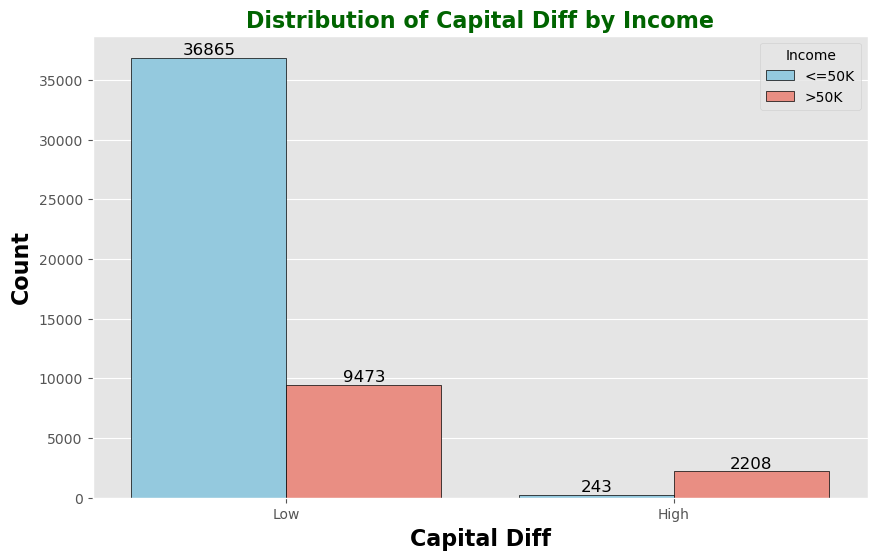

In [302]:
plot_capital_diff_by_income(data)

**`education-num`**

In [304]:
value_counts_percentage(data, 'education-num')

education-num  counts  percentage
0               9   15770    0.323229
1              10   10862    0.222632
2              13    8013    0.164238
3              14    2656    0.054439
4              11    2060    0.042223
5               7    1812    0.037140
6              12    1601    0.032815
7               6    1389    0.028470
8               4     954    0.019554
9              15     834    0.017094
10              5     756    0.015495
11              8     655    0.013425
12             16     594    0.012175
13              3     507    0.010392
14              2     245    0.005022
15              1      81    0.001660

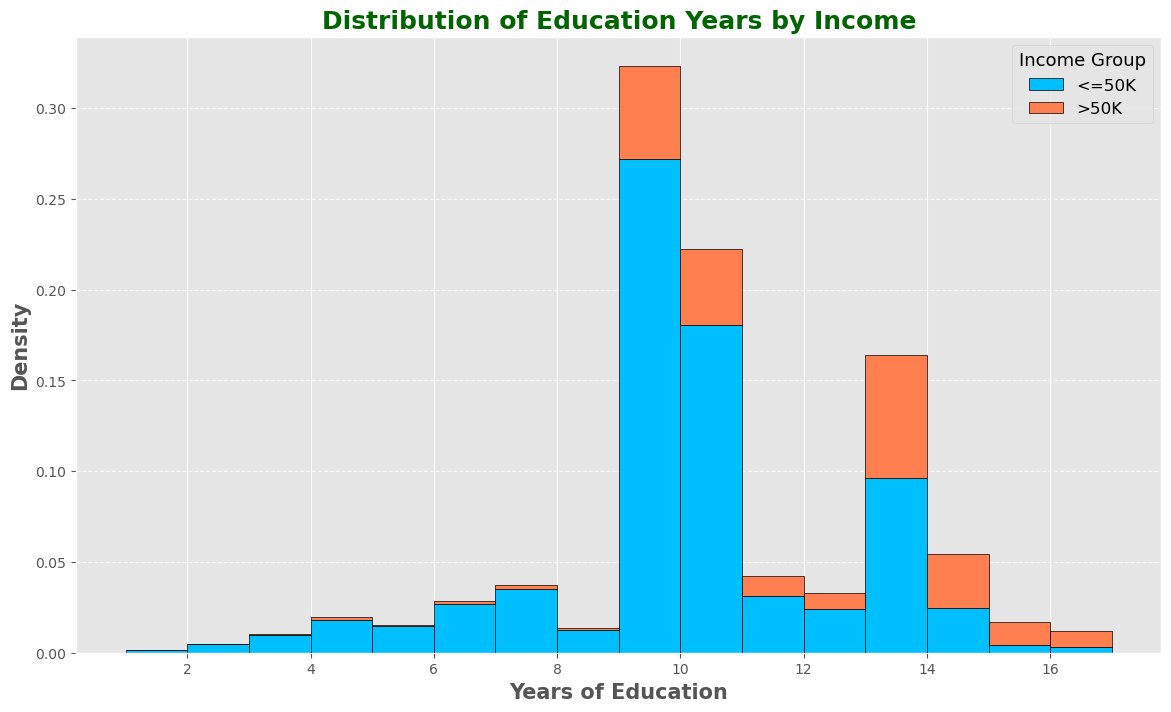

In [305]:
plot_education_num_distribution(data)

**Comments**
* `education-num`: Slight negative skew ($-0.314228$), indicating that this feature's distribution is slightly skewed to the left, though not significantly.

**`hours-per-week`**

In [308]:
value_counts_percentage(data, 'hours-per-week')

hours-per-week  counts  percentage
0               40   22772    0.466745
1               50    4242    0.086946
2               45    2715    0.055648
3               60    2177    0.044621
4               35    1934    0.039640
..             ...     ...         ...
91              87       1    0.000020
92              82       1    0.000020
93              94       1    0.000020
94              79       1    0.000020
95              69       1    0.000020

[96 rows x 3 columns]

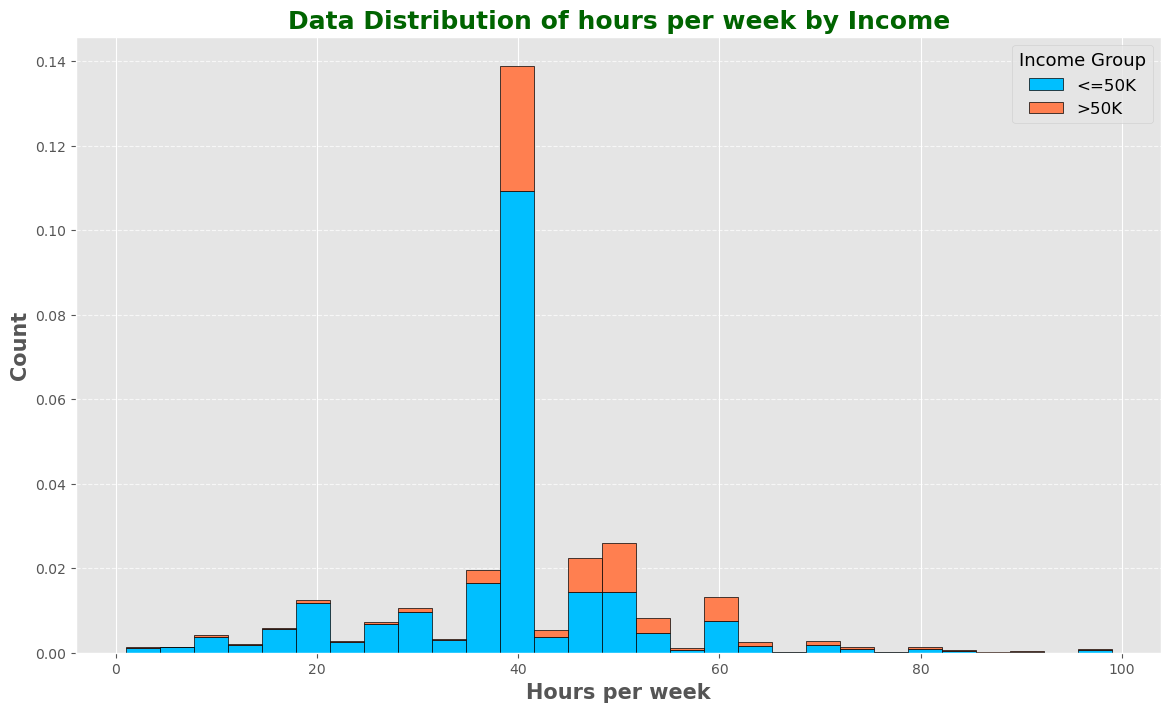

In [309]:
plot_hours_per_week_distribution(data)

In [310]:
# Total number of people who work more than 72h per week
len(data[data['hours-per-week'] > 72])

667

In [311]:
# Total number of people who work less than 18h per week
len(data[data['hours-per-week'] < 18])

2438

In [312]:
data = data[~((data['hours-per-week'] > 72) | (data['hours-per-week'] < 18))]

In [313]:
data.shape

(45684, 14)

**Comments**
* `hours-per-week`: Very low positive skew ($0.239647$), indicating that the distribution of this feature is close to normal, with minimal skew to either side.

In [315]:
new_categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
new_categorical_data = data.select_dtypes(include = ['object'])

In [316]:
new_categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income',
 'capital-diff']

In [317]:
new_categorical_data

workclass  education marital-status         occupation  \
0      Government-employees  Bachelors         Single       Adm-clerical   
2                   Private    HS-grad        Widowed  Handlers-cleaners   
3                   Private       11th        Married  Handlers-cleaners   
4                   Private  Bachelors        Married     Prof-specialty   
5                   Private    Masters        Married    Exec-managerial   
...                     ...        ...            ...                ...   
48837               Private  Bachelors        Widowed     Prof-specialty   
48838               Private    HS-grad        Widowed     Prof-specialty   
48839               Private  Bachelors        Married     Prof-specialty   
48840               Private  Bachelors        Widowed       Adm-clerical   
48841         Self-employed  Bachelors        Married    Exec-managerial   

         relationship    race     sex native-country income capital-diff  
0       Not-in-family   White    Male  United-States  <=50K          Low  
2       Not-in-family   White    Male  United-States  <=50K          Low  
3             Husband   Black    Male  United-States  <=50K          Low  
4                Wife   Black  Female         Others  <=50K          Low  
5                Wife   White  Female  United-States  <=50K          Low  
...               ...     ...     ...            ...    ...          ...  
48837   Not-in-family   White  Female  United-States  <=50K          Low  
48838  Other-relative   Black    Male  United-States  <=50K          Low  
48839         Husband   White    Male  United-States  <=50K          Low  
48840       Own-child  Others    Male  United-States  <=50K         High  
48841         Husband   White    Male  United-States   >50K          Low  

[45684 rows x 10 columns]

In [318]:
new_numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
new_numeric_data = data.select_dtypes(include = ['int64', 'float64'])

In [319]:
new_numeric_columns

['age', 'fnlwgt', 'education-num', 'hours-per-week']

In [320]:
new_numeric_data

age     fnlwgt  education-num  hours-per-week
0       39  11.258253             13              40
2       38  12.281398              9              40
3       53  12.366157              7              40
4       28  12.732013             13              40
5       37  12.558780             14              40
...    ...        ...            ...             ...
48837   39  12.280345             13              36
48838   64  12.680454              9              40
48839   38  12.834639             13              50
48840   44  11.337286             13              40
48841   35  12.112580             13              60

[45684 rows x 4 columns]

In [321]:
skew_feats = data[new_numeric_columns].skew().sort_values(ascending = False)
skewness= pd.DataFrame({'Skew': skew_feats})
skewness

Skew
age             0.521559
hours-per-week  0.259961
education-num  -0.325296
fnlwgt         -0.837067

## **5. Dimensionality Reduction** <a class = "anchor" id = "c35"></a>

<span style = "background-color: yellow">**Purpose:**</span> Complex data analysis can take a significant amount of time to execute on the complete dataset. Higher dimensions make data more sparse and create expotentially more subspace combinations, but these combinations often lacking meaning. Therefore, dimensionality reduction is important in data preprocessing that simplifies the dataset while retaining its most essential characteristics, allowing for more efficient modeling and visualization.

### **5.1. Feature Selection** <a class = "anchor" id = "c351"></a>

**<font color = red><ins>Question:</ins></font> <font color = blue>Which features (attributes) are the most informative in the data? Why? Which features should be kept in the dataset?</font>**

<b><font color = green><ins>Answer</ins></font></b>

In [327]:
data_unique = get_unique_values(data)
data_unique

Column Name  Number of Unique Values  \
0              age                       73   
1        workclass                        5   
2           fnlwgt                    26934   
3        education                       16   
4    education-num                       16   
5   marital-status                        4   
6       occupation                       14   
7     relationship                        6   
8             race                        3   
9              sex                        2   
10  hours-per-week                       54   
11  native-country                        3   
12          income                        2   
13    capital-diff                        2   

                                        Unique Values Data Types  
0                                                   -      int64  
1   [Government-employees, Private, Self-employed,...     object  
2                                                   -    float64  
3                                                   -     object  
4                                                   -      int64  
5               [Single, Widowed, Married, Separated]     object  
6                                                   -     object  
7   [Not-in-family, Husband, Wife, Own-child, Unma...     object  
8                              [White, Black, Others]     object  
9                                      [Male, Female]     object  
10                                                  -      int64  
11                    [United-States, Others, Mexico]     object  
12                                      [<=50K, >50K]     object  
13                                        [Low, High]     object

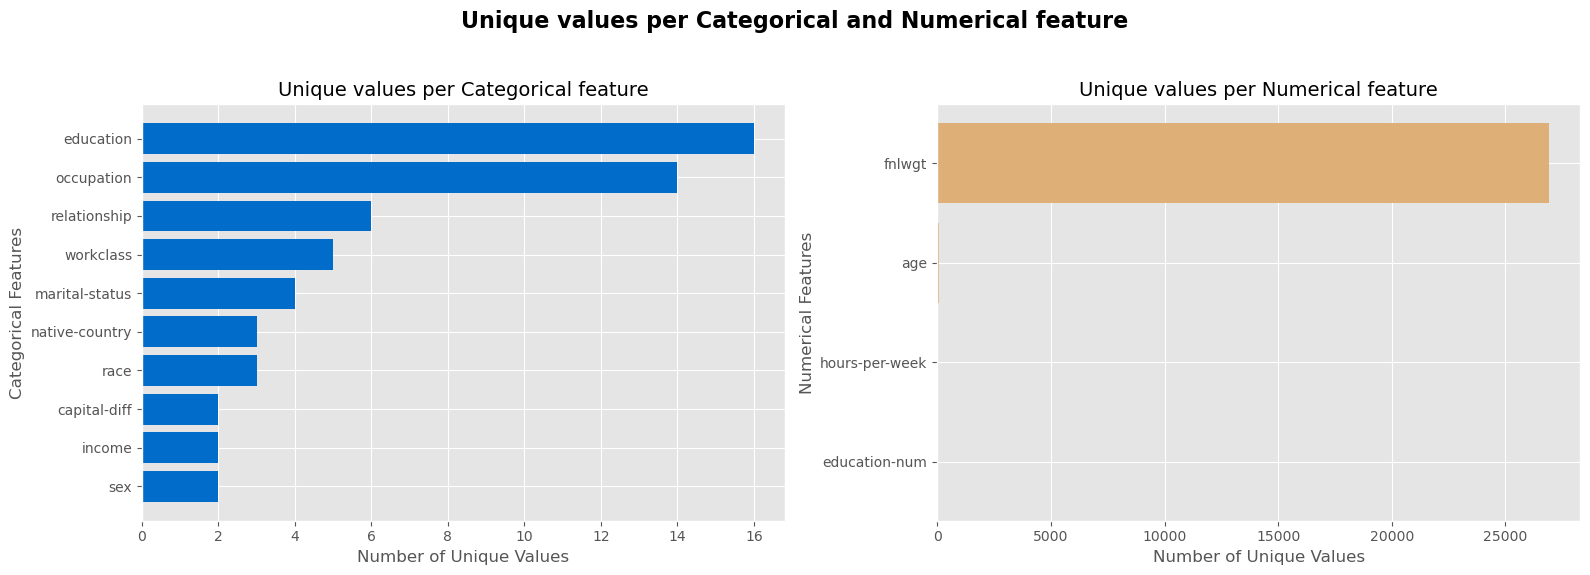

In [328]:
plot_unique_values(data)

In [329]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

In [330]:
new_numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
new_numeric_data = data.select_dtypes(include = ['int64', 'float64'])

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45684 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45684 non-null  int64  
 1   workclass       45684 non-null  object 
 2   fnlwgt          45684 non-null  float64
 3   education       45684 non-null  object 
 4   education-num   45684 non-null  int64  
 5   marital-status  45684 non-null  object 
 6   occupation      45684 non-null  object 
 7   relationship    45684 non-null  object 
 8   race            45684 non-null  object 
 9   sex             45684 non-null  object 
 10  hours-per-week  45684 non-null  int64  
 11  native-country  45684 non-null  object 
 12  income          45684 non-null  int64  
 13  capital-diff    45684 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 5.2+ MB


* **Are there any features that are redundant or highly correlated with others? If so, which methods (e.g., correlation thresholding, Variance Inflation Factor) will be used to eliminate these features?**

#### **Correlation Thresholding**

In [334]:
def correlation_matrix(X):
    X_normalized = (X - X.mean(axis = 0))/X.std(axis = 0)
    correlation_matrix = np.corrcoef(X_normalized, rowvar = False)
    return correlation_matrix

In [335]:
correlation_matrix = correlation_matrix(new_numeric_data)

In [336]:
correlation_matrix

array([[ 1.00000000e+00, -6.18938988e-02,  2.84474193e-02,
         1.10833087e-01,  2.42140068e-01],
       [-6.18938988e-02,  1.00000000e+00, -3.91996136e-02,
        -2.84294385e-02, -5.55787363e-04],
       [ 2.84474193e-02, -3.91996136e-02,  1.00000000e+00,
         1.59662824e-01,  3.34350561e-01],
       [ 1.10833087e-01, -2.84294385e-02,  1.59662824e-01,
         1.00000000e+00,  2.39897693e-01],
       [ 2.42140068e-01, -5.55787363e-04,  3.34350561e-01,
         2.39897693e-01,  1.00000000e+00]])

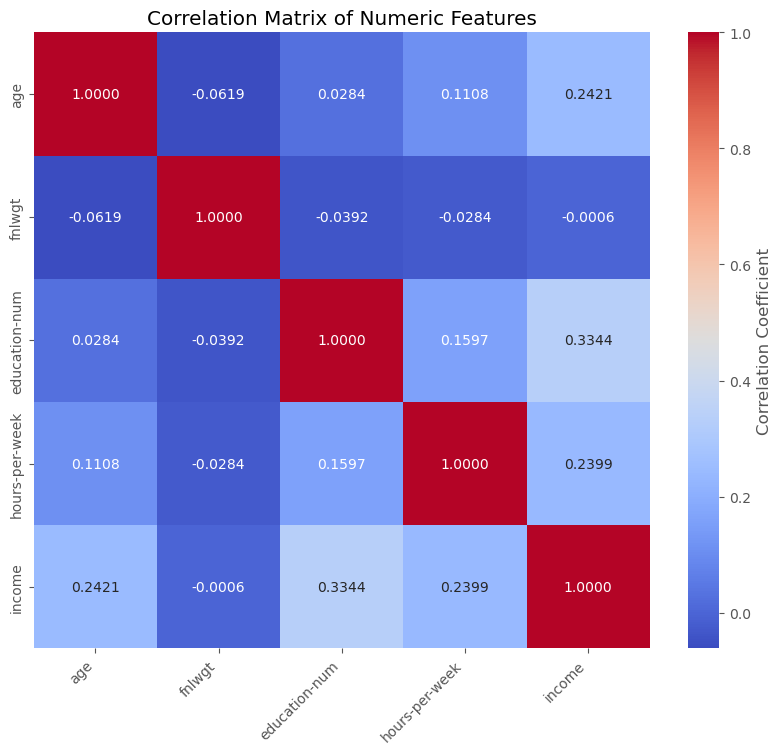

In [337]:
# Trực quan hóa ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".4f", linewidths=0, square=True, cbar_kws={'label': 'Correlation Coefficient'})

# Đặt tên các cột numeric cho trục x và y
plt.xticks(ticks=np.arange(len(new_numeric_columns)) + 0.5, labels=new_numeric_columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(new_numeric_columns)) + 0.5, labels=new_numeric_columns)

# Thêm tiêu đề
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [338]:
correlation_threshold = 0.8
to_remove = set()

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix[i, j]) > correlation_threshold:
            to_remove.add(new_numeric_columns[j])

In [339]:
print(to_remove)

set()


In [340]:
numeric_data_reduced = new_numeric_data.drop(columns=to_remove)

In [341]:
numeric_data_reduced

age     fnlwgt  education-num  hours-per-week  income
0       39  11.258253             13              40       0
2       38  12.281398              9              40       0
3       53  12.366157              7              40       0
4       28  12.732013             13              40       0
5       37  12.558780             14              40       0
...    ...        ...            ...             ...     ...
48837   39  12.280345             13              36       0
48838   64  12.680454              9              40       0
48839   38  12.834639             13              50       0
48840   44  11.337286             13              40       0
48841   35  12.112580             13              60       1

[45684 rows x 5 columns]

**Comments**

* The `income` feature has the strongest positive correlation with `education.num` (0.335), suggesting a moderate association between higher education levels and higher income.
* Other features, such as `age` and `hours-per-week`, also show a positive but weaker correlation with income.
* Overall, most features have low correlations with each other, indicating that multicollinearity is likely not a major issue in this dataset.

Overall, the heatmap suggests that while some features like education.num is relevant to predicting income, multicollinearity is not a major issue in this dataset, making it easier to build a robust predictive model.

#### **Encoding Categorical Features**

In [344]:
new_categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
new_categorical_data = data.select_dtypes(include = ['object'])

In [345]:
new_categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'capital-diff']

In [346]:
new_categorical_data

workclass  education marital-status         occupation  \
0      Government-employees  Bachelors         Single       Adm-clerical   
2                   Private    HS-grad        Widowed  Handlers-cleaners   
3                   Private       11th        Married  Handlers-cleaners   
4                   Private  Bachelors        Married     Prof-specialty   
5                   Private    Masters        Married    Exec-managerial   
...                     ...        ...            ...                ...   
48837               Private  Bachelors        Widowed     Prof-specialty   
48838               Private    HS-grad        Widowed     Prof-specialty   
48839               Private  Bachelors        Married     Prof-specialty   
48840               Private  Bachelors        Widowed       Adm-clerical   
48841         Self-employed  Bachelors        Married    Exec-managerial   

         relationship    race     sex native-country capital-diff  
0       Not-in-family   White    Male  United-States          Low  
2       Not-in-family   White    Male  United-States          Low  
3             Husband   Black    Male  United-States          Low  
4                Wife   Black  Female         Others          Low  
5                Wife   White  Female  United-States          Low  
...               ...     ...     ...            ...          ...  
48837   Not-in-family   White  Female  United-States          Low  
48838  Other-relative   Black    Male  United-States          Low  
48839         Husband   White    Male  United-States          Low  
48840       Own-child  Others    Male  United-States         High  
48841         Husband   White    Male  United-States          Low  

[45684 rows x 9 columns]

In [347]:
encoded_columns = []

* **Norminal Features**

In [349]:
nominal_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

In [350]:
for col in nominal_columns:
    unique_values = np.unique(data[col].values)
    one_hot_encoded = np.zeros((data.shape[0], len(unique_values)))
    for i, val in enumerate(unique_values):
        one_hot_encoded[:, i] = (data[col].values == val).astype(int)
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=[f"{col}-{val}" for val in unique_values])
    encoded_columns.append(one_hot_encoded_df)

* **Binary Features**

In [352]:
binary_columns = ['sex']

In [353]:
for col in binary_columns:
    binary_encoded = (data[col].values == data[col].unique()[1]).astype(int)
    binary_encoded_df = pd.DataFrame(binary_encoded, columns=[col])
    encoded_columns.append(binary_encoded_df)

* **Ordinal Features**

In [355]:
ordinal_columns = ['education', 'capital-diff']

In [356]:
ordinal_mappings = {
    'education': {
        'Preschool': 0, '1st-4th': 1, '5th-6th': 2, '7th-8th': 3, '9th': 4,
        '10th': 5, '11th': 6, '12th': 7, 'HS-grad': 8, 'Some-college': 9,
        'Assoc-acdm': 10, 'Assoc-voc': 11, 'Bachelors': 12, 'Masters': 13,
        'Doctorate': 14, 'Prof-school': 15
    },
    'capital-diff': {
        'Low': 0, 'High': 1
    }
}

In [357]:
for column in ordinal_columns:
    ordinal_encoded = np.array([ordinal_mappings[column][val] for val in data[column].values])
    ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=[column])
    encoded_columns.append(ordinal_encoded_df)

In [358]:
encoded_data = pd.concat(encoded_columns, axis=1)

In [359]:
encoded_data = encoded_data.loc[:,~encoded_data.columns.duplicated()]

In [360]:
encoded_data

workclass-Government-employees  workclass-Never-worked  \
0                                 1.0                     0.0   
1                                 0.0                     0.0   
2                                 0.0                     0.0   
3                                 0.0                     0.0   
4                                 0.0                     0.0   
...                               ...                     ...   
45679                             0.0                     0.0   
45680                             0.0                     0.0   
45681                             0.0                     0.0   
45682                             0.0                     0.0   
45683                             0.0                     0.0   

       workclass-Private  workclass-Self-employed  workclass-Without-pay  \
0                    0.0                      0.0                    0.0   
1                    1.0                      0.0                    0.0   
2                    1.0                      0.0                    0.0   
3                    1.0                      0.0                    0.0   
4                    1.0                      0.0                    0.0   
...                  ...                      ...                    ...   
45679                1.0                      0.0                    0.0   
45680                1.0                      0.0                    0.0   
45681                1.0                      0.0                    0.0   
45682                1.0                      0.0                    0.0   
45683                0.0                      1.0                    0.0   

       marital-status-Married  marital-status-Separated  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         1.0                       0.0   
3                         1.0                       0.0   
4                         1.0                       0.0   
...                       ...                       ...   
45679                     0.0                       0.0   
45680                     0.0                       0.0   
45681                     1.0                       0.0   
45682                     0.0                       0.0   
45683                     1.0                       0.0   

       marital-status-Single  marital-status-Widowed  occupation-Adm-clerical  \
0                        1.0                     0.0                      1.0   
1                        0.0                     1.0                      0.0   
2                        0.0                     0.0                      0.0   
3                        0.0                     0.0                      0.0   
4                        0.0                     0.0                      0.0   
...                      ...                     ...                      ...   
45679                    0.0                     1.0                      0.0   
45680                    0.0                     1.0                      0.0   
45681                    0.0                     0.0                      0.0   
45682                    0.0                     1.0                      1.0   
45683                    0.0                     0.0                      0.0   

       ...  relationship-Wife  race-Black  race-Others  race-White  \
0      ...                0.0         0.0          0.0         1.0   
1      ...                0.0         0.0          0.0         1.0   
2      ...                0.0         1.0          0.0         0.0   
3      ...                1.0         1.0          0.0         0.0   
4      ...                1.0         0.0          0.0         1.0   
...    ...                ...         ...          ...         ...   
45679  ...                0.0         0.0          0.0         1.0   
45680  ...                0.0         1.0          0.0         0.0   
4

In [361]:
numeric_data_reduced = numeric_data_reduced.reset_index(drop=True)
encoded_data = encoded_data.reset_index(drop=True)
final_data = pd.concat([numeric_data_reduced, encoded_data], axis=1)

In [362]:
final_data

age     fnlwgt  education-num  hours-per-week  income  \
0       39  11.258253             13              40       0   
1       38  12.281398              9              40       0   
2       53  12.366157              7              40       0   
3       28  12.732013             13              40       0   
4       37  12.558780             14              40       0   
...    ...        ...            ...             ...     ...   
45679   39  12.280345             13              36       0   
45680   64  12.680454              9              40       0   
45681   38  12.834639             13              50       0   
45682   44  11.337286             13              40       0   
45683   35  12.112580             13              60       1   

       workclass-Government-employees  workclass-Never-worked  \
0                                 1.0                     0.0   
1                                 0.0                     0.0   
2                                 0.0                     0.0   
3                                 0.0                     0.0   
4                                 0.0                     0.0   
...                               ...                     ...   
45679                             0.0                     0.0   
45680                             0.0                     0.0   
45681                             0.0                     0.0   
45682                             0.0                     0.0   
45683                             0.0                     0.0   

       workclass-Private  workclass-Self-employed  workclass-Without-pay  ...  \
0                    0.0                      0.0                    0.0  ...   
1                    1.0                      0.0                    0.0  ...   
2                    1.0                      0.0                    0.0  ...   
3                    1.0                      0.0                    0.0  ...   
4                    1.0                      0.0                    0.0  ...   
...                  ...                      ...                    ...  ...   
45679                1.0                      0.0                    0.0  ...   
45680                1.0                      0.0                    0.0  ...   
45681                1.0                      0.0                    0.0  ...   
45682                1.0                      0.0                    0.0  ...   
45683                0.0                      1.0                    0.0  ...   

       relationship-Wife  race-Black  race-Others  race-White  \
0                    0.0         0.0          0.0         1.0   
1                    0.0         0.0          0.0         1.0   
2                    0.0         1.0          0.0         0.0   
3                    1.0         1.0          0.0         0.0   
4                    1.0         0.0          0.0         1.0   
...                  ...         ...          ...         ...   
45679                0.0         0.0          0.0         1.0   
45680                0.0         1.0          0.0         0.0   
45681                0.0         0.0          0.0         1.0   
45682                0.0         0.0          1.0         0.0   
45683                0.0         0.0          0.0         1.0   

       native-country-Mexico  native-country-Others  \
0                        0.0                    0.0   
1                        0.0                    0.0   
2                        0.0                    0.0   
3                        0.0                    1.0   
4                        0.0                    0.0   
...                      ...                    ...   
45679                    0.0                    0.0   
45680                    0.0                    0.0   
45681                    0.0                    0.0   
45682                    0.0                    0.0   
45683                    0.0                    0.0   

       native-country-United-States  sex  

#### **VIF (Variance Inflation Factor) - Multicolinearity**

In [364]:
def calculate_vif(X):
    vif = np.zeros(X.shape[1])
    for i in range(X.shape[1]):
        X_i = X.iloc[:, i].values
        X_other = X.drop(X.columns[i], axis = 1).values

        beta = np.linalg.pinv(X_other.T @ X_other) @ X_other.T @ X_i
        y_pred = X_other @ beta
        ss_res = np.sum((X_i - y_pred) ** 2)
        ss_tot = np.sum((X_i - np.mean(X_i)) ** 2)
        r_squared = 1 - (ss_res / ss_tot)

        if r_squared == 1:
            vif[i] = np.inf  # Đặt VIF vô cùng nếu có đa cộng tuyến hoàn hảo
        else:
            vif[i] = 1 / (1 - r_squared)
    
    return vif

In [365]:
vif_threshold = 10

# Set a loop to iteratively calculate VIF and remove features with high VIF values
while True:
    # Calculate VIF values for each feature in the DataFrame `final_data`
    vif_values = calculate_vif(final_data)
    
    # Find the maximum VIF value from the calculated VIF values
    max_vif = vif_values.max()
    
    # Check if the maximum VIF value is below the threshold
    if max_vif < vif_threshold:
        # If no VIF value exceeds the threshold, exit the loop as multicollinearity is sufficiently low
        break
    else:
        # If any VIF value exceeds the threshold, identify the feature with the highest VIF
        max_vif_index = np.argmax(vif_values)  # Get the index of the feature with the highest VIF
        removed_feature = final_data.columns[max_vif_index]  # Get the name of this feature
        
        # Remove the feature with the highest VIF from the DataFrame
        final_data = final_data.drop(removed_feature, axis=1)
        
        # Print a message indicating which feature was removed and its VIF value
        print(f"Remove Feature '{removed_feature}' with VIF {max_vif}")

# Print the final shape of the DataFrame after removing high VIF features
print("Final data shape after removing multicollinear features:", final_data.shape)


Remove Feature 'workclass-Government-employees' with VIF inf
Remove Feature 'marital-status-Married' with VIF inf
Remove Feature 'occupation-Adm-clerical' with VIF inf
Remove Feature 'relationship-Husband' with VIF inf
Remove Feature 'race-Black' with VIF inf
Remove Feature 'education-num' with VIF 63.8333292756105
Remove Feature 'native-country-United-States' with VIF 39.18347181991493
Remove Feature 'marital-status-Single' with VIF 32.039530081092074
Final data shape after removing multicollinear features: (45684, 35)


In [366]:
final_data

age     fnlwgt  hours-per-week  income  workclass-Never-worked  \
0       39  11.258253              40       0                     0.0   
1       38  12.281398              40       0                     0.0   
2       53  12.366157              40       0                     0.0   
3       28  12.732013              40       0                     0.0   
4       37  12.558780              40       0                     0.0   
...    ...        ...             ...     ...                     ...   
45679   39  12.280345              36       0                     0.0   
45680   64  12.680454              40       0                     0.0   
45681   38  12.834639              50       0                     0.0   
45682   44  11.337286              40       0                     0.0   
45683   35  12.112580              60       1                     0.0   

       workclass-Private  workclass-Self-employed  workclass-Without-pay  \
0                    0.0                      0.0                    0.0   
1                    1.0                      0.0                    0.0   
2                    1.0                      0.0                    0.0   
3                    1.0                      0.0                    0.0   
4                    1.0                      0.0                    0.0   
...                  ...                      ...                    ...   
45679                1.0                      0.0                    0.0   
45680                1.0                      0.0                    0.0   
45681                1.0                      0.0                    0.0   
45682                1.0                      0.0                    0.0   
45683                0.0                      1.0                    0.0   

       marital-status-Separated  marital-status-Widowed  ...  \
0                           0.0                     0.0  ...   
1                           0.0                     1.0  ...   
2                           0.0                     0.0  ...   
3                           0.0                     0.0  ...   
4                           0.0                     0.0  ...   
...                         ...                     ...  ...   
45679                       0.0                     1.0  ...   
45680                       0.0                     1.0  ...   
45681                       0.0                     0.0  ...   
45682                       0.0                     1.0  ...   
45683                       0.0                     0.0  ...   

       relationship-Own-child  relationship-Unmarried  relationship-Wife  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                1.0   
4                         0.0                     0.0                1.0   
...                       ...                     ...                ...   
45679                     0.0                     0.0                0.0   
45680                     0.0                     0.0                0.0   
45681                     0.0                     0.0                0.0   
45682                     1.0                     0.0                0.0   
45683                     0.0                     0.0                0.0   

       race-Others  race-White  native-country-Mexico  native-country-Others  \
0              0.0         1.0                    0.0                    0.0   
1              0.0         1.0                    0.0                    0.0   
2              0.0         0.0                    0.0                    0.0   
3              0.0         0.0                    0.0                    1.0   
4              0.0         1.0                    0.0                    0.0   
...            ...         ...                    ...  

The features `workclass-Government-employees`, `marital-status-Married`, `occupation-Adm-clerical`, `relationship-Husband`, and `race-Black` had **VIF** values of infinity, indicating perfect multicollinearity. This could mean that these features are linearly dependent on other features or encoded values. This may have occurred because of high dependency within the encoded categories, where one category’s presence can perfectly predict another.

Features like `education-num`, `native-country-United-States`, and `marital-status-Single` had extremely high **VIF** values, indicating strong multicollinearity with other features in the dataset. Such high **VIF** values suggest that these features are redundant and add similar information to the model as other features.

After removing these features, the dataset now has 35 features, suggesting a significant reduction of multicollinearity while retaining a large portion of the original information.

* **How many features should be retained to ensure minimal information loss?**

After filtering out features with high **VIF** values, we retained $35$ features in the dataset.

This reduced dataset should still provide sufficient information, as features with high multicollinearity (which likely added minimal unique information) were removed. Retaining these $35$ features allows the dataset to maintain a balance between retaining information and minimizing redundancy.

---

## **6. Data Normalization** <a class = "anchor" id = "c36"></a>

<span style = "background-color: yellow"><b>Purpose:</b></span> Data normalization is a critical step in data preprocessing, where the values of features are scaled to a common range. This ensures that no single feature disproportionately influences the analysis

### **6.1. Need for Normalization** <a class = "anchor" id = "c361"></a>

**<font color = red><ins>Question:</ins></font> <font color = blue>Does the data contain features with different scales?</font>**

<b><font color = green><ins>Answer</ins></font></b>

In [377]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45684 entries, 0 to 45683
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           45684 non-null  int64  
 1   fnlwgt                        45684 non-null  float64
 2   hours-per-week                45684 non-null  int64  
 3   income                        45684 non-null  int64  
 4   workclass-Never-worked        45684 non-null  float64
 5   workclass-Private             45684 non-null  float64
 6   workclass-Self-employed       45684 non-null  float64
 7   workclass-Without-pay         45684 non-null  float64
 8   marital-status-Separated      45684 non-null  float64
 9   marital-status-Widowed        45684 non-null  float64
 10  occupation-Armed-Forces       45684 non-null  float64
 11  occupation-Craft-repair       45684 non-null  float64
 12  occupation-Exec-managerial    45684 non-null  float64
 13  o

In [378]:
final_data.describe()

age        fnlwgt  hours-per-week        income  \
count  45684.000000  45684.000000    45684.000000  45684.000000   
mean      38.577839     11.987494       41.331538      0.246717   
std       13.159046      0.628057        9.303085      0.431105   
min       17.000000      9.416216       18.000000      0.000000   
25%       28.000000     11.676769       40.000000      0.000000   
50%       37.000000     12.094224       40.000000      0.000000   
75%       47.000000     12.379884       45.000000      0.000000   
max       90.000000     14.214556       72.000000      1.000000   

       workclass-Never-worked  workclass-Private  workclass-Self-employed  \
count            45684.000000       45684.000000             45684.000000   
mean                 0.000175           0.752846                 0.110345   
std                  0.013232           0.431362                 0.313323   
min                  0.000000           0.000000                 0.000000   
25%                  0.000000           1.000000                 0.000000   
50%                  0.000000           1.000000                 0.000000   
75%                  0.000000           1.000000                 0.000000   
max                  1.000000           1.000000                 1.000000   

       workclass-Without-pay  marital-status-Separated  \
count           45684.000000              45684.000000   
mean                0.000372                  0.045114   
std                 0.019287                  0.207557   
min                 0.000000                  0.000000   
25%                 0.000000                  0.000000   
50%                 0.000000                  0.000000   
75%                 0.000000                  0.000000   
max                 1.000000                  1.000000   

       marital-status-Widowed  ...  relationship-Own-child  \
count            45684.000000  ...            45684.000000   
mean                 0.167104  ...                0.143311   
std                  0.373073  ...                0.350393   
min                  0.000000  ...                0.000000   
25%                  0.000000  ...                0.000000   
50%                  0.000000  ...                0.000000   
75%                  0.000000  ...                0.000000   
max                  1.000000  ...                1.000000   

       relationship-Unmarried  relationship-Wife   race-Others    race-White  \
count            45684.000000       45684.000000  45684.000000  45684.000000   
mean                 0.107193           0.046581      0.049295      0.852924   
std                  0.309362           0.210742      0.216486      0.354185   
min                  0.000000           0.000000      0.000000      0.000000   
25%                  0.000000           0.000000      0.000000      1.000000   
50%                  0.000000           0.000000      0.000000      1.000000   
75%                  0.000000           0.000000      0.000000      1.000000   
max                  1.000000           1.000000      1.000000      1.000000   

       native-country-Mexico  native-country-Others           sex  \
count           45684.000000           45684.000000  45684.000000   
mean                0.019854               0.066084      0.322936   
std                 0.139499               0.248432      0.467604   
min                 0.000000               0.000000      0.000000   
25%                 0.000000               0.000000      0.000000   
50%                 0.000000               0.000000      0.000000   
75%                 0.000000               0.000000      1.000000   
max                 1.000000               1.000000      1.000000   

          education  capital-diff  
count  45684.000000  45684.000000  
mean       9.128119      0.051703  
std        2.572075      0.221429  
min        0.000000      0.000000  
25%        8.000000      0.000000  
50%        9.000000      0.000000  
75%       12.000000      0.000000  
max  

Yes, the dataset contains features with different scales.
* `age`: min = 17 and max = 90 so range is [17, 90]
* `fnlwgt`: min = 9.4 and max = 14.2 so range is [9.4, 14.2]
* `hours-per-week`: min = 18 and max = 72 so range is [18, 72]
*  `education`: min = 0 and max = 15 so range is [0, 15]
*  remaining columns are one hot encoded columns so they have the range from 0 to 1.

### **6.2. Normalization Techniques** <a class = "anchor" id = "c362"></a>

**<font color=red><ins>Question:</ins></font> <font color = blue>Which normalization techniques should be applied? Why?</font>**

<b><font color = green><ins>Answer</ins></font></b>

In [383]:
print("Original Data:\n")
final_data

Original Data:



age     fnlwgt  hours-per-week  income  workclass-Never-worked  \
0       39  11.258253              40       0                     0.0   
1       38  12.281398              40       0                     0.0   
2       53  12.366157              40       0                     0.0   
3       28  12.732013              40       0                     0.0   
4       37  12.558780              40       0                     0.0   
...    ...        ...             ...     ...                     ...   
45679   39  12.280345              36       0                     0.0   
45680   64  12.680454              40       0                     0.0   
45681   38  12.834639              50       0                     0.0   
45682   44  11.337286              40       0                     0.0   
45683   35  12.112580              60       1                     0.0   

       workclass-Private  workclass-Self-employed  workclass-Without-pay  \
0                    0.0                      0.0                    0.0   
1                    1.0                      0.0                    0.0   
2                    1.0                      0.0                    0.0   
3                    1.0                      0.0                    0.0   
4                    1.0                      0.0                    0.0   
...                  ...                      ...                    ...   
45679                1.0                      0.0                    0.0   
45680                1.0                      0.0                    0.0   
45681                1.0                      0.0                    0.0   
45682                1.0                      0.0                    0.0   
45683                0.0                      1.0                    0.0   

       marital-status-Separated  marital-status-Widowed  ...  \
0                           0.0                     0.0  ...   
1                           0.0                     1.0  ...   
2                           0.0                     0.0  ...   
3                           0.0                     0.0  ...   
4                           0.0                     0.0  ...   
...                         ...                     ...  ...   
45679                       0.0                     1.0  ...   
45680                       0.0                     1.0  ...   
45681                       0.0                     0.0  ...   
45682                       0.0                     1.0  ...   
45683                       0.0                     0.0  ...   

       relationship-Own-child  relationship-Unmarried  relationship-Wife  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                1.0   
4                         0.0                     0.0                1.0   
...                       ...                     ...                ...   
45679                     0.0                     0.0                0.0   
45680                     0.0                     0.0                0.0   
45681                     0.0                     0.0                0.0   
45682                     1.0                     0.0                0.0   
45683                     0.0                     0.0                0.0   

       race-Others  race-White  native-country-Mexico  native-country-Others  \
0              0.0         1.0                    0.0                    0.0   
1              0.0         1.0                    0.0                    0.0   
2              0.0         0.0                    0.0                    0.0   
3              0.0         0.0                    0.0                    1.0   
4              0.0         1.0                    0.0                    0.0   
...            ...         ...                    ...  

In [384]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45684 entries, 0 to 45683
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           45684 non-null  int64  
 1   fnlwgt                        45684 non-null  float64
 2   hours-per-week                45684 non-null  int64  
 3   income                        45684 non-null  int64  
 4   workclass-Never-worked        45684 non-null  float64
 5   workclass-Private             45684 non-null  float64
 6   workclass-Self-employed       45684 non-null  float64
 7   workclass-Without-pay         45684 non-null  float64
 8   marital-status-Separated      45684 non-null  float64
 9   marital-status-Widowed        45684 non-null  float64
 10  occupation-Armed-Forces       45684 non-null  float64
 11  occupation-Craft-repair       45684 non-null  float64
 12  occupation-Exec-managerial    45684 non-null  float64
 13  o

In [385]:
final_data.describe()

age        fnlwgt  hours-per-week        income  \
count  45684.000000  45684.000000    45684.000000  45684.000000   
mean      38.577839     11.987494       41.331538      0.246717   
std       13.159046      0.628057        9.303085      0.431105   
min       17.000000      9.416216       18.000000      0.000000   
25%       28.000000     11.676769       40.000000      0.000000   
50%       37.000000     12.094224       40.000000      0.000000   
75%       47.000000     12.379884       45.000000      0.000000   
max       90.000000     14.214556       72.000000      1.000000   

       workclass-Never-worked  workclass-Private  workclass-Self-employed  \
count            45684.000000       45684.000000             45684.000000   
mean                 0.000175           0.752846                 0.110345   
std                  0.013232           0.431362                 0.313323   
min                  0.000000           0.000000                 0.000000   
25%                  0.000000           1.000000                 0.000000   
50%                  0.000000           1.000000                 0.000000   
75%                  0.000000           1.000000                 0.000000   
max                  1.000000           1.000000                 1.000000   

       workclass-Without-pay  marital-status-Separated  \
count           45684.000000              45684.000000   
mean                0.000372                  0.045114   
std                 0.019287                  0.207557   
min                 0.000000                  0.000000   
25%                 0.000000                  0.000000   
50%                 0.000000                  0.000000   
75%                 0.000000                  0.000000   
max                 1.000000                  1.000000   

       marital-status-Widowed  ...  relationship-Own-child  \
count            45684.000000  ...            45684.000000   
mean                 0.167104  ...                0.143311   
std                  0.373073  ...                0.350393   
min                  0.000000  ...                0.000000   
25%                  0.000000  ...                0.000000   
50%                  0.000000  ...                0.000000   
75%                  0.000000  ...                0.000000   
max                  1.000000  ...                1.000000   

       relationship-Unmarried  relationship-Wife   race-Others    race-White  \
count            45684.000000       45684.000000  45684.000000  45684.000000   
mean                 0.107193           0.046581      0.049295      0.852924   
std                  0.309362           0.210742      0.216486      0.354185   
min                  0.000000           0.000000      0.000000      0.000000   
25%                  0.000000           0.000000      0.000000      1.000000   
50%                  0.000000           0.000000      0.000000      1.000000   
75%                  0.000000           0.000000      0.000000      1.000000   
max                  1.000000           1.000000      1.000000      1.000000   

       native-country-Mexico  native-country-Others           sex  \
count           45684.000000           45684.000000  45684.000000   
mean                0.019854               0.066084      0.322936   
std                 0.139499               0.248432      0.467604   
min                 0.000000               0.000000      0.000000   
25%                 0.000000               0.000000      0.000000   
50%                 0.000000               0.000000      0.000000   
75%                 0.000000               0.000000      1.000000   
max                 1.000000               1.000000      1.000000   

          education  capital-diff  
count  45684.000000  45684.000000  
mean       9.128119      0.051703  
std        2.572075      0.221429  
min        0.000000      0.000000  
25%        8.000000      0.000000  
50%        9.000000      0.000000  
75%       12.000000      0.000000  
max  

In [386]:
data = final_data.copy()
data

age     fnlwgt  hours-per-week  income  workclass-Never-worked  \
0       39  11.258253              40       0                     0.0   
1       38  12.281398              40       0                     0.0   
2       53  12.366157              40       0                     0.0   
3       28  12.732013              40       0                     0.0   
4       37  12.558780              40       0                     0.0   
...    ...        ...             ...     ...                     ...   
45679   39  12.280345              36       0                     0.0   
45680   64  12.680454              40       0                     0.0   
45681   38  12.834639              50       0                     0.0   
45682   44  11.337286              40       0                     0.0   
45683   35  12.112580              60       1                     0.0   

       workclass-Private  workclass-Self-employed  workclass-Without-pay  \
0                    0.0                      0.0                    0.0   
1                    1.0                      0.0                    0.0   
2                    1.0                      0.0                    0.0   
3                    1.0                      0.0                    0.0   
4                    1.0                      0.0                    0.0   
...                  ...                      ...                    ...   
45679                1.0                      0.0                    0.0   
45680                1.0                      0.0                    0.0   
45681                1.0                      0.0                    0.0   
45682                1.0                      0.0                    0.0   
45683                0.0                      1.0                    0.0   

       marital-status-Separated  marital-status-Widowed  ...  \
0                           0.0                     0.0  ...   
1                           0.0                     1.0  ...   
2                           0.0                     0.0  ...   
3                           0.0                     0.0  ...   
4                           0.0                     0.0  ...   
...                         ...                     ...  ...   
45679                       0.0                     1.0  ...   
45680                       0.0                     1.0  ...   
45681                       0.0                     0.0  ...   
45682                       0.0                     1.0  ...   
45683                       0.0                     0.0  ...   

       relationship-Own-child  relationship-Unmarried  relationship-Wife  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                1.0   
4                         0.0                     0.0                1.0   
...                       ...                     ...                ...   
45679                     0.0                     0.0                0.0   
45680                     0.0                     0.0                0.0   
45681                     0.0                     0.0                0.0   
45682                     1.0                     0.0                0.0   
45683                     0.0                     0.0                0.0   

       race-Others  race-White  native-country-Mexico  native-country-Others  \
0              0.0         1.0                    0.0                    0.0   
1              0.0         1.0                    0.0                    0.0   
2              0.0         0.0                    0.0                    0.0   
3              0.0         0.0                    0.0                    1.0   
4              0.0         1.0                    0.0                    0.0   
...            ...         ...                    ...  

* **Min-Max Scaling**
$$X_{\text{scaled}} = (\displaystyle \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}) \times (X_{\text{max new}} - X_{\text{min new}}) + X_{\text{min new}}$$


**Applicable objects** 
* Variables with a wide range, distinct maximum and minimum values, or situations where we need to scale data to a fixed range (e.g., from $0$ to $1$).

**Pros**
* Scales values to a specific range, typically from $0$ to $1$.
* Preserves the original distribution of the data without changing its shape, making it suitable when data falls within a defined range and has no large outliers.

**Cons**
* Sensitive to outliers. When there are extremely large or small values, other values may get compressed, reducing the distinction between average values.

**min_max_scaler function**

In [390]:
def min_max_scaler(data, columns, feature_range = (0, 1)):
    min_val, max_val = feature_range
    data_scaled = data.copy()
    for col in columns:
        col_min = data[col].min()
        col_max = data[col].max()
        col_range = col_max - col_min
        col_centered = data[col] - col_min
        col_normalized = col_centered / col_range
        col_scaled = col_normalized * (max_val - min_val) + min_val
        data_scaled[col] = col_scaled
    return data_scaled

Why do we choose the way to normalize `hours-per-week`, and `education` by min max scaling ?
* `hours-per-week`
    * This features ranges from $18$ to $72$, with values distributed relatively evenly and without many outliers.
    * The values fall within a defined range, making it suitable for relative comparisons.
    * If there are outliers, `min_max_scaler()` might reduce the distinguishing information between average values; however, this impact is minimal for this column since it has few outliers.
* `education`
    * The mean value is $9.13$, with a standard deviation of $2.57$, indicating that most values are centred around the mean (around $9$). The minimum is $0$ and the maximum is $15$, with the quartiles showing that the main distribution range for education is from $8$ $(25\%)$ to $12$ $(75\%)$. While there may be a few low or high values, the data doesn’t fluctuate drastically, and most values are close to the mean, indicating few significant outliers.
    * The values mainly fall within a narrow range, with few outliers. `min-max-scaler` will bring values to a fixed range $(0-1)$, making it easier to compare with other features in the data.
    * This method preserves the rank order and aligns the scale with other features, which is advantageous for machine learning algorithms that benefit from uniform feature scaling.

In [392]:
data = min_max_scaler(data, ['hours-per-week', 'education'])

In [393]:
data

age     fnlwgt  hours-per-week  income  workclass-Never-worked  \
0       39  11.258253        0.407407       0                     0.0   
1       38  12.281398        0.407407       0                     0.0   
2       53  12.366157        0.407407       0                     0.0   
3       28  12.732013        0.407407       0                     0.0   
4       37  12.558780        0.407407       0                     0.0   
...    ...        ...             ...     ...                     ...   
45679   39  12.280345        0.333333       0                     0.0   
45680   64  12.680454        0.407407       0                     0.0   
45681   38  12.834639        0.592593       0                     0.0   
45682   44  11.337286        0.407407       0                     0.0   
45683   35  12.112580        0.777778       1                     0.0   

       workclass-Private  workclass-Self-employed  workclass-Without-pay  \
0                    0.0                      0.0                    0.0   
1                    1.0                      0.0                    0.0   
2                    1.0                      0.0                    0.0   
3                    1.0                      0.0                    0.0   
4                    1.0                      0.0                    0.0   
...                  ...                      ...                    ...   
45679                1.0                      0.0                    0.0   
45680                1.0                      0.0                    0.0   
45681                1.0                      0.0                    0.0   
45682                1.0                      0.0                    0.0   
45683                0.0                      1.0                    0.0   

       marital-status-Separated  marital-status-Widowed  ...  \
0                           0.0                     0.0  ...   
1                           0.0                     1.0  ...   
2                           0.0                     0.0  ...   
3                           0.0                     0.0  ...   
4                           0.0                     0.0  ...   
...                         ...                     ...  ...   
45679                       0.0                     1.0  ...   
45680                       0.0                     1.0  ...   
45681                       0.0                     0.0  ...   
45682                       0.0                     1.0  ...   
45683                       0.0                     0.0  ...   

       relationship-Own-child  relationship-Unmarried  relationship-Wife  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                1.0   
4                         0.0                     0.0                1.0   
...                       ...                     ...                ...   
45679                     0.0                     0.0                0.0   
45680                     0.0                     0.0                0.0   
45681                     0.0                     0.0                0.0   
45682                     1.0                     0.0                0.0   
45683                     0.0                     0.0                0.0   

       race-Others  race-White  native-country-Mexico  native-country-Others  \
0              0.0         1.0                    0.0                    0.0   
1              0.0         1.0                    0.0                    0.0   
2              0.0         0.0                    0.0                    0.0   
3              0.0         0.0                    0.0                    1.0   
4              0.0         1.0                    0.0                    0.0   
...            ...         ...                    ...  

In [394]:
data.describe()

age        fnlwgt  hours-per-week        income  \
count  45684.000000  45684.000000    45684.000000  45684.000000   
mean      38.577839     11.987494        0.432066      0.246717   
std       13.159046      0.628057        0.172279      0.431105   
min       17.000000      9.416216        0.000000      0.000000   
25%       28.000000     11.676769        0.407407      0.000000   
50%       37.000000     12.094224        0.407407      0.000000   
75%       47.000000     12.379884        0.500000      0.000000   
max       90.000000     14.214556        1.000000      1.000000   

       workclass-Never-worked  workclass-Private  workclass-Self-employed  \
count            45684.000000       45684.000000             45684.000000   
mean                 0.000175           0.752846                 0.110345   
std                  0.013232           0.431362                 0.313323   
min                  0.000000           0.000000                 0.000000   
25%                  0.000000           1.000000                 0.000000   
50%                  0.000000           1.000000                 0.000000   
75%                  0.000000           1.000000                 0.000000   
max                  1.000000           1.000000                 1.000000   

       workclass-Without-pay  marital-status-Separated  \
count           45684.000000              45684.000000   
mean                0.000372                  0.045114   
std                 0.019287                  0.207557   
min                 0.000000                  0.000000   
25%                 0.000000                  0.000000   
50%                 0.000000                  0.000000   
75%                 0.000000                  0.000000   
max                 1.000000                  1.000000   

       marital-status-Widowed  ...  relationship-Own-child  \
count            45684.000000  ...            45684.000000   
mean                 0.167104  ...                0.143311   
std                  0.373073  ...                0.350393   
min                  0.000000  ...                0.000000   
25%                  0.000000  ...                0.000000   
50%                  0.000000  ...                0.000000   
75%                  0.000000  ...                0.000000   
max                  1.000000  ...                1.000000   

       relationship-Unmarried  relationship-Wife   race-Others    race-White  \
count            45684.000000       45684.000000  45684.000000  45684.000000   
mean                 0.107193           0.046581      0.049295      0.852924   
std                  0.309362           0.210742      0.216486      0.354185   
min                  0.000000           0.000000      0.000000      0.000000   
25%                  0.000000           0.000000      0.000000      1.000000   
50%                  0.000000           0.000000      0.000000      1.000000   
75%                  0.000000           0.000000      0.000000      1.000000   
max                  1.000000           1.000000      1.000000      1.000000   

       native-country-Mexico  native-country-Others           sex  \
count           45684.000000           45684.000000  45684.000000   
mean                0.019854               0.066084      0.322936   
std                 0.139499               0.248432      0.467604   
min                 0.000000               0.000000      0.000000   
25%                 0.000000               0.000000      0.000000   
50%                 0.000000               0.000000      0.000000   
75%                 0.000000               0.000000      1.000000   
max                 1.000000               1.000000      1.000000   

          education  capital-diff  
count  45684.000000  45684.000000  
mean       0.608541      0.051703  
std        0.171472      0.221429  
min        0.000000      0.000000  
25%        0.533333      0.000000  
50%        0.600000      0.000000  
75%        0.800000      0.000000  
max  

In [395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45684 entries, 0 to 45683
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           45684 non-null  int64  
 1   fnlwgt                        45684 non-null  float64
 2   hours-per-week                45684 non-null  float64
 3   income                        45684 non-null  int64  
 4   workclass-Never-worked        45684 non-null  float64
 5   workclass-Private             45684 non-null  float64
 6   workclass-Self-employed       45684 non-null  float64
 7   workclass-Without-pay         45684 non-null  float64
 8   marital-status-Separated      45684 non-null  float64
 9   marital-status-Widowed        45684 non-null  float64
 10  occupation-Armed-Forces       45684 non-null  float64
 11  occupation-Craft-repair       45684 non-null  float64
 12  occupation-Exec-managerial    45684 non-null  float64
 13  o

**Comments**

* **Decimal Scaling**
$$X_{\text{scaled}} = \frac{X}{10^j}$$

**Applicable objects**
* Variables with large values but without a wide distribution (e.g., salary values or variables with many digits).

**Pros**
* Simple and effective in scaling down the data.
* Retains the relative distances between values without altering the distribution.

**Cons**
* Does not normalize data to a fixed range (like 0-1), which can make it difficult to compare with other variables.
* More suitable when there are very large values without excessive fluctuations in the data.

**decimal_scaler function**

In [400]:
def decimal_scaler(data, columns):
    data_scaled = data.copy()
    for col in columns:
        j = int(np.ceil(np.log10(np.max(np.abs(data[col])))))
        data_scaled[col] = data[col] / (10 ** j)
    return data_scaled

Why do we choose the way to normalize `fnlwgt` by decimal scaling ?
* The `fnlwgt` column contains very large values, with a generally increasing trend, and does not fall within a fixed range.
* Since it represents final frequency weights, it may contain several outlier values. 
* `decimal_scaler` will effectively reduce the magnitude of very large values without significantly altering the relative distances between them.
*  It does not bring values to a fixed range like $0-1$. However, this is suitable for `fnlwgt`, as it only requires a reduction in scale, not absolute normalization.

In [402]:
data = decimal_scaler(data, ['fnlwgt'])

In [403]:
data

age    fnlwgt  hours-per-week  income  workclass-Never-worked  \
0       39  0.112583        0.407407       0                     0.0   
1       38  0.122814        0.407407       0                     0.0   
2       53  0.123662        0.407407       0                     0.0   
3       28  0.127320        0.407407       0                     0.0   
4       37  0.125588        0.407407       0                     0.0   
...    ...       ...             ...     ...                     ...   
45679   39  0.122803        0.333333       0                     0.0   
45680   64  0.126805        0.407407       0                     0.0   
45681   38  0.128346        0.592593       0                     0.0   
45682   44  0.113373        0.407407       0                     0.0   
45683   35  0.121126        0.777778       1                     0.0   

       workclass-Private  workclass-Self-employed  workclass-Without-pay  \
0                    0.0                      0.0                    0.0   
1                    1.0                      0.0                    0.0   
2                    1.0                      0.0                    0.0   
3                    1.0                      0.0                    0.0   
4                    1.0                      0.0                    0.0   
...                  ...                      ...                    ...   
45679                1.0                      0.0                    0.0   
45680                1.0                      0.0                    0.0   
45681                1.0                      0.0                    0.0   
45682                1.0                      0.0                    0.0   
45683                0.0                      1.0                    0.0   

       marital-status-Separated  marital-status-Widowed  ...  \
0                           0.0                     0.0  ...   
1                           0.0                     1.0  ...   
2                           0.0                     0.0  ...   
3                           0.0                     0.0  ...   
4                           0.0                     0.0  ...   
...                         ...                     ...  ...   
45679                       0.0                     1.0  ...   
45680                       0.0                     1.0  ...   
45681                       0.0                     0.0  ...   
45682                       0.0                     1.0  ...   
45683                       0.0                     0.0  ...   

       relationship-Own-child  relationship-Unmarried  relationship-Wife  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                1.0   
4                         0.0                     0.0                1.0   
...                       ...                     ...                ...   
45679                     0.0                     0.0                0.0   
45680                     0.0                     0.0                0.0   
45681                     0.0                     0.0                0.0   
45682                     1.0                     0.0                0.0   
45683                     0.0                     0.0                0.0   

       race-Others  race-White  native-country-Mexico  native-country-Others  \
0              0.0         1.0                    0.0                    0.0   
1              0.0         1.0                    0.0                    0.0   
2              0.0         0.0                    0.0                    0.0   
3              0.0         0.0                    0.0                    1.0   
4              0.0         1.0                    0.0                    0.0   
...            ...         ...                    ...              

In [404]:
data.describe()

age        fnlwgt  hours-per-week        income  \
count  45684.000000  45684.000000    45684.000000  45684.000000   
mean      38.577839      0.119875        0.432066      0.246717   
std       13.159046      0.006281        0.172279      0.431105   
min       17.000000      0.094162        0.000000      0.000000   
25%       28.000000      0.116768        0.407407      0.000000   
50%       37.000000      0.120942        0.407407      0.000000   
75%       47.000000      0.123799        0.500000      0.000000   
max       90.000000      0.142146        1.000000      1.000000   

       workclass-Never-worked  workclass-Private  workclass-Self-employed  \
count            45684.000000       45684.000000             45684.000000   
mean                 0.000175           0.752846                 0.110345   
std                  0.013232           0.431362                 0.313323   
min                  0.000000           0.000000                 0.000000   
25%                  0.000000           1.000000                 0.000000   
50%                  0.000000           1.000000                 0.000000   
75%                  0.000000           1.000000                 0.000000   
max                  1.000000           1.000000                 1.000000   

       workclass-Without-pay  marital-status-Separated  \
count           45684.000000              45684.000000   
mean                0.000372                  0.045114   
std                 0.019287                  0.207557   
min                 0.000000                  0.000000   
25%                 0.000000                  0.000000   
50%                 0.000000                  0.000000   
75%                 0.000000                  0.000000   
max                 1.000000                  1.000000   

       marital-status-Widowed  ...  relationship-Own-child  \
count            45684.000000  ...            45684.000000   
mean                 0.167104  ...                0.143311   
std                  0.373073  ...                0.350393   
min                  0.000000  ...                0.000000   
25%                  0.000000  ...                0.000000   
50%                  0.000000  ...                0.000000   
75%                  0.000000  ...                0.000000   
max                  1.000000  ...                1.000000   

       relationship-Unmarried  relationship-Wife   race-Others    race-White  \
count            45684.000000       45684.000000  45684.000000  45684.000000   
mean                 0.107193           0.046581      0.049295      0.852924   
std                  0.309362           0.210742      0.216486      0.354185   
min                  0.000000           0.000000      0.000000      0.000000   
25%                  0.000000           0.000000      0.000000      1.000000   
50%                  0.000000           0.000000      0.000000      1.000000   
75%                  0.000000           0.000000      0.000000      1.000000   
max                  1.000000           1.000000      1.000000      1.000000   

       native-country-Mexico  native-country-Others           sex  \
count           45684.000000           45684.000000  45684.000000   
mean                0.019854               0.066084      0.322936   
std                 0.139499               0.248432      0.467604   
min                 0.000000               0.000000      0.000000   
25%                 0.000000               0.000000      0.000000   
50%                 0.000000               0.000000      0.000000   
75%                 0.000000               0.000000      1.000000   
max                 1.000000               1.000000      1.000000   

          education  capital-diff  
count  45684.000000  45684.000000  
mean       0.608541      0.051703  
std        0.171472      0.221429  
min        0.000000      0.000000  
25%        0.533333      0.000000  
50%        0.600000      0.000000  
75%        0.800000      0.000000  
max  

In [405]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45684 entries, 0 to 45683
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           45684 non-null  int64  
 1   fnlwgt                        45684 non-null  float64
 2   hours-per-week                45684 non-null  float64
 3   income                        45684 non-null  int64  
 4   workclass-Never-worked        45684 non-null  float64
 5   workclass-Private             45684 non-null  float64
 6   workclass-Self-employed       45684 non-null  float64
 7   workclass-Without-pay         45684 non-null  float64
 8   marital-status-Separated      45684 non-null  float64
 9   marital-status-Widowed        45684 non-null  float64
 10  occupation-Armed-Forces       45684 non-null  float64
 11  occupation-Craft-repair       45684 non-null  float64
 12  occupation-Exec-managerial    45684 non-null  float64
 13  o

* **Z-score Standardization**
  $$X_{\text{normalized}} = \displaystyle \frac{X - \mu}{\sigma}$$

**Applicable objects**
*  Variables that follow a normal distribution or are approximately normal, typically used when standardizing data to have a mean of 0 and a standard deviation of 1.

**Pros**
* Transforms data into a standardized form with a mean of 0 and a standard deviation of 1.
* Suitable for variables that follow or are close to a normal distribution, often used in statistical analysis tasks.

**Cons**
* Sensitive to outliers, as they can affect the mean and standard deviation

**z_score_standardization function**

In [409]:
def z_score_standardization(data, columns):
    data_scaled = data.copy()
    for col in columns:
        col_mean = np.mean(data[col])
        col_std = np.std(data[col])
        data_scaled[col] = (data[col] - col_mean) / col_std
    return data_scaled

Why do we choose the way to normalize `age` by z_score standardization ?
* Age is a continuous variable with a relatively normal distribution and few outliers.
* The values range from $17$ to $90$, which makes comparisons between ages meaningful.
* This variable follows an approximately normal distribution and is important for analysis, so standardizing it to have a mean of 0 and a standard deviation of 1 helps machine learning algorithms perform better.
* This method is sensitive to outliers. But, since the age column has few outliers, this is not a significant concern.

In [411]:
data = z_score_standardization(data, ['age'])

In [412]:
data

age    fnlwgt  hours-per-week  income  workclass-Never-worked  \
0      0.032082  0.112583        0.407407       0                     0.0   
1     -0.043912  0.122814        0.407407       0                     0.0   
2      1.096000  0.123662        0.407407       0                     0.0   
3     -0.803854  0.127320        0.407407       0                     0.0   
4     -0.119907  0.125588        0.407407       0                     0.0   
...         ...       ...             ...     ...                     ...   
45679  0.032082  0.122803        0.333333       0                     0.0   
45680  1.931936  0.126805        0.407407       0                     0.0   
45681 -0.043912  0.128346        0.592593       0                     0.0   
45682  0.412053  0.113373        0.407407       0                     0.0   
45683 -0.271895  0.121126        0.777778       1                     0.0   

       workclass-Private  workclass-Self-employed  workclass-Without-pay  \
0                    0.0                      0.0                    0.0   
1                    1.0                      0.0                    0.0   
2                    1.0                      0.0                    0.0   
3                    1.0                      0.0                    0.0   
4                    1.0                      0.0                    0.0   
...                  ...                      ...                    ...   
45679                1.0                      0.0                    0.0   
45680                1.0                      0.0                    0.0   
45681                1.0                      0.0                    0.0   
45682                1.0                      0.0                    0.0   
45683                0.0                      1.0                    0.0   

       marital-status-Separated  marital-status-Widowed  ...  \
0                           0.0                     0.0  ...   
1                           0.0                     1.0  ...   
2                           0.0                     0.0  ...   
3                           0.0                     0.0  ...   
4                           0.0                     0.0  ...   
...                         ...                     ...  ...   
45679                       0.0                     1.0  ...   
45680                       0.0                     1.0  ...   
45681                       0.0                     0.0  ...   
45682                       0.0                     1.0  ...   
45683                       0.0                     0.0  ...   

       relationship-Own-child  relationship-Unmarried  relationship-Wife  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                1.0   
4                         0.0                     0.0                1.0   
...                       ...                     ...                ...   
45679                     0.0                     0.0                0.0   
45680                     0.0                     0.0                0.0   
45681                     0.0                     0.0                0.0   
45682                     1.0                     0.0                0.0   
45683                     0.0                     0.0                0.0   

       race-Others  race-White  native-country-Mexico  native-country-Others  \
0              0.0         1.0                    0.0                    0.0   
1              0.0         1.0                    0.0                    0.0   
2              0.0         0.0                    0.0                    0.0   
3              0.0         0.0                    0.0                    1.0   
4              0.0         1.0                    0.0                    0.0   
...         

In [413]:
data.describe()

age        fnlwgt  hours-per-week        income  \
count  4.568400e+04  45684.000000    45684.000000  45684.000000   
mean   2.149484e-16      0.119875        0.432066      0.246717   
std    1.000011e+00      0.006281        0.172279      0.431105   
min   -1.639790e+00      0.094162        0.000000      0.000000   
25%   -8.038543e-01      0.116768        0.407407      0.000000   
50%   -1.199066e-01      0.120942        0.407407      0.000000   
75%    6.400353e-01      0.123799        0.500000      0.000000   
max    3.907785e+00      0.142146        1.000000      1.000000   

       workclass-Never-worked  workclass-Private  workclass-Self-employed  \
count            45684.000000       45684.000000             45684.000000   
mean                 0.000175           0.752846                 0.110345   
std                  0.013232           0.431362                 0.313323   
min                  0.000000           0.000000                 0.000000   
25%                  0.000000           1.000000                 0.000000   
50%                  0.000000           1.000000                 0.000000   
75%                  0.000000           1.000000                 0.000000   
max                  1.000000           1.000000                 1.000000   

       workclass-Without-pay  marital-status-Separated  \
count           45684.000000              45684.000000   
mean                0.000372                  0.045114   
std                 0.019287                  0.207557   
min                 0.000000                  0.000000   
25%                 0.000000                  0.000000   
50%                 0.000000                  0.000000   
75%                 0.000000                  0.000000   
max                 1.000000                  1.000000   

       marital-status-Widowed  ...  relationship-Own-child  \
count            45684.000000  ...            45684.000000   
mean                 0.167104  ...                0.143311   
std                  0.373073  ...                0.350393   
min                  0.000000  ...                0.000000   
25%                  0.000000  ...                0.000000   
50%                  0.000000  ...                0.000000   
75%                  0.000000  ...                0.000000   
max                  1.000000  ...                1.000000   

       relationship-Unmarried  relationship-Wife   race-Others    race-White  \
count            45684.000000       45684.000000  45684.000000  45684.000000   
mean                 0.107193           0.046581      0.049295      0.852924   
std                  0.309362           0.210742      0.216486      0.354185   
min                  0.000000           0.000000      0.000000      0.000000   
25%                  0.000000           0.000000      0.000000      1.000000   
50%                  0.000000           0.000000      0.000000      1.000000   
75%                  0.000000           0.000000      0.000000      1.000000   
max                  1.000000           1.000000      1.000000      1.000000   

       native-country-Mexico  native-country-Others           sex  \
count           45684.000000           45684.000000  45684.000000   
mean                0.019854               0.066084      0.322936   
std                 0.139499               0.248432      0.467604   
min                 0.000000               0.000000      0.000000   
25%                 0.000000               0.000000      0.000000   
50%                 0.000000               0.000000      0.000000   
75%                 0.000000               0.000000      1.000000   
max                 1.000000               1.000000      1.000000   

          education  capital-diff  
count  45684.000000  45684.000000  
mean       0.608541      0.051703  
std        0.171472      0.221429  
min        0.000000      0.000000  
25%        0.533333      0.000000  
50%        0.600000      0.000000  
75%        0.800000      0.000000  
max  

In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45684 entries, 0 to 45683
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           45684 non-null  float64
 1   fnlwgt                        45684 non-null  float64
 2   hours-per-week                45684 non-null  float64
 3   income                        45684 non-null  int64  
 4   workclass-Never-worked        45684 non-null  float64
 5   workclass-Private             45684 non-null  float64
 6   workclass-Self-employed       45684 non-null  float64
 7   workclass-Without-pay         45684 non-null  float64
 8   marital-status-Separated      45684 non-null  float64
 9   marital-status-Widowed        45684 non-null  float64
 10  occupation-Armed-Forces       45684 non-null  float64
 11  occupation-Craft-repair       45684 non-null  float64
 12  occupation-Exec-managerial    45684 non-null  float64
 13  o

* Are there any other normalization methods (e.g., **Robust Scaling**) that can handle outliers effectively?

**Roubust Scaling**$$X_{\text{scaled}} = \displaystyle \frac{X - \text{median(X)}}{\text{IQR(X)}}$$

**Applicable objects**
* Variables with large outliers or data distributions that are skewed.

**Pros**
* Uses the median and interquartile range (IQR), making it less sensitive to outliers.
* Suitable for data with many outliers and when the data does not follow a normal distribution.

**Cons**
* Does not standardize the data to have a mean of 0 and a standard deviation of 1; it only reduces the impact of outliers.

**robust_scaler function**

In [419]:
def robust_scaler(data, columns):
    data_scaled = data.copy()
    for col in columns:
        col_median = np.median(data[col])
        col_q1 = np.percentile(data[col], 25)
        col_q3 = np.percentile(data[col], 75)
        col_iqr = col_q3 - col_q1
        if col_iqr != 0:
            data_scaled[col] = (data[col] - col_median) / col_iqr
        else:
            data_scaled[col] = 0

        data_scaled[col] = data_scaled[col].replace([np.inf, -np.inf], np.nan)
        data_scaled[col] = data_scaled[col].fillna(0)
    return data_scaled

Why do we not choose to normalize using `robust_scaler` method?
* Because this processed dataset does not have variables with large outliers, we don't need to use `robust_scaler` method.

**Summary**
* We will use **min max scaling** to normalize `hours-per-week` and `education`, **decimal scaling** for `fnlwgt`, and **z_score standardization** for `age`.
* The remaining `one-hot` and `binary` encoding columns do not need to normalize.

---

## **7. Data Discretization** <a class = "anchor" id = "c37"></a>

<span style = "background-color: yellow"><b>Purpose:</b></span> Data discretization is a preprocessing technique that transforms continuous data into intervals. This step is useful for simplifying data patterns and is often used in machine learning algorithms that work better with categorical data.

### **7.1. Discretization Techniques** <a class = "anchor" id = "c371"></a>

**<font color=red><ins>Question:</ins></font> <font color = blue>Which techniques should be applied for discretization?</font>**

<b><font color = green><ins>Answer</ins></font></b>

In [428]:
print("Original Data\n")
data.head()

Original Data



age    fnlwgt  hours-per-week  income  workclass-Never-worked  \
0  0.032082  0.112583        0.407407       0                     0.0   
1 -0.043912  0.122814        0.407407       0                     0.0   
2  1.096000  0.123662        0.407407       0                     0.0   
3 -0.803854  0.127320        0.407407       0                     0.0   
4 -0.119907  0.125588        0.407407       0                     0.0   

   workclass-Private  workclass-Self-employed  workclass-Without-pay  \
0                0.0                      0.0                    0.0   
1                1.0                      0.0                    0.0   
2                1.0                      0.0                    0.0   
3                1.0                      0.0                    0.0   
4                1.0                      0.0                    0.0   

   marital-status-Separated  marital-status-Widowed  ...  \
0                       0.0                     0.0  ...   
1                       0.0                     1.0  ...   
2                       0.0                     0.0  ...   
3                       0.0                     0.0  ...   
4                       0.0                     0.0  ...   

   relationship-Own-child  relationship-Unmarried  relationship-Wife  \
0                     0.0                     0.0                0.0   
1                     0.0                     0.0                0.0   
2                     0.0                     0.0                0.0   
3                     0.0                     0.0                1.0   
4                     0.0                     0.0                1.0   

   race-Others  race-White  native-country-Mexico  native-country-Others  sex  \
0          0.0         1.0                    0.0                    0.0    0   
1          0.0         1.0                    0.0                    0.0    0   
2          0.0         0.0                    0.0                    0.0    0   
3          0.0         0.0                    0.0                    1.0    1   
4          0.0         1.0                    0.0                    0.0    1   

   education  capital-diff  
0   0.800000             0  
1   0.533333             0  
2   0.400000             0  
3   0.800000             0  
4   0.866667             0  

[5 rows x 35 columns]

In [429]:
data.describe()

age        fnlwgt  hours-per-week        income  \
count  4.568400e+04  45684.000000    45684.000000  45684.000000   
mean   2.149484e-16      0.119875        0.432066      0.246717   
std    1.000011e+00      0.006281        0.172279      0.431105   
min   -1.639790e+00      0.094162        0.000000      0.000000   
25%   -8.038543e-01      0.116768        0.407407      0.000000   
50%   -1.199066e-01      0.120942        0.407407      0.000000   
75%    6.400353e-01      0.123799        0.500000      0.000000   
max    3.907785e+00      0.142146        1.000000      1.000000   

       workclass-Never-worked  workclass-Private  workclass-Self-employed  \
count            45684.000000       45684.000000             45684.000000   
mean                 0.000175           0.752846                 0.110345   
std                  0.013232           0.431362                 0.313323   
min                  0.000000           0.000000                 0.000000   
25%                  0.000000           1.000000                 0.000000   
50%                  0.000000           1.000000                 0.000000   
75%                  0.000000           1.000000                 0.000000   
max                  1.000000           1.000000                 1.000000   

       workclass-Without-pay  marital-status-Separated  \
count           45684.000000              45684.000000   
mean                0.000372                  0.045114   
std                 0.019287                  0.207557   
min                 0.000000                  0.000000   
25%                 0.000000                  0.000000   
50%                 0.000000                  0.000000   
75%                 0.000000                  0.000000   
max                 1.000000                  1.000000   

       marital-status-Widowed  ...  relationship-Own-child  \
count            45684.000000  ...            45684.000000   
mean                 0.167104  ...                0.143311   
std                  0.373073  ...                0.350393   
min                  0.000000  ...                0.000000   
25%                  0.000000  ...                0.000000   
50%                  0.000000  ...                0.000000   
75%                  0.000000  ...                0.000000   
max                  1.000000  ...                1.000000   

       relationship-Unmarried  relationship-Wife   race-Others    race-White  \
count            45684.000000       45684.000000  45684.000000  45684.000000   
mean                 0.107193           0.046581      0.049295      0.852924   
std                  0.309362           0.210742      0.216486      0.354185   
min                  0.000000           0.000000      0.000000      0.000000   
25%                  0.000000           0.000000      0.000000      1.000000   
50%                  0.000000           0.000000      0.000000      1.000000   
75%                  0.000000           0.000000      0.000000      1.000000   
max                  1.000000           1.000000      1.000000      1.000000   

       native-country-Mexico  native-country-Others           sex  \
count           45684.000000           45684.000000  45684.000000   
mean                0.019854               0.066084      0.322936   
std                 0.139499               0.248432      0.467604   
min                 0.000000               0.000000      0.000000   
25%                 0.000000               0.000000      0.000000   
50%                 0.000000               0.000000      0.000000   
75%                 0.000000               0.000000      1.000000   
max                 1.000000               1.000000      1.000000   

          education  capital-diff  
count  45684.000000  45684.000000  
mean       0.608541      0.051703  
std        0.171472      0.221429  
min        0.000000      0.000000  
25%        0.533333      0.000000  
50%        0.600000      0.000000  
75%        0.800000      0.000000  
max  

In [430]:
numeric_columns = data.select_dtypes(include = 'number').columns

In [431]:
numeric_columns

Index(['age', 'fnlwgt', 'hours-per-week', 'income', 'workclass-Never-worked',
       'workclass-Private', 'workclass-Self-employed', 'workclass-Without-pay',
       'marital-status-Separated', 'marital-status-Widowed',
       'occupation-Armed-Forces', 'occupation-Craft-repair',
       'occupation-Exec-managerial', 'occupation-Farming-fishing',
       'occupation-Handlers-cleaners', 'occupation-Machine-op-inspct',
       'occupation-Other-service', 'occupation-Priv-house-serv',
       'occupation-Prof-specialty', 'occupation-Protective-serv',
       'occupation-Sales', 'occupation-Tech-support',
       'occupation-Transport-moving', 'relationship-Not-in-family',
       'relationship-Other-relative', 'relationship-Own-child',
       'relationship-Unmarried', 'relationship-Wife', 'race-Others',
       'race-White', 'native-country-Mexico', 'native-country-Others', 'sex',
       'education', 'capital-diff'],
      dtype='object')

In [432]:
skew_feats = data[numeric_columns].skew().sort_values(ascending = False)
skewness= pd.DataFrame({'Skew': skew_feats})
skewness

Skew
workclass-Never-worked        75.550480
occupation-Armed-Forces       57.099538
workclass-Without-pay         51.811879
occupation-Priv-house-serv    15.409798
native-country-Mexico          6.884157
occupation-Protective-serv     6.773758
occupation-Farming-fishing     5.632024
occupation-Tech-support        5.500704
relationship-Other-relative    5.433771
occupation-Handlers-cleaners   4.524779
marital-status-Separated       4.383429
relationship-Wife              4.303268
occupation-Transport-moving    4.183537
race-Others                    4.164007
capital-diff                   4.049301
occupation-Machine-op-inspct   3.529493
native-country-Others          3.493383
occupation-Other-service       2.735897
relationship-Unmarried         2.539579
workclass-Self-employed        2.487353
occupation-Sales               2.458482
occupation-Exec-managerial     2.218987
occupation-Craft-repair        2.194127
relationship-Own-child         2.036028
marital-status-Widowed         1.784691
occupation-Prof-specialty      1.702714
income                         1.175094
relationship-Not-in-family     1.094710
sex                            0.757359
age                            0.521559
hours-per-week                 0.259961
education                     -0.309747
fnlwgt                        -0.837067
workclass-Private             -1.172364
race-White                    -1.992969

In [433]:
def get_continuous_columns(data, threshold = 10):
    numeric_columns = data.select_dtypes(include = 'number').columns
    continuous_columns = [col for col in numeric_columns if data[col].nunique() > threshold]
    return continuous_columns

In [434]:
continuous_columns = get_continuous_columns(data)

In [435]:
continuous_columns

['age', 'fnlwgt', 'hours-per-week', 'education']

* **Binning:** Equal-width (distance) partitioning, Equal-depth (frequency) partitioning.

**1. Equal-width (distance) partitioning**

This technique divides the range of values into equal-sized intervals. 

Advantages:
* Easy to understand and implement.
* Can be easily applied when the values have a uniform distribution.

Disadvantages:
* Not suitable when the data is uneven, as it may create bins with little or no data.

In [439]:
def equiwidth_columns(data, columns, m = 0):
    
    data_binned = data.copy()

    numeric_columns = data.select_dtypes(include = 'number').columns

    for col in columns:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' does not exist in the dataset.")

        if col not in numeric_columns:
            raise ValueError(f"Column '{col}' is not numeric.")
    
        min_val = data[col].min()
        max_val = data[col].max()
        
        if m <= 0:
            raise ValueError("The number of bins must be greater than 0.")

        bin_width = (max_val - min_val) / m
        
        bins = [min_val + i * bin_width for i in range(m + 1)]
        
        data_binned[col] = pd.cut(data[col], bins=bins, labels=range(1, m+1), include_lowest=True)
    return data_binned

Because the continuous data has a very uniform distribution with:
* age: $0.521559$
* hours-per-week: $0.259961$
* education: $-0.309747$
* fnlwgt: $-0.837067$

We will use the equal-width binning method.ethod.ethod.067$067

In [441]:
# df_discretized = equiwidth(min_max_scaled_data, continuous_columns, m=5)
df_discretized = equiwidth_columns(data, continuous_columns, 5)

In [442]:
for col in continuous_columns:
    print(f"Equi-width Binning - Column: {col}")
    print(df_discretized[col].value_counts().sort_index())
    print("\n")

Equi-width Binning - Column: age
age
1    15686
2    17640
3     9459
4     2651
5      248
Name: count, dtype: int64


Equi-width Binning - Column: fnlwgt
fnlwgt
1     1065
2     4930
3    25663
4    13754
5      272
Name: count, dtype: int64


Equi-width Binning - Column: hours-per-week
hours-per-week
1     3690
2     5546
3    31681
4     3762
5     1005
Name: count, dtype: int64


Equi-width Binning - Column: education
education
1     1630
2     3447
3    25612
4    11143
5     3852
Name: count, dtype: int64




In [443]:
df_discretized

age fnlwgt hours-per-week  income  workclass-Never-worked  \
0       2      2              3       0                     0.0   
1       2      3              3       0                     0.0   
2       3      4              3       0                     0.0   
3       1      4              3       0                     0.0   
4       2      4              3       0                     0.0   
...    ..    ...            ...     ...                     ...   
45679   2      3              2       0                     0.0   
45680   4      4              3       0                     0.0   
45681   2      4              3       0                     0.0   
45682   2      3              3       0                     0.0   
45683   2      3              4       1                     0.0   

       workclass-Private  workclass-Self-employed  workclass-Without-pay  \
0                    0.0                      0.0                    0.0   
1                    1.0                      0.0                    0.0   
2                    1.0                      0.0                    0.0   
3                    1.0                      0.0                    0.0   
4                    1.0                      0.0                    0.0   
...                  ...                      ...                    ...   
45679                1.0                      0.0                    0.0   
45680                1.0                      0.0                    0.0   
45681                1.0                      0.0                    0.0   
45682                1.0                      0.0                    0.0   
45683                0.0                      1.0                    0.0   

       marital-status-Separated  marital-status-Widowed  ...  \
0                           0.0                     0.0  ...   
1                           0.0                     1.0  ...   
2                           0.0                     0.0  ...   
3                           0.0                     0.0  ...   
4                           0.0                     0.0  ...   
...                         ...                     ...  ...   
45679                       0.0                     1.0  ...   
45680                       0.0                     1.0  ...   
45681                       0.0                     0.0  ...   
45682                       0.0                     1.0  ...   
45683                       0.0                     0.0  ...   

       relationship-Own-child  relationship-Unmarried  relationship-Wife  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                1.0   
4                         0.0                     0.0                1.0   
...                       ...                     ...                ...   
45679                     0.0                     0.0                0.0   
45680                     0.0                     0.0                0.0   
45681                     0.0                     0.0                0.0   
45682                     1.0                     0.0                0.0   
45683                     0.0                     0.0                0.0   

       race-Others  race-White  native-country-Mexico  native-country-Others  \
0              0.0         1.0                    0.0                    0.0   
1              0.0         1.0                    0.0                    0.0   
2              0.0         0.0                    0.0                    0.0   
3              0.0         0.0                    0.0                    1.0   
4              0.0         1.0                    0.0                    0.0   
...            ...         ...                    ...                    ...   
45679          0.0         1.0                

In [444]:
def plot_binned_data(data, columns, title="Binned Data Distribution"):
    fig, axes = plt.subplots(len(columns), 1, figsize=(10, 5 * len(columns)))
    for i, col in enumerate(columns):
        sns.countplot(data=data, x=col, ax=axes[i])
        axes[i].set_title(f"Distribution of {col} (Binned)")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

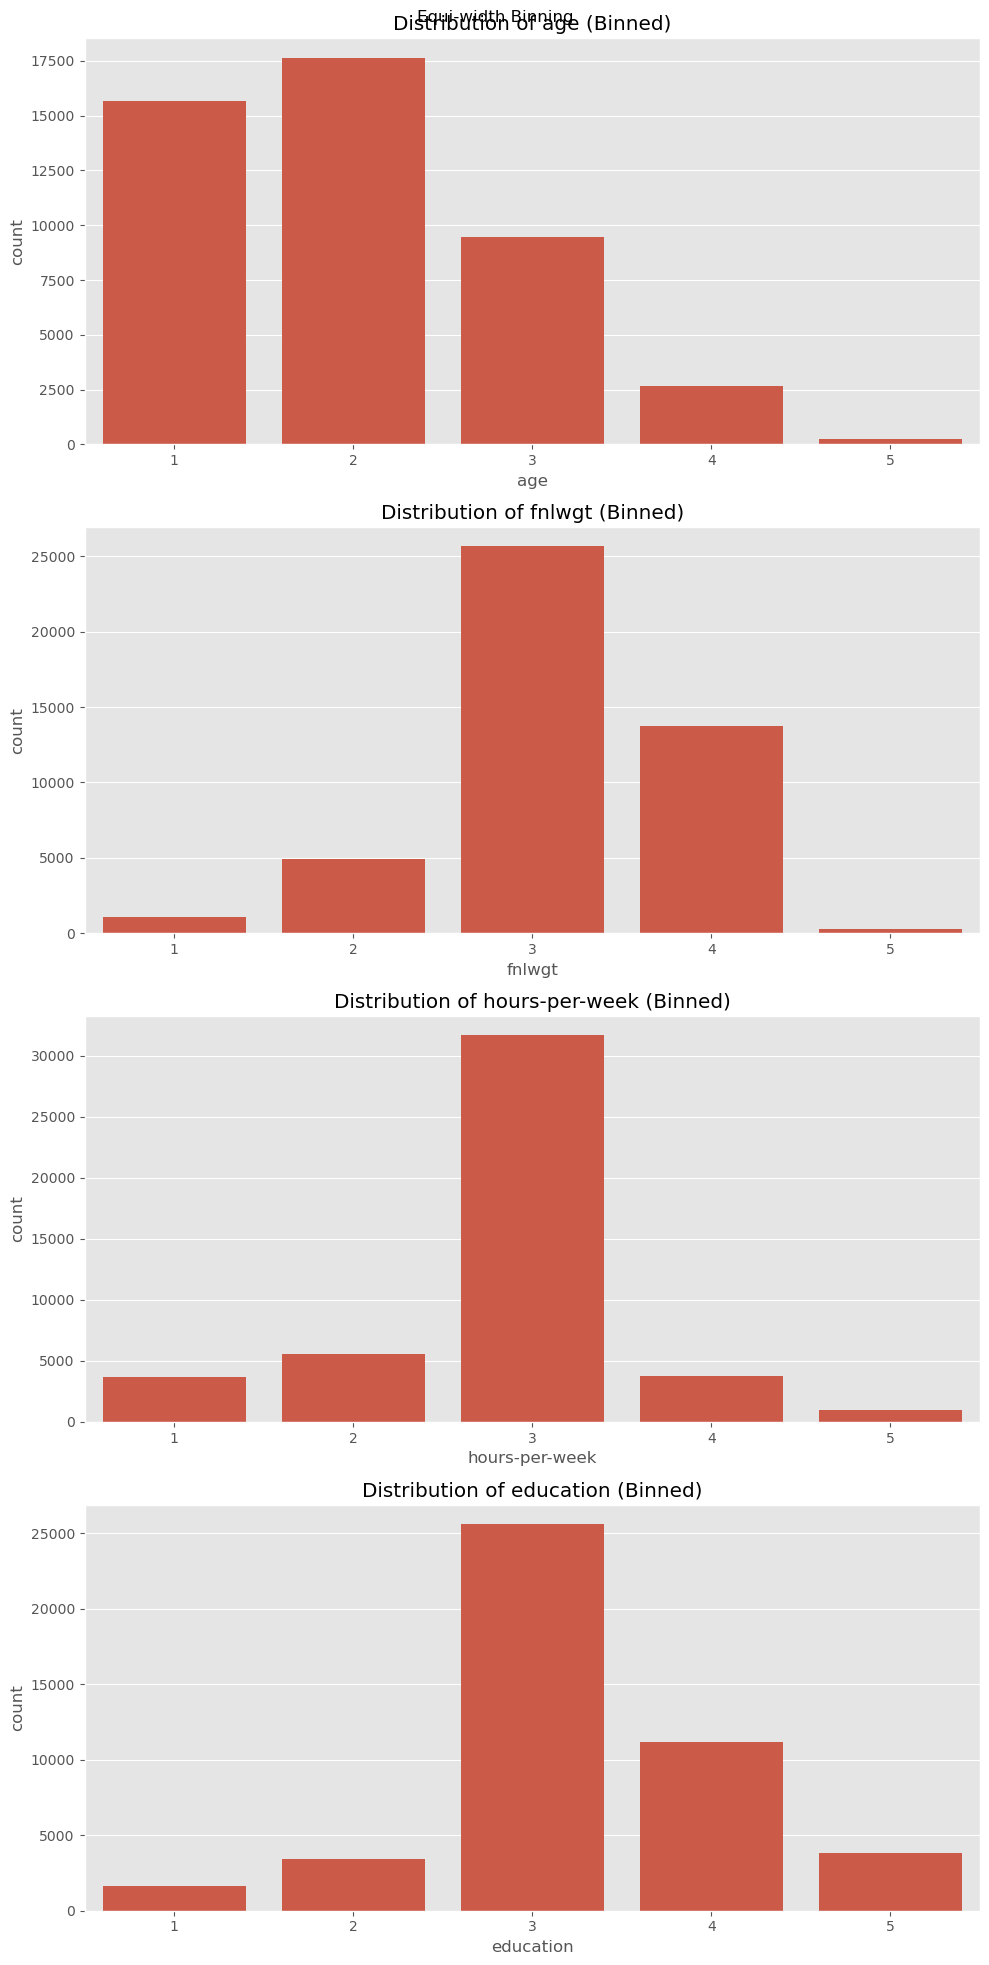

In [445]:
plot_binned_data(df_discretized, continuous_columns, "Equi-width Binning")

In [446]:
df_discretized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45684 entries, 0 to 45683
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           45684 non-null  category
 1   fnlwgt                        45684 non-null  category
 2   hours-per-week                45684 non-null  category
 3   income                        45684 non-null  int64   
 4   workclass-Never-worked        45684 non-null  float64 
 5   workclass-Private             45684 non-null  float64 
 6   workclass-Self-employed       45684 non-null  float64 
 7   workclass-Without-pay         45684 non-null  float64 
 8   marital-status-Separated      45684 non-null  float64 
 9   marital-status-Widowed        45684 non-null  float64 
 10  occupation-Armed-Forces       45684 non-null  float64 
 11  occupation-Craft-repair       45684 non-null  float64 
 12  occupation-Exec-managerial    45684 non-null  

**2. Equal-depth (frequency) partitioning**

This technique divides the data so that each bin contains approximately the same number of data points

Advantages:
* More suitable when the data has an uneven distribution.
* Each bin will have the same amount of data.

Disadvantages:
* May create bins with unequal widths, making it difficult to understand and explain.

In [449]:
def equifreq_columns(data, columns, m=0):
    # Sao chép dữ liệu gốc để giữ nguyên
    data_binned = data.copy()

    # Chỉ chọn các cột số
    numeric_columns = data.select_dtypes(include='number').columns

    # Kiểm tra giá trị của m
    if m <= 1:
        raise ValueError("Parameter 'm' should be greater than 1.")

    for col in columns:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' does not exist in the dataset.")
        if col not in numeric_columns:
            raise ValueError(f"Column '{col}' is not numeric.")
        try:
            # Tạo các bin với số lượng m
            data_binned[col], bins = pd.qcut(data[col], q=m, labels=range(1, m + 1), duplicates='drop', retbins=True)
            
            # Kiểm tra số bin thực tế sau khi loại bỏ trùng lặp
            num_bins = len(bins) - 1
            if num_bins < m:
                # Điều chỉnh số lượng nhãn nếu số bin thực tế nhỏ hơn m
                data_binned[col] = pd.qcut(data[col], q=num_bins, labels=range(1, num_bins + 1), duplicates='drop')
        
        except ValueError as e:
            print(f"Error in column '{col}': {e}")
            continue

    return data_binned

Since the value columns are uniform and discretized, I will not use this method.

* **Histogram analysis**

A histogram provides a visual representation of data distribution and can guide the choice of bin intervals.

In [453]:
def histogram_based_binning(data, columns, num_bins):
    data_binned = data.copy()
    
    # Get numeric columns
    numeric_columns = data.select_dtypes(include='number').columns
    
    for col in columns:
        # Check if column exists
        if col not in data.columns:
            raise ValueError(f"Column '{col}' does not exist in the dataset.")
        
        # Check if column is numeric
        if col not in numeric_columns:
            raise ValueError(f"Column '{col}' is not numeric.")
        
        # Perform histogram binning
        count, bins = np.histogram(data[col], bins=num_bins)
        labels = range(1, num_bins + 1)
        
        # Apply the binning and add it to the DataFrame
        data_binned[col] = pd.cut(data[col], bins=bins, labels=labels, include_lowest=True)
    
    return data_binned

In [454]:
histogram_based_data = histogram_based_binning(data, continuous_columns, 5)

In [455]:
histogram_based_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45684 entries, 0 to 45683
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           45684 non-null  category
 1   fnlwgt                        45684 non-null  category
 2   hours-per-week                45684 non-null  category
 3   income                        45684 non-null  int64   
 4   workclass-Never-worked        45684 non-null  float64 
 5   workclass-Private             45684 non-null  float64 
 6   workclass-Self-employed       45684 non-null  float64 
 7   workclass-Without-pay         45684 non-null  float64 
 8   marital-status-Separated      45684 non-null  float64 
 9   marital-status-Widowed        45684 non-null  float64 
 10  occupation-Armed-Forces       45684 non-null  float64 
 11  occupation-Craft-repair       45684 non-null  float64 
 12  occupation-Exec-managerial    45684 non-null  

In [456]:
histogram_based_data

age fnlwgt hours-per-week  income  workclass-Never-worked  \
0       2      2              3       0                     0.0   
1       2      3              3       0                     0.0   
2       3      4              3       0                     0.0   
3       1      4              3       0                     0.0   
4       2      4              3       0                     0.0   
...    ..    ...            ...     ...                     ...   
45679   2      3              2       0                     0.0   
45680   4      4              3       0                     0.0   
45681   2      4              3       0                     0.0   
45682   2      3              3       0                     0.0   
45683   2      3              4       1                     0.0   

       workclass-Private  workclass-Self-employed  workclass-Without-pay  \
0                    0.0                      0.0                    0.0   
1                    1.0                      0.0                    0.0   
2                    1.0                      0.0                    0.0   
3                    1.0                      0.0                    0.0   
4                    1.0                      0.0                    0.0   
...                  ...                      ...                    ...   
45679                1.0                      0.0                    0.0   
45680                1.0                      0.0                    0.0   
45681                1.0                      0.0                    0.0   
45682                1.0                      0.0                    0.0   
45683                0.0                      1.0                    0.0   

       marital-status-Separated  marital-status-Widowed  ...  \
0                           0.0                     0.0  ...   
1                           0.0                     1.0  ...   
2                           0.0                     0.0  ...   
3                           0.0                     0.0  ...   
4                           0.0                     0.0  ...   
...                         ...                     ...  ...   
45679                       0.0                     1.0  ...   
45680                       0.0                     1.0  ...   
45681                       0.0                     0.0  ...   
45682                       0.0                     1.0  ...   
45683                       0.0                     0.0  ...   

       relationship-Own-child  relationship-Unmarried  relationship-Wife  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                1.0   
4                         0.0                     0.0                1.0   
...                       ...                     ...                ...   
45679                     0.0                     0.0                0.0   
45680                     0.0                     0.0                0.0   
45681                     0.0                     0.0                0.0   
45682                     1.0                     0.0                0.0   
45683                     0.0                     0.0                0.0   

       race-Others  race-White  native-country-Mexico  native-country-Others  \
0              0.0         1.0                    0.0                    0.0   
1              0.0         1.0                    0.0                    0.0   
2              0.0         0.0                    0.0                    0.0   
3              0.0         0.0                    0.0                    1.0   
4              0.0         1.0                    0.0                    0.0   
...            ...         ...                    ...                    ...   
45679          0.0         1.0                

This method can be used, but it should be considered as a reference.

* Are there any other methods?

Yes, there are a lot of methods that are used to discretize the continuous data
* K-Means Clustering for Discretization
* Decision Tree-Based Discretization
* Entropy-Based Discretization (Information Gain)
* Quantile-Based Binning
* Fixed-Width Binning with Domain Knowledge

---

# <font color = red>**IV. References** <a class = "anchor" id = "c4"></a></font>

[1] [Adult Income Prediction EDA (Logistic - KNN - SVM)](https://www.kaggle.com/code/fnurazman/adult-income-prediction-eda-logistic-knn-svm/notebook)

[2] [10.7 - Detecting Multicollinearity Using Variance Inflation Factors](https://online.stat.psu.edu/stat462/node/180/)

[3] [Adult-Census-Income-GitHub](https://github.com/JcFreya/Adult-Census-Income)

---

<center><b>---THE END---</b></center>